**Data mining - Project 1 . Aris Tsilifonis(sdi1700170) - Nizar Darwish (sdi1800286) 23/4/2021**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
import matplotlib 
import csv
# Χρησιμοπoείται για inline plotting
%matplotlib inline 

**1.1 Obtain csv file and count tv shows and movies from file's rows**

In [3]:
fieldNames = ['id','type']

inputfile = csv.reader(open('netflix_titles.csv', encoding="utf8"))

tv_c=0
mov_c=0
for row in inputfile:
    if(row[1] == "TV Show"):
        tv_c+=1
    elif(row[1] == "Movie"):
        mov_c+=1
    #print(row[1])
print("Counter for tv shows :" , tv_c )
print("Counter for movies :" , mov_c )
if(tv_c > mov_c):
    print("TV shows are more popular")
elif(mov_c > tv_c):
    print("Movies are more popular")


Counter for tv shows : 2410
Counter for movies : 5377
Movies are more popular


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**1.2 Finding where netflix invests more**

In [ ]:
inputfile = csv.reader(open('netflix_titles.csv', encoding="utf8"))
tv_c2=0
mov_c2=0
for row in inputfile:
    try:
        if(int(row[7])>2010):#row[7] means date added
            if(row[1] == "TV Show"):
                tv_c2+=1
            elif(row[1] == "Movie"):
                mov_c2+=1
            #print(row[7])
    except ValueError:
        pass      # or whatever

print("Counter for tv shows :" , tv_c2 )
print("Counter for movies :" , mov_c2 )
if(tv_c2 > mov_c2):
    print("Netflix is investing more in TV shows the past 10 years")
elif(mov_c2 > tv_c2):
    print("Netflix is investing more in Movies the past 10 years")


Counter for tv shows : 2199
Counter for movies : 4238
Netflix is investing more in Movies the past 10 years


**1.3,1.4 Finding which country has more content and also what type of content each country produces**

In [ ]:
#This is for question 3 and 4

Countries = {}
inputfile = csv.reader(open('netflix_titles.csv', encoding="utf8"))
for row in inputfile:
    #1.3
    countries = row[5].split(", ")#splitting sentences
    genres = row[10].split(", ")
    #we have dictionary for every country 
    for country in countries:
        if not country:
            continue#dont add empty value for country
        if country not in Countries.keys():
            Countries[country] = [1,[]] #initialize counter for every country
        else:
            Countries[country][0] += 1 #increase counter of movies/tv shows
        #1.4
        for genre in genres:#if its not in the value list for genres, just add it
            if genre not in Countries[country][1]:
                Countries[country][1].append(genre)

max_key = max(Countries, key=Countries.get)
print("The country with the most content is the", max_key, "with", Countries[max_key][0])
#for key in Countries.keys():
 #   print(key, ":", Countries[key][0])

The country with the most content is the United States with 3296


In [ ]:
for key in Countries.keys():
    print(key, ":", Countries[key][1], "\n")

country : ['listed_in'] 

Brazil : ['International TV Shows', 'TV Dramas', 'TV Sci-Fi & Fantasy', 'Documentaries', 'International Movies', 'Reality TV', 'Dramas', 'Thrillers', 'Stand-Up Comedy', 'Docuseries', 'Comedies', 'LGBTQ Movies', 'Independent Movies', 'Crime TV Shows', 'TV Comedies', 'Children & Family Movies', "Kids' TV", 'Romantic TV Shows', 'Music & Musicals', 'Sports Movies', 'TV Mysteries', 'Faith & Spirituality', 'Romantic Movies', 'Stand-Up Comedy & Talk Shows', 'Science & Nature TV', 'Action & Adventure', 'TV Horror'] 

Mexico : ['Dramas', 'International Movies', 'Crime TV Shows', 'Docuseries', 'International TV Shows', 'Documentaries', 'Comedies', 'Stand-Up Comedy', 'Romantic Movies', 'Independent Movies', 'Sports Movies', 'Romantic TV Shows', 'Spanish-Language TV Shows', 'Movies', 'TV Comedies', 'Music & Musicals', 'TV Dramas', 'Children & Family Movies', 'Horror Movies', 'TV Action & Adventure', 'Classic & Cult TV', "Kids' TV", 'Action & Adventure', 'Sci-Fi & Fantasy'

**1.5 Find the 10 actors with the most movies for every country**

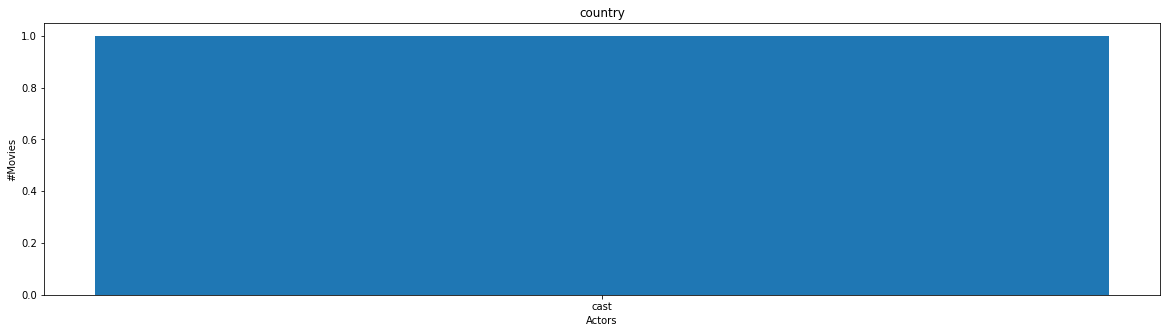

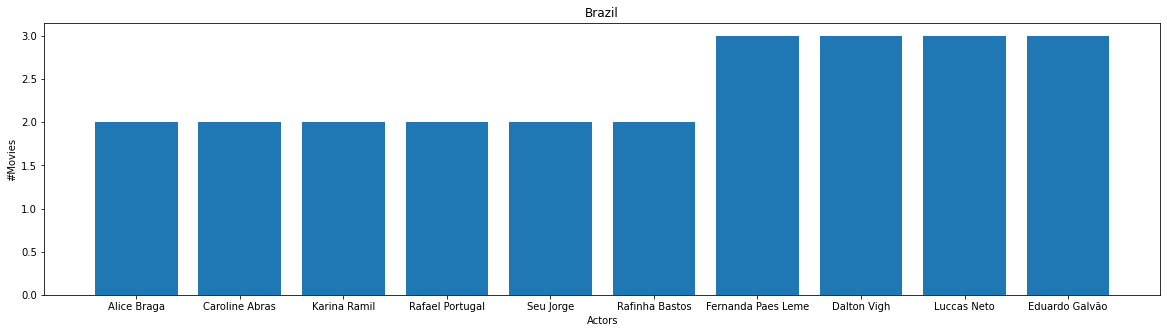

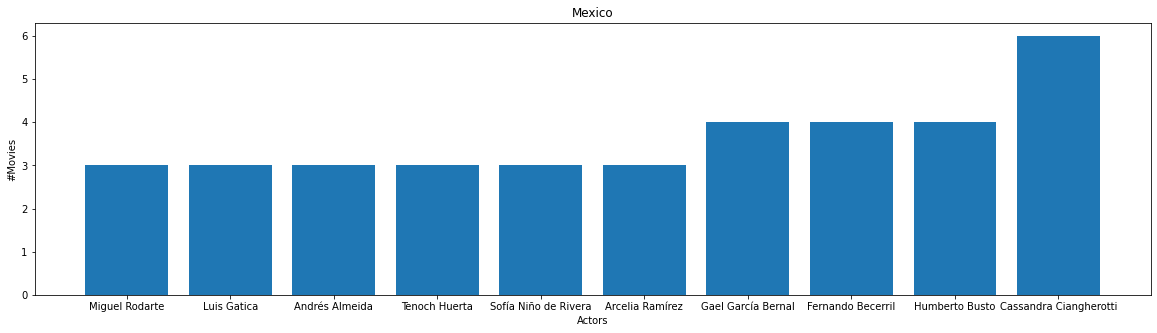

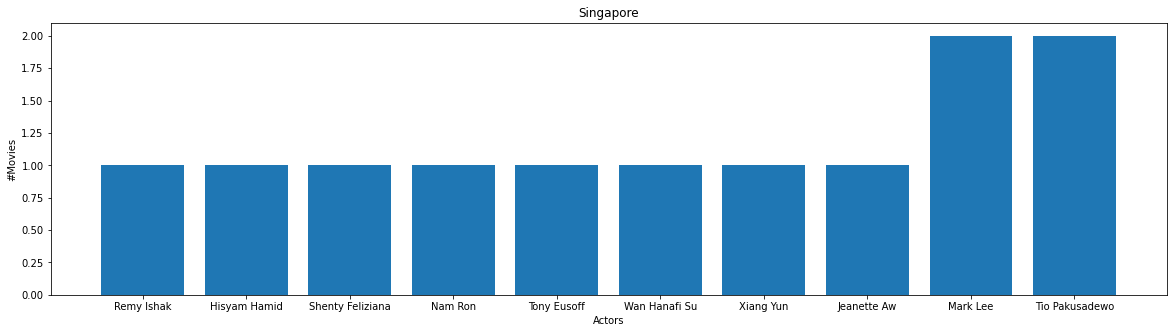

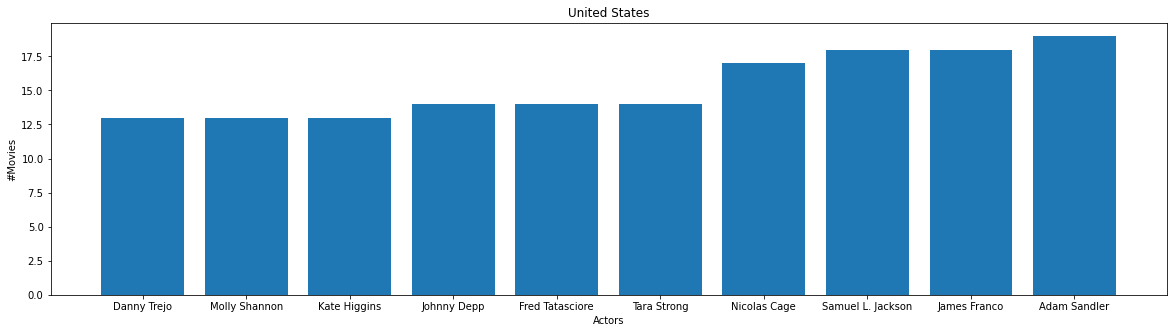

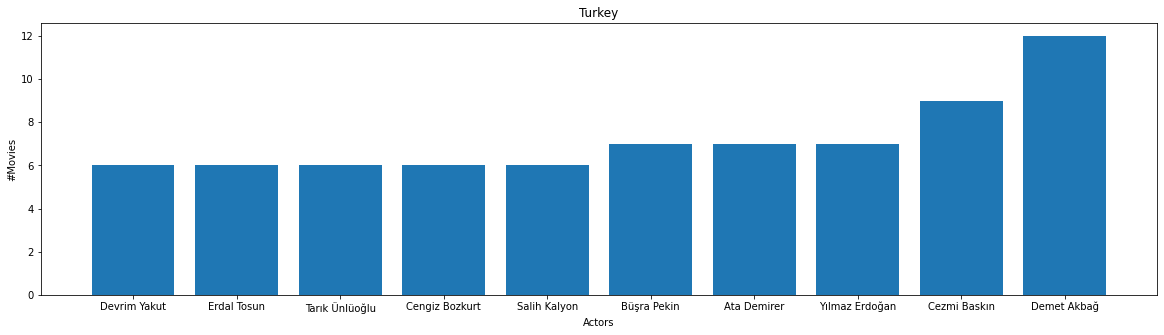

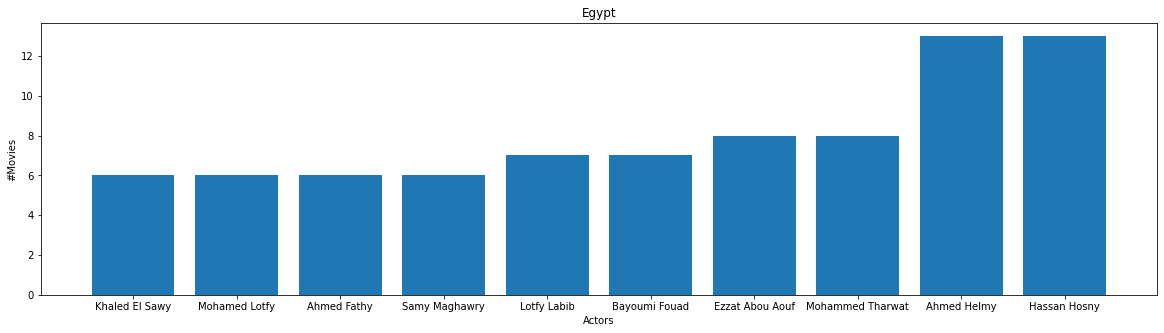

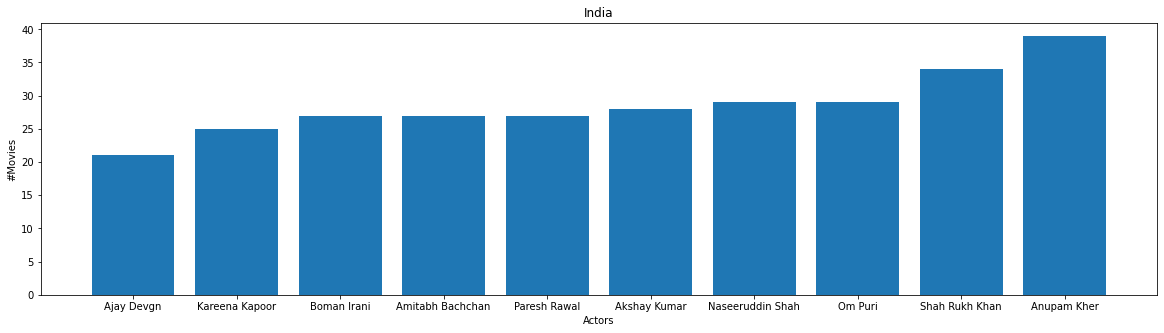

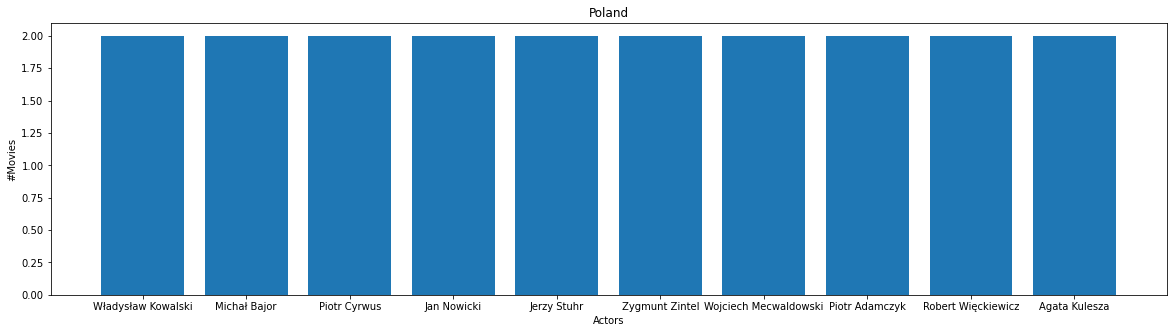

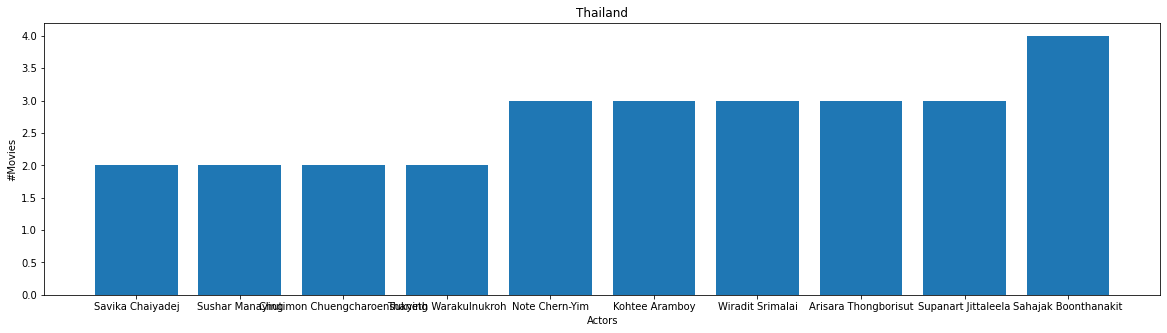

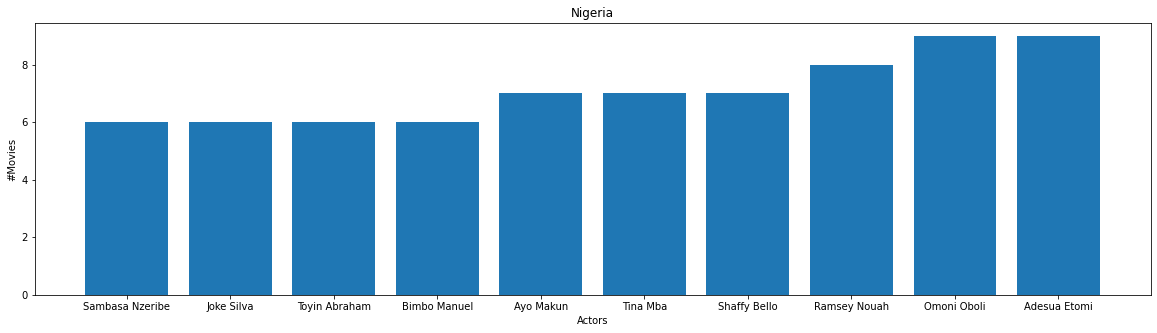

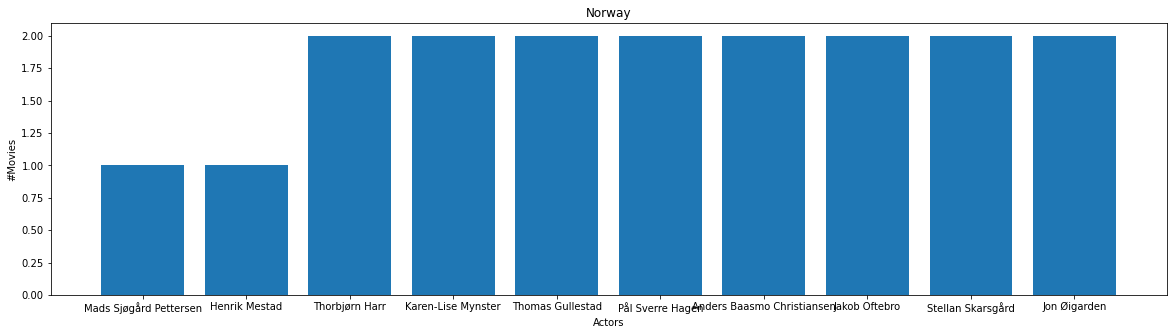

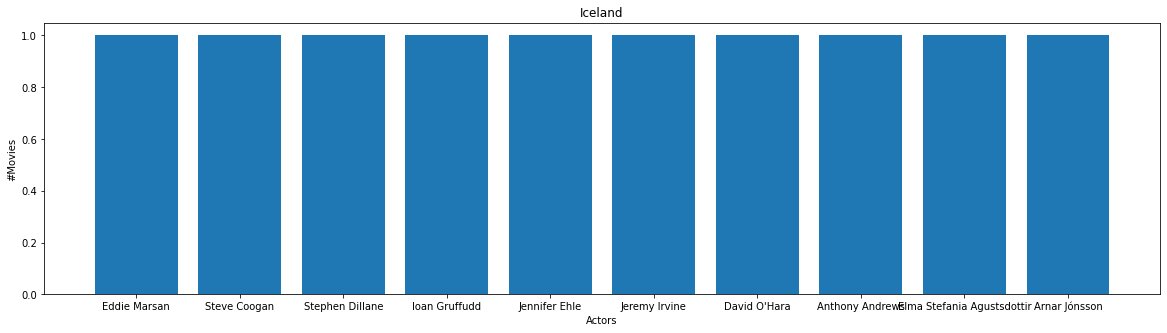

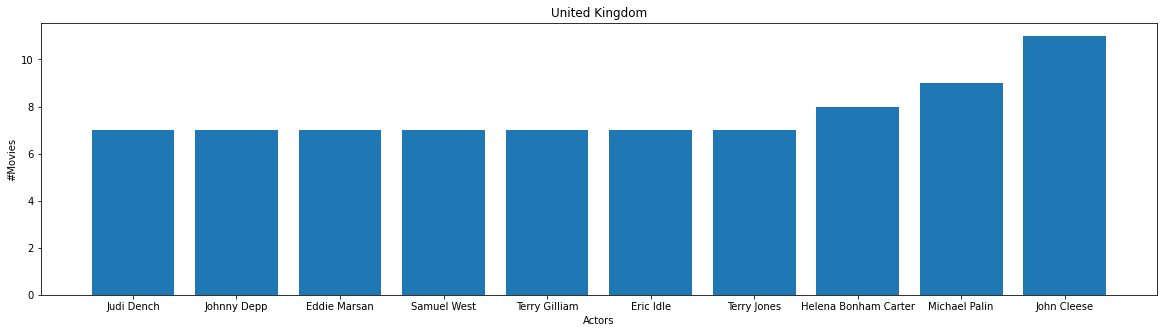

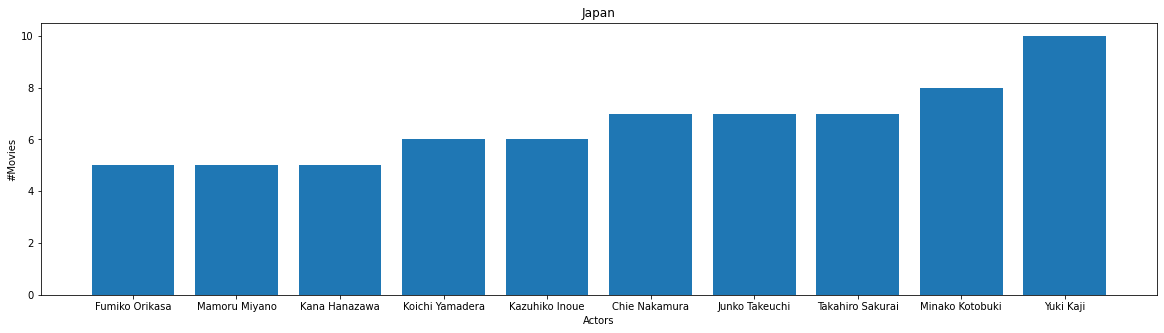

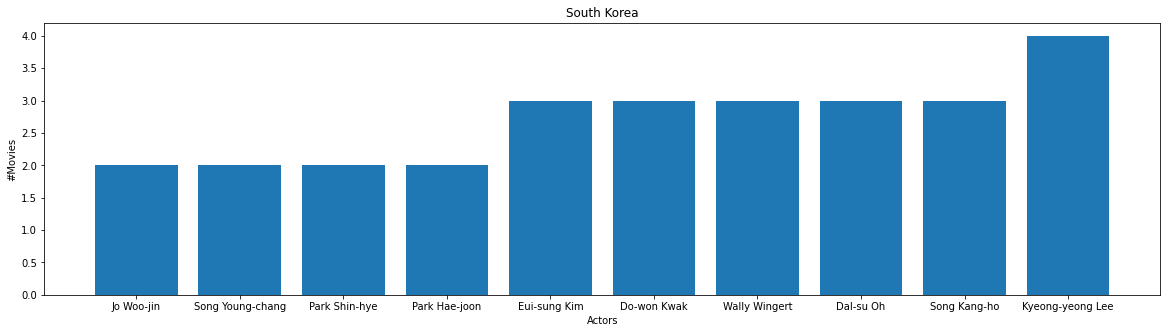

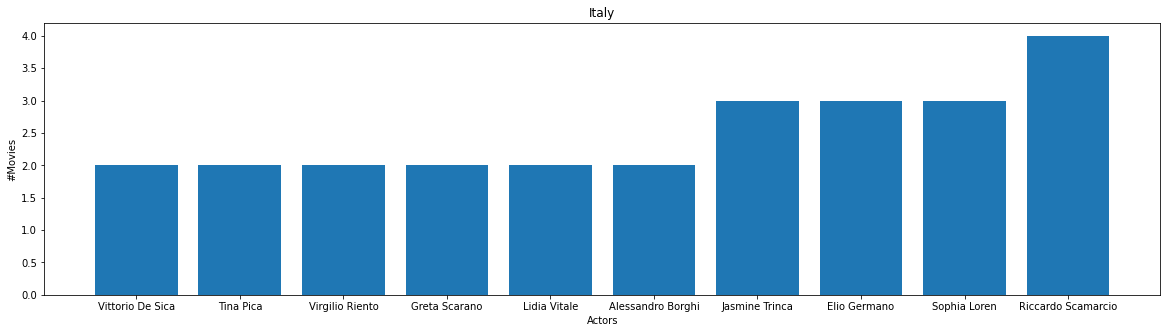

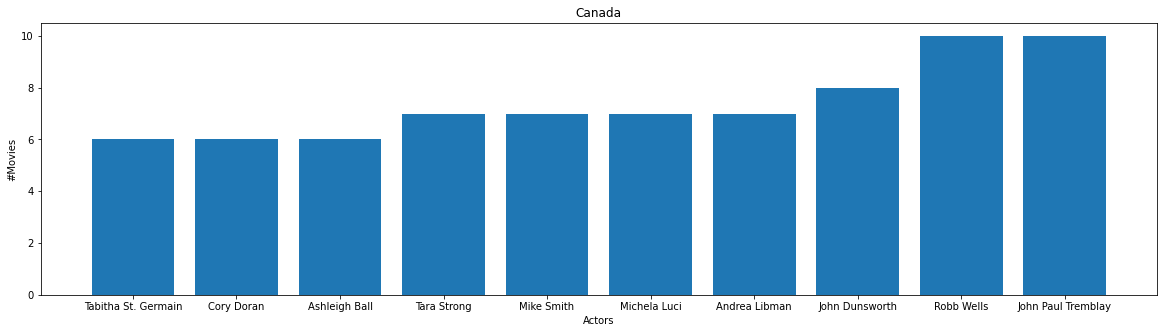

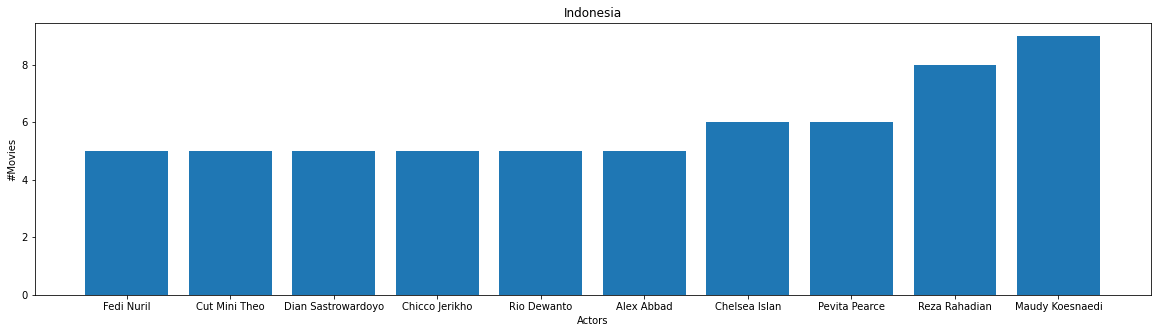

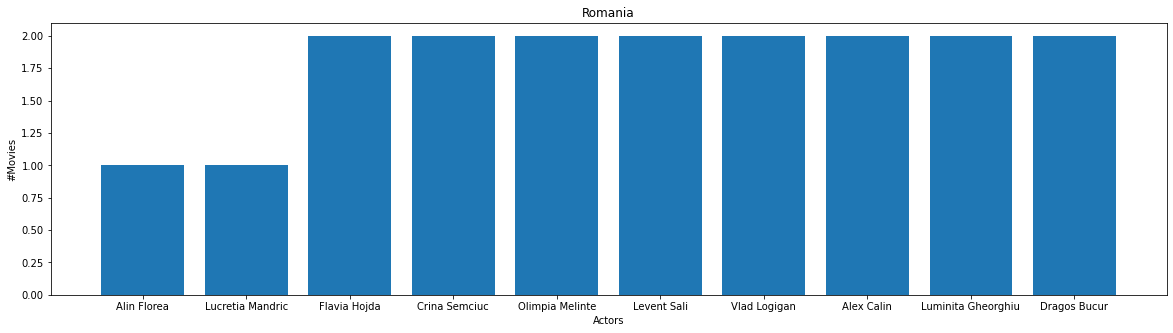

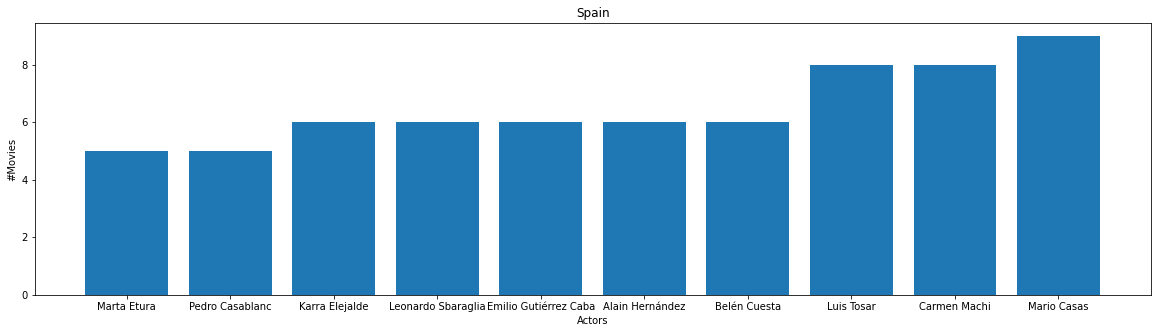

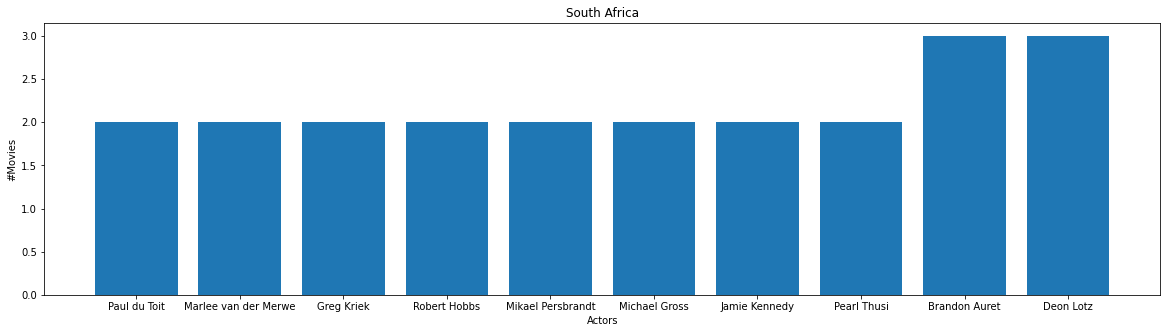

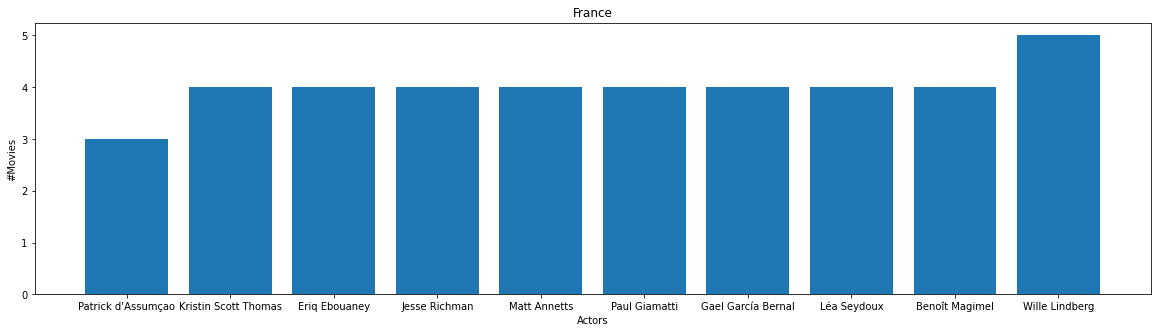

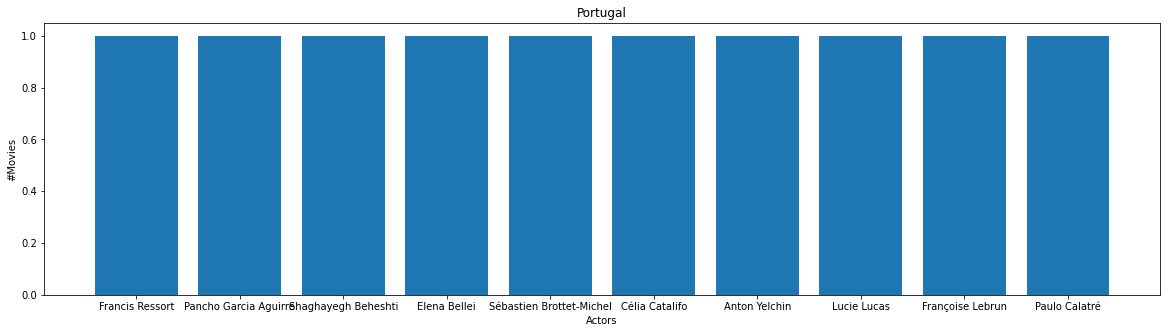

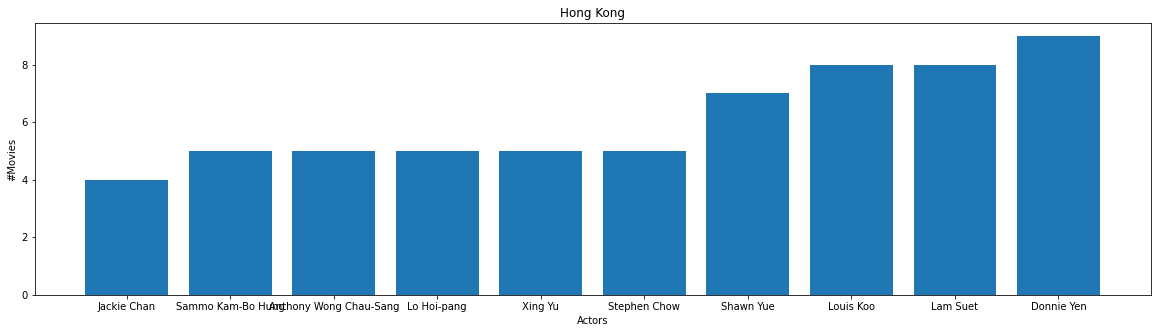

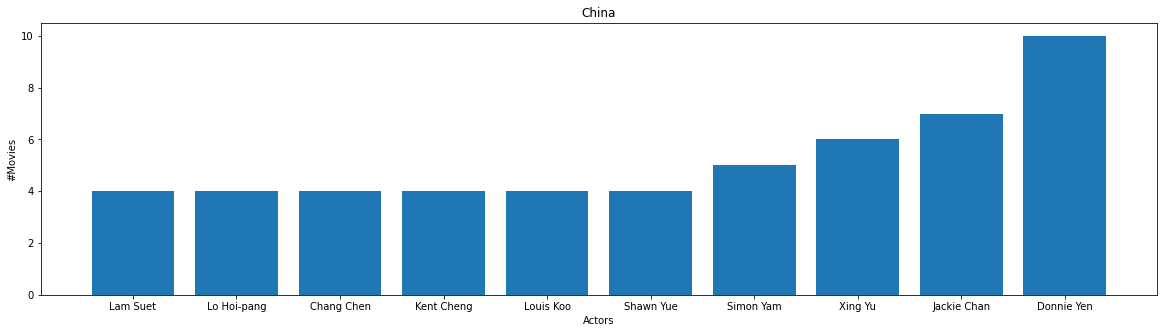

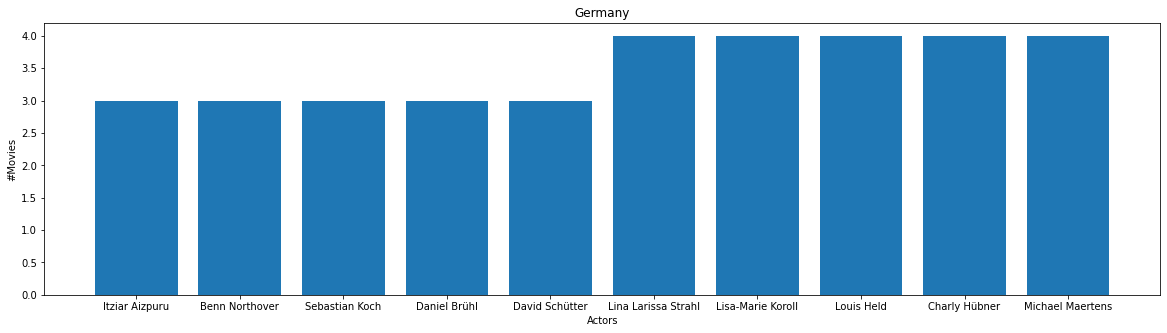

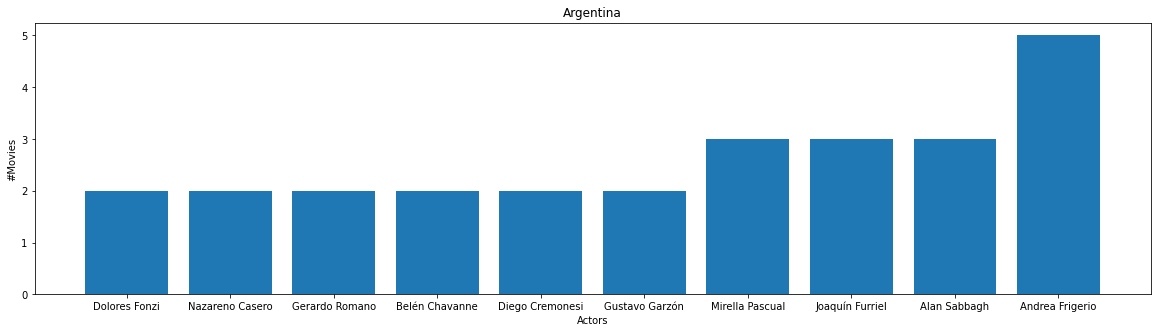

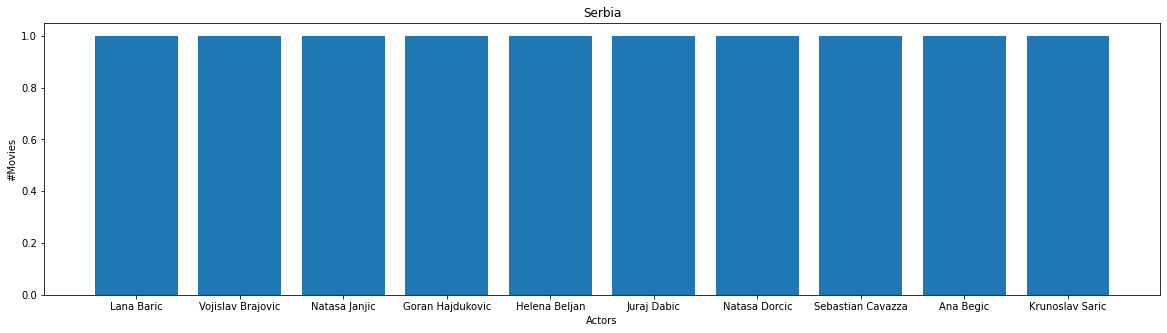

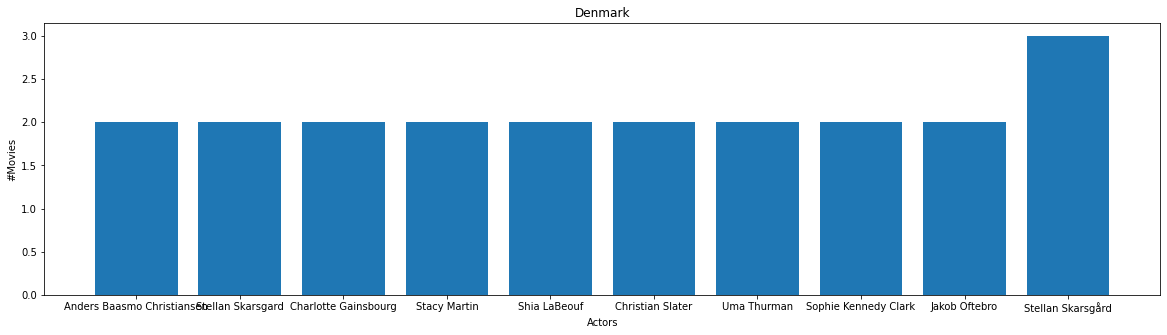

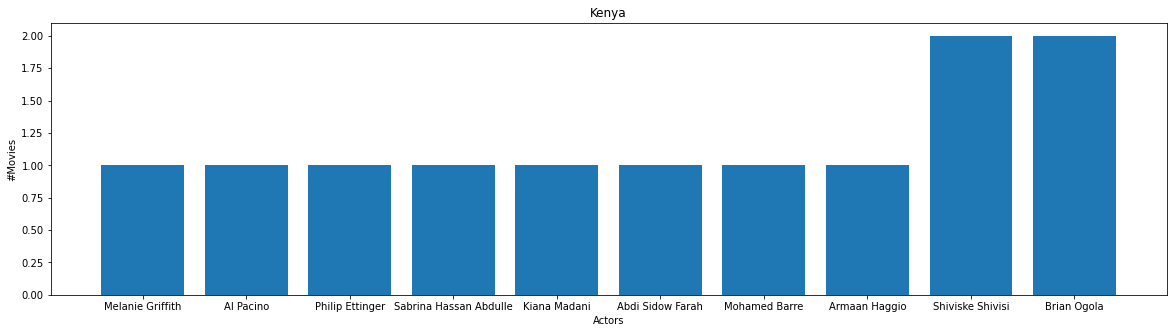

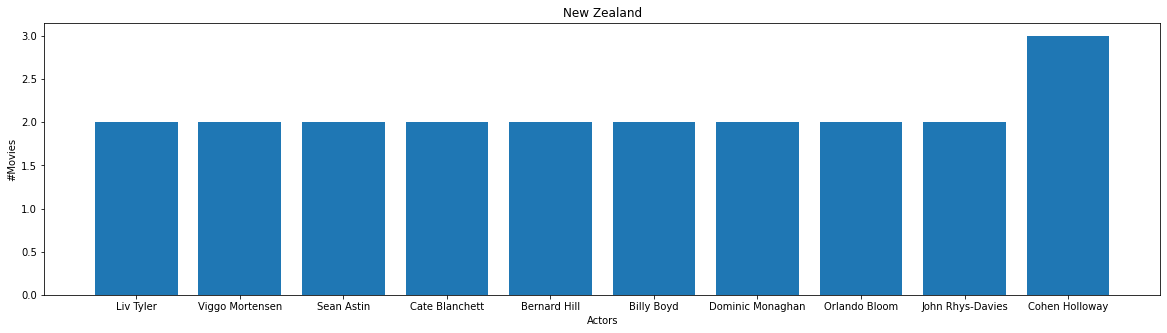

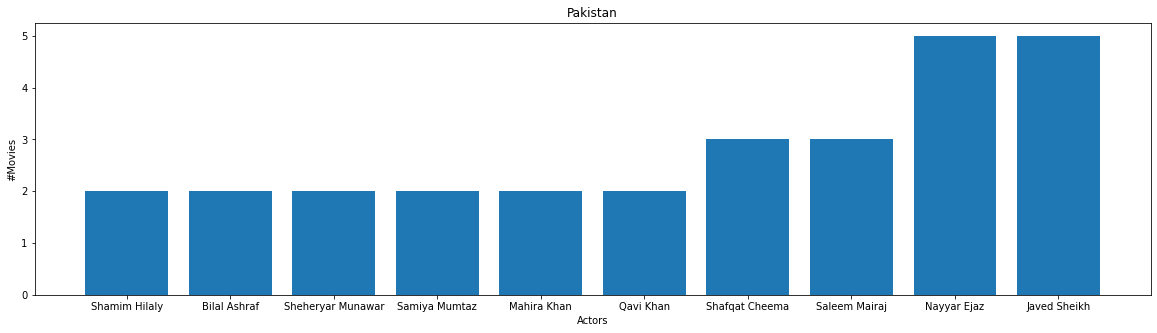

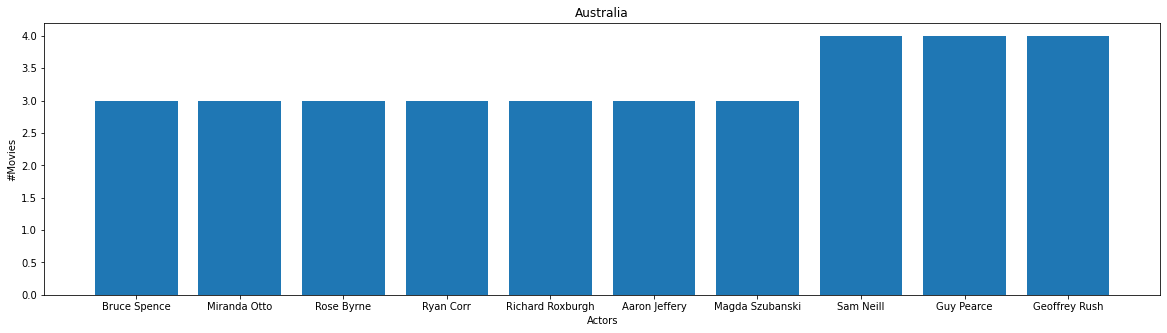

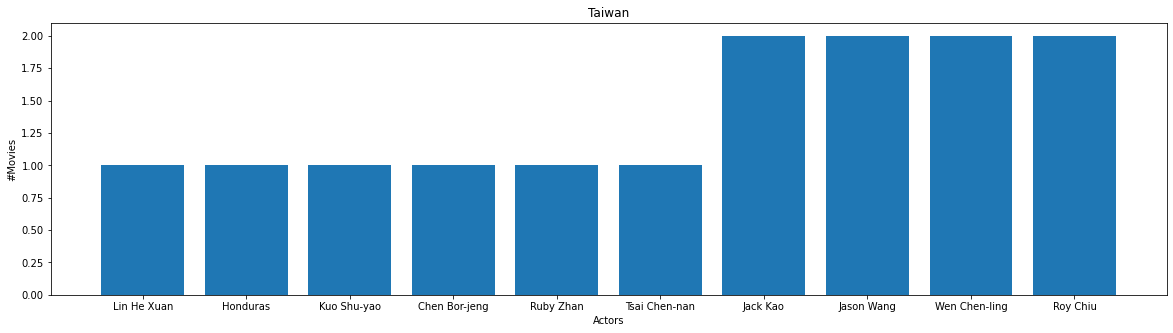

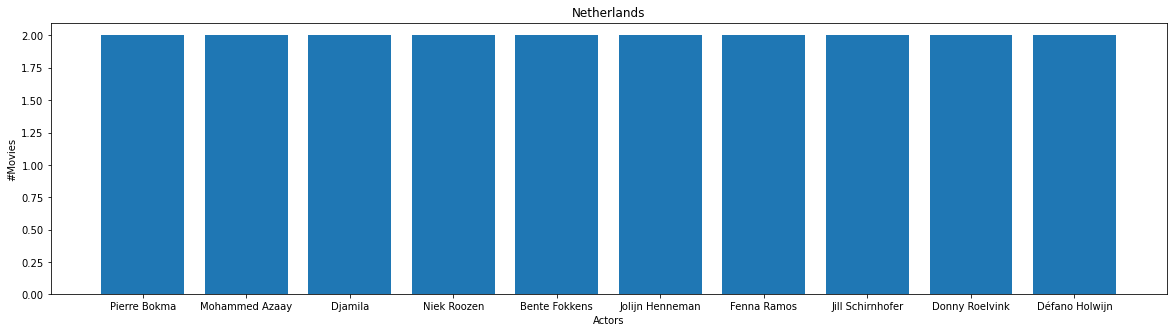

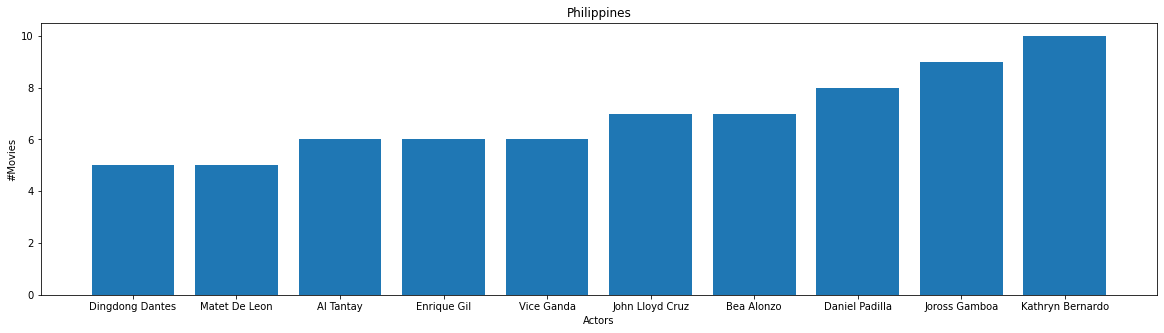

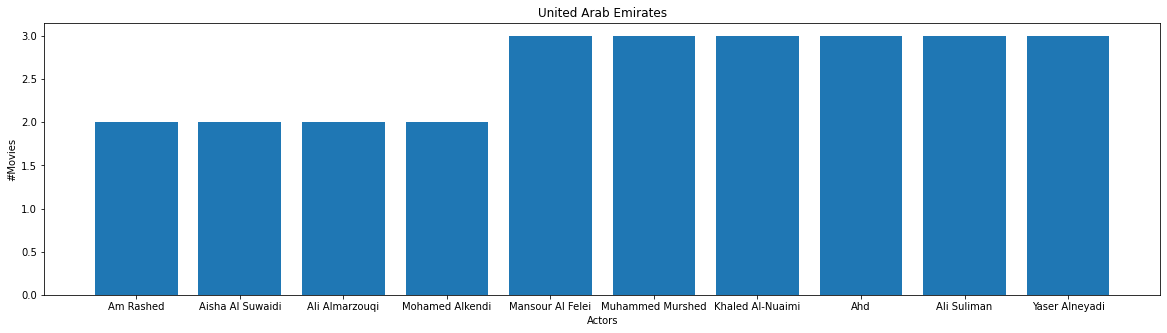

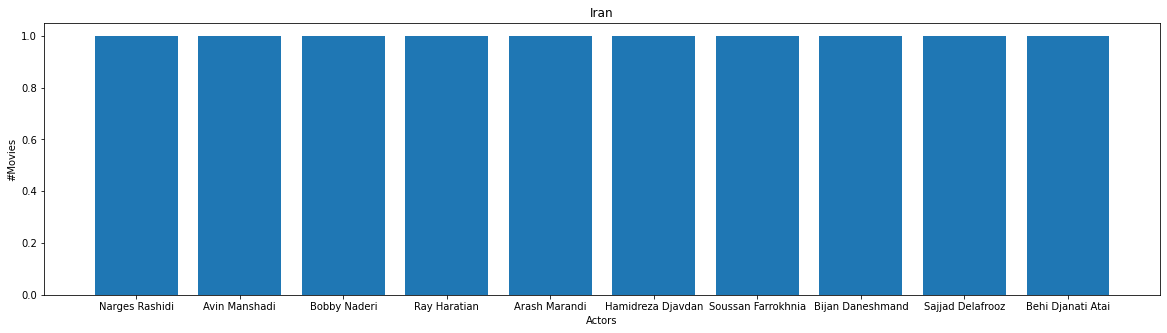

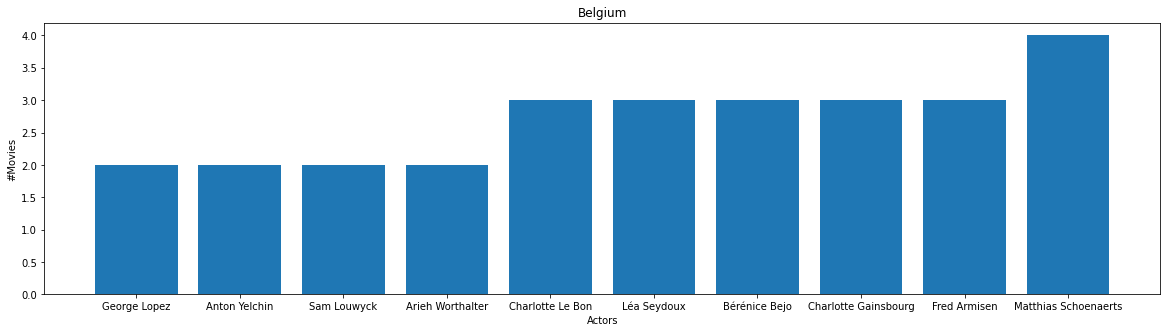

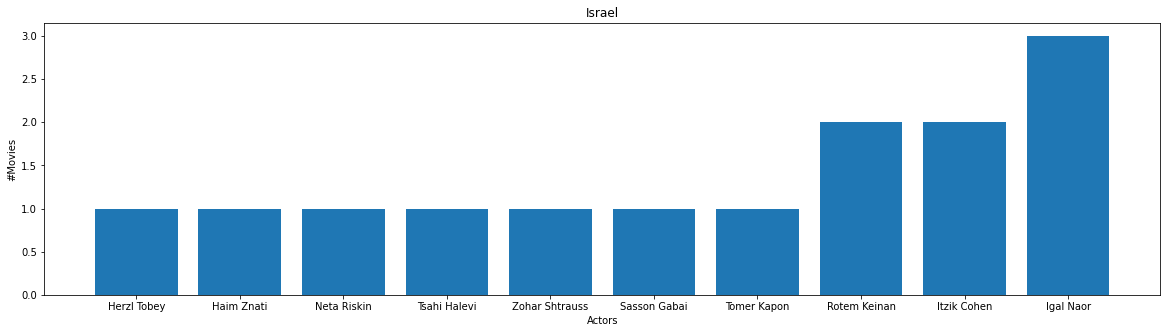

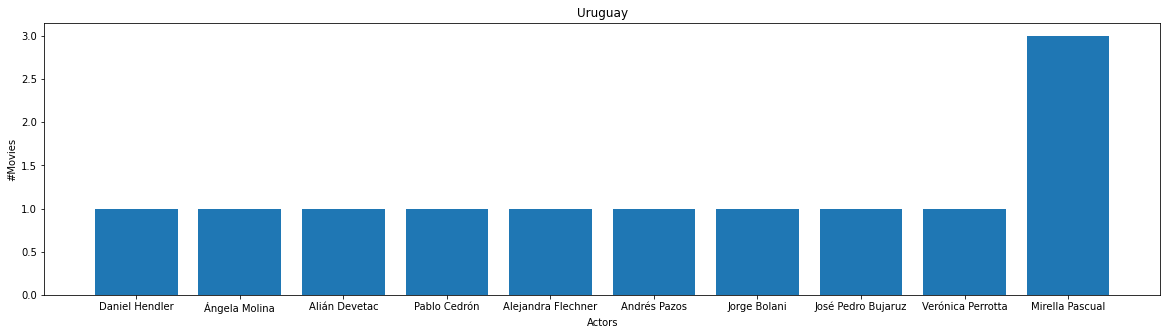

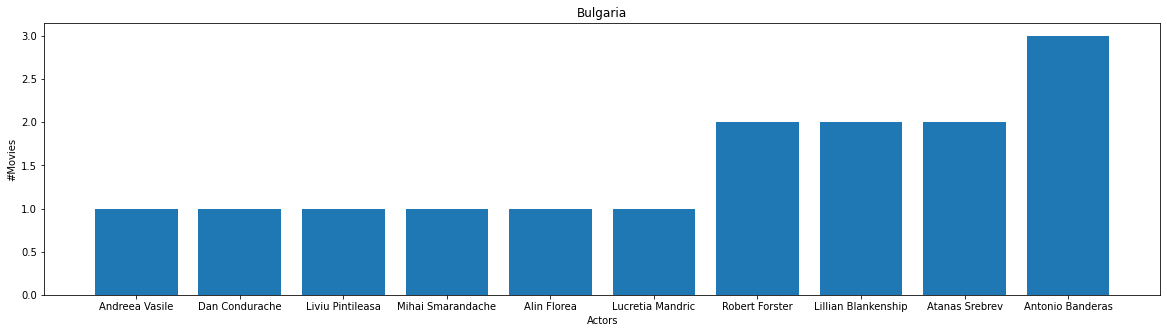

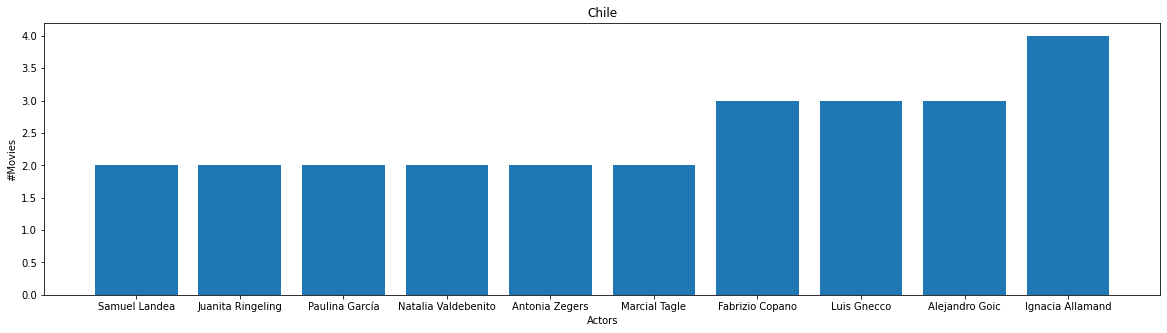

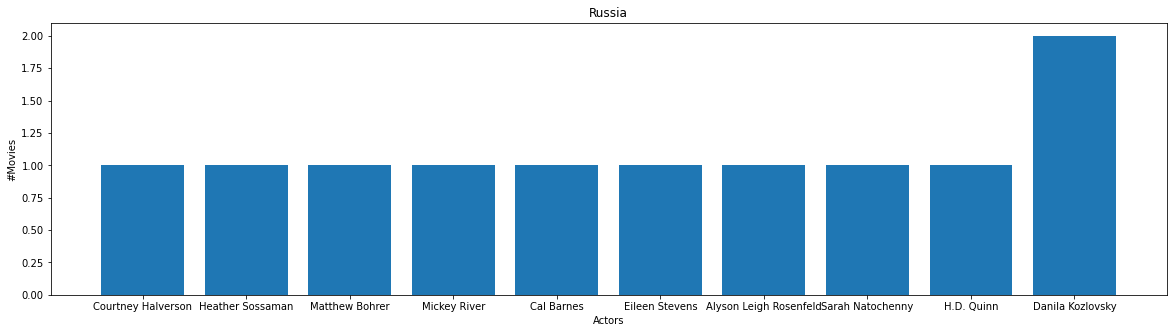

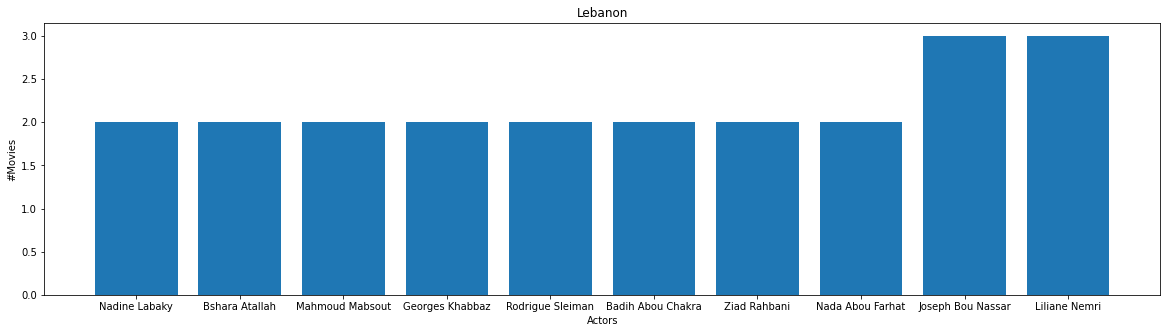

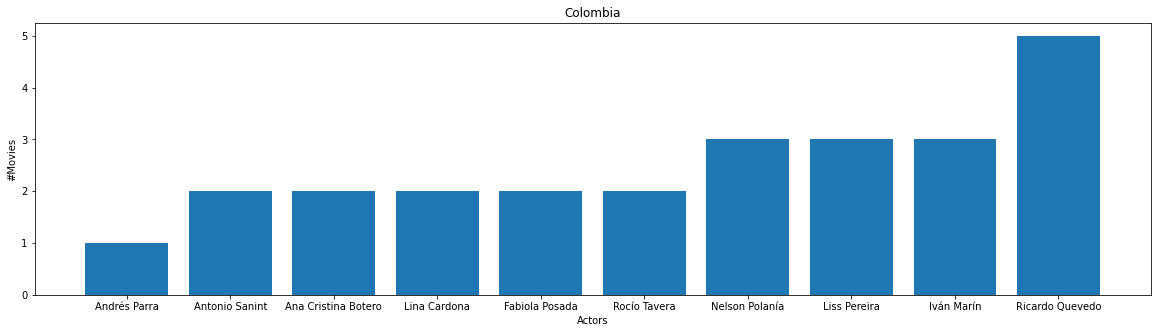

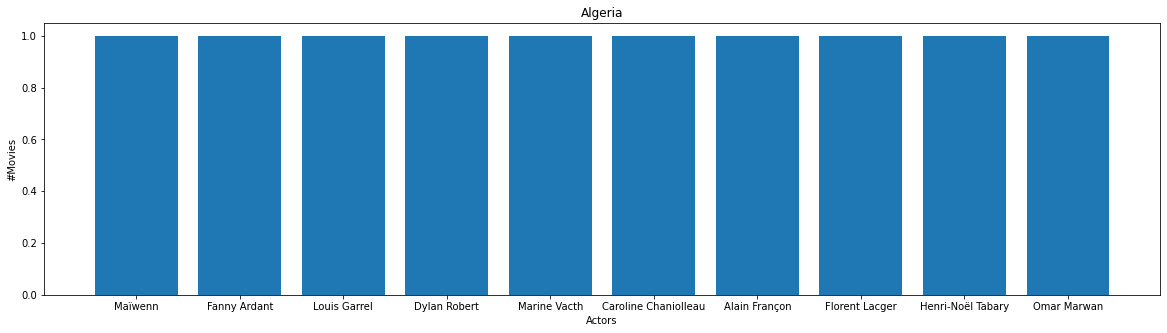

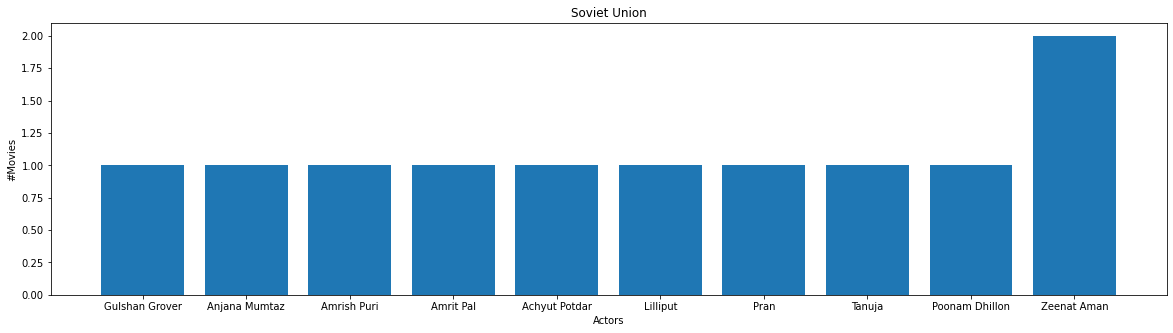

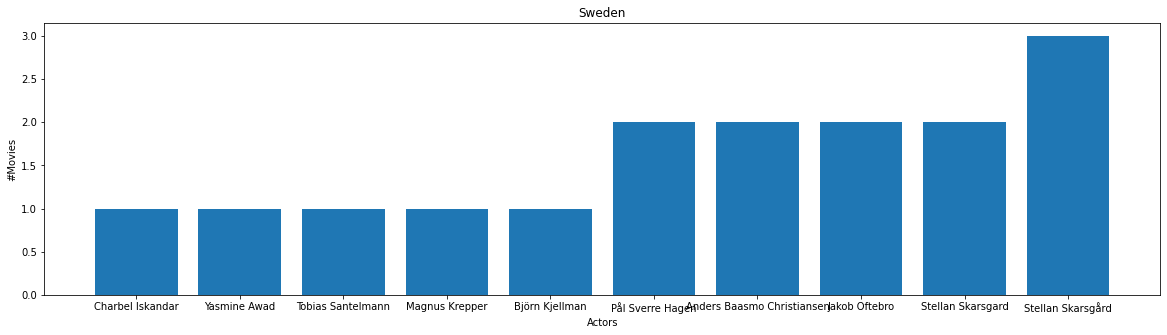

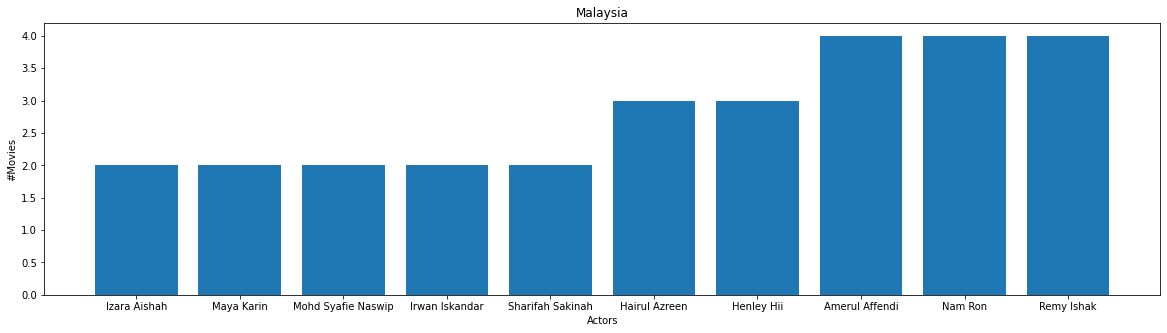

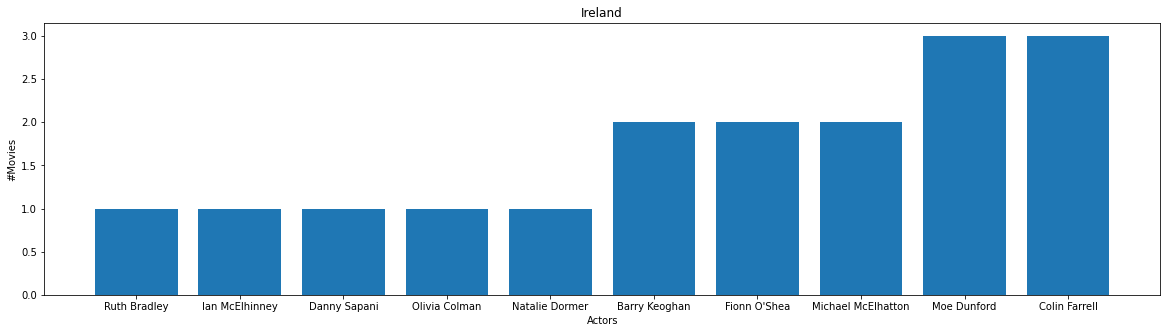

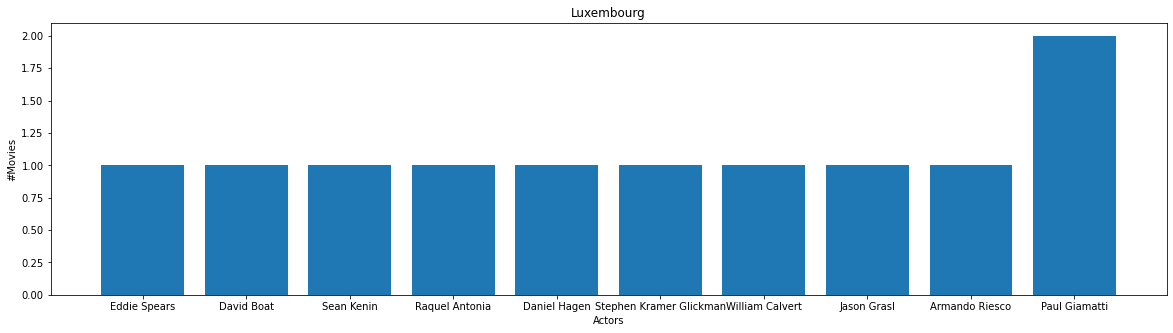

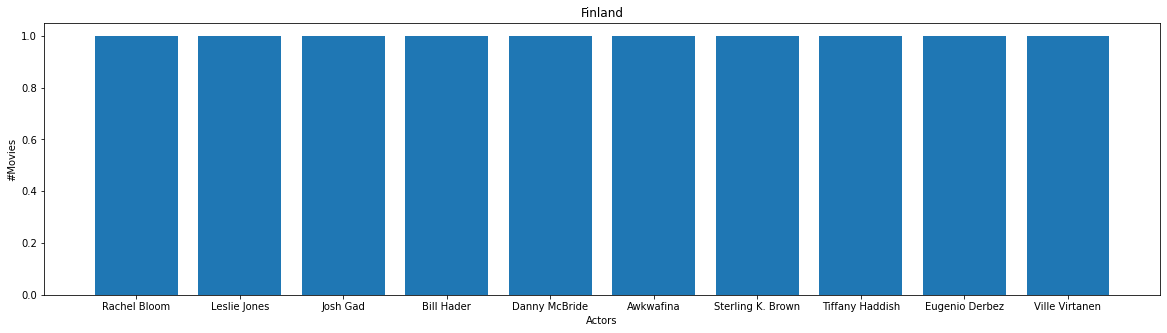

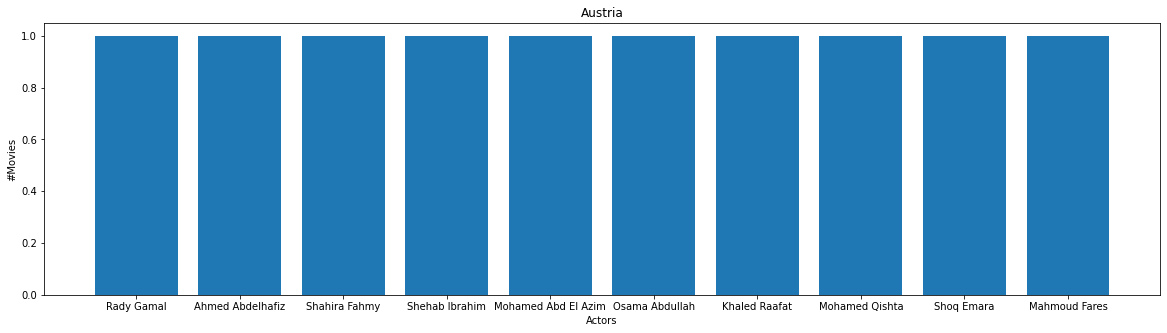

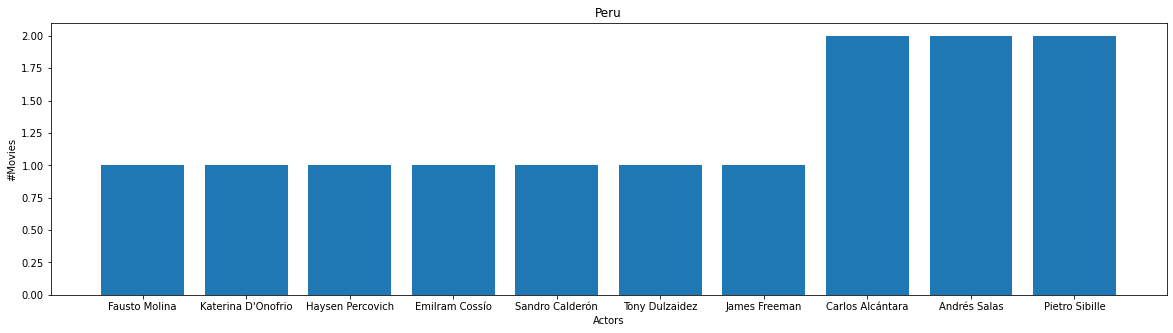

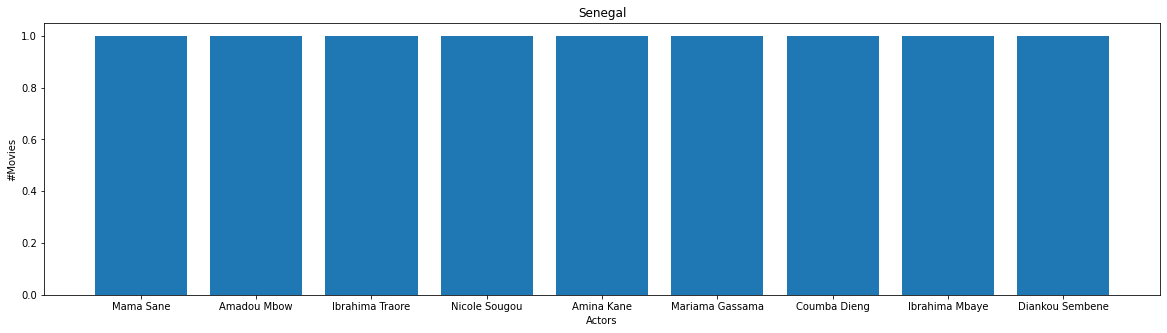

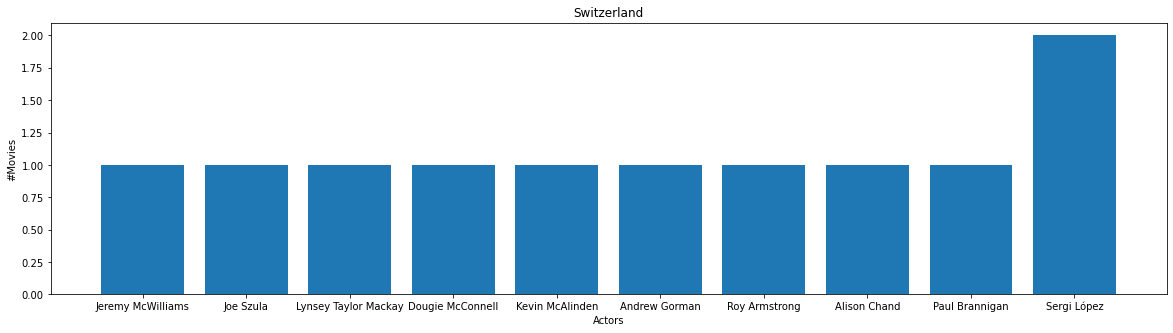

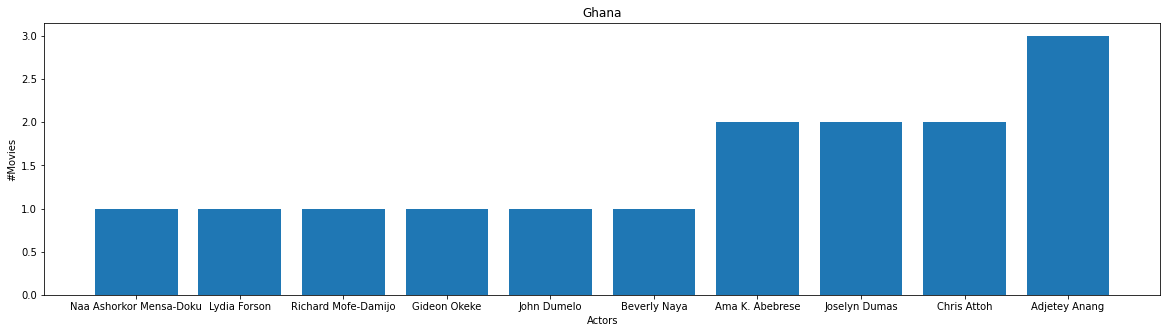

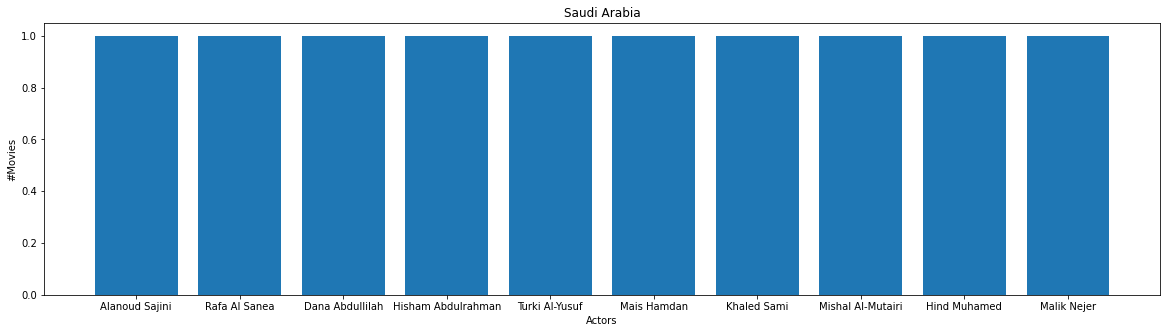

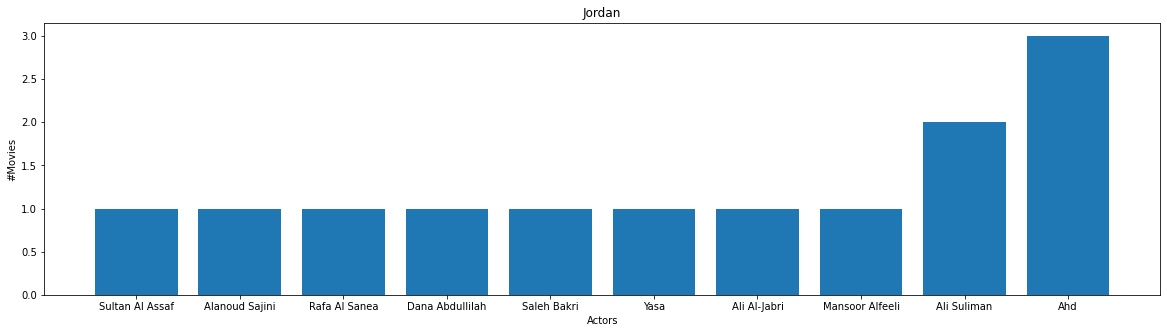

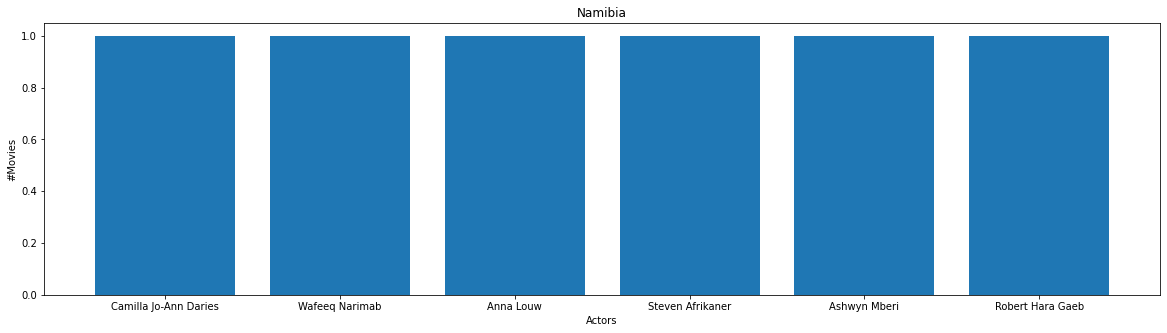

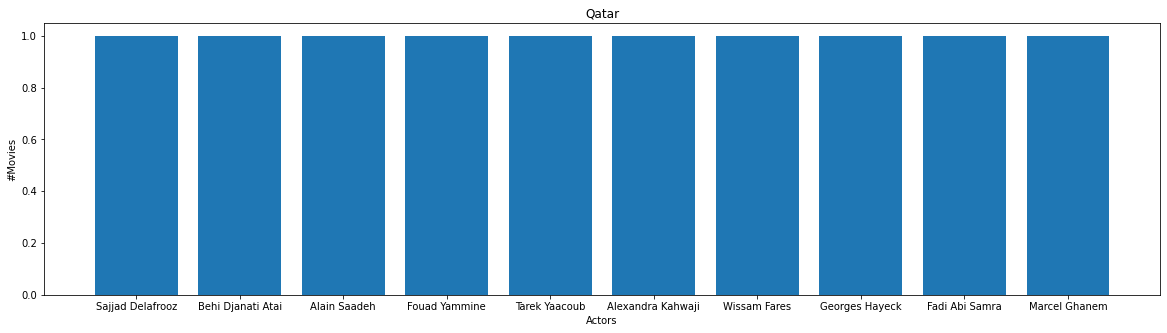

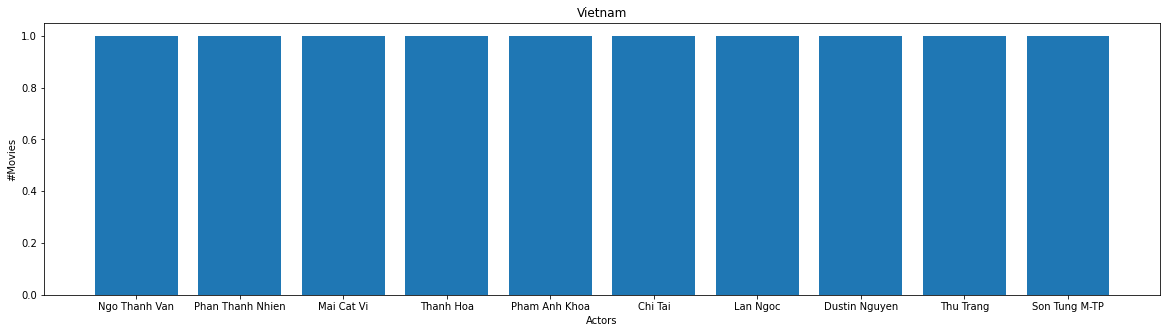

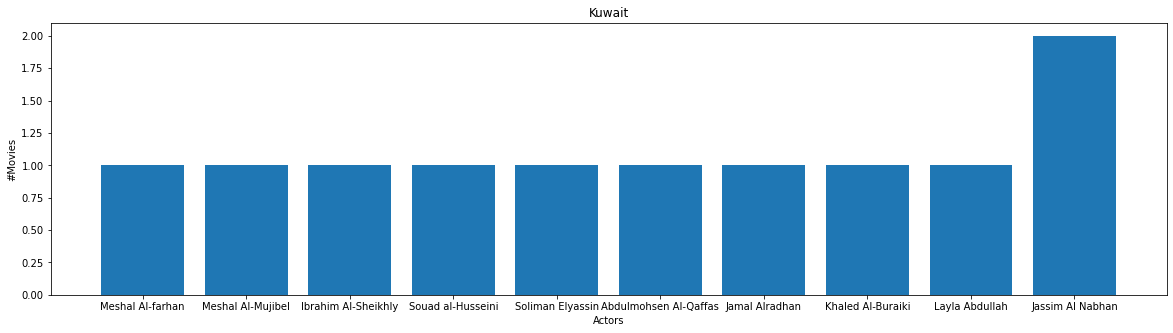

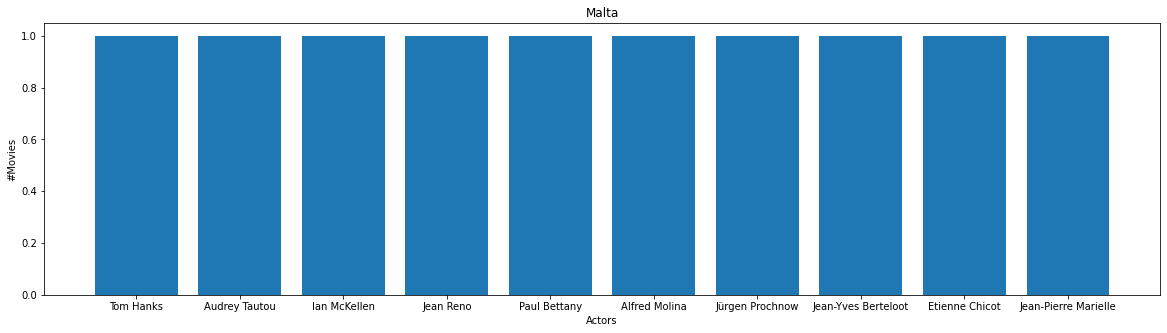

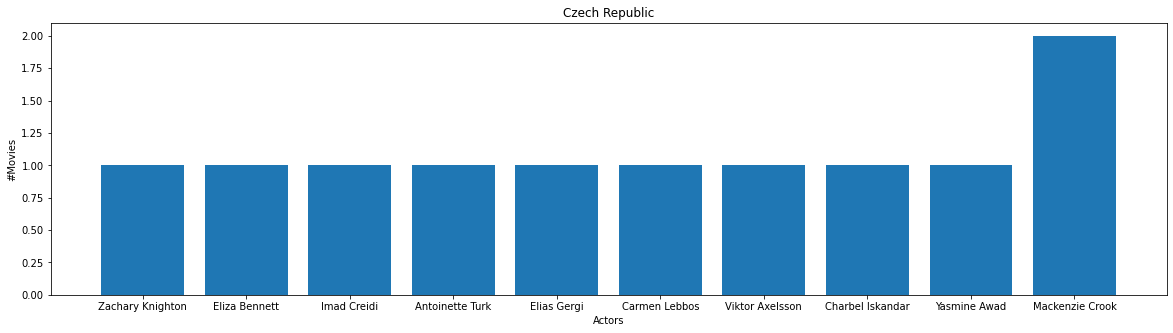

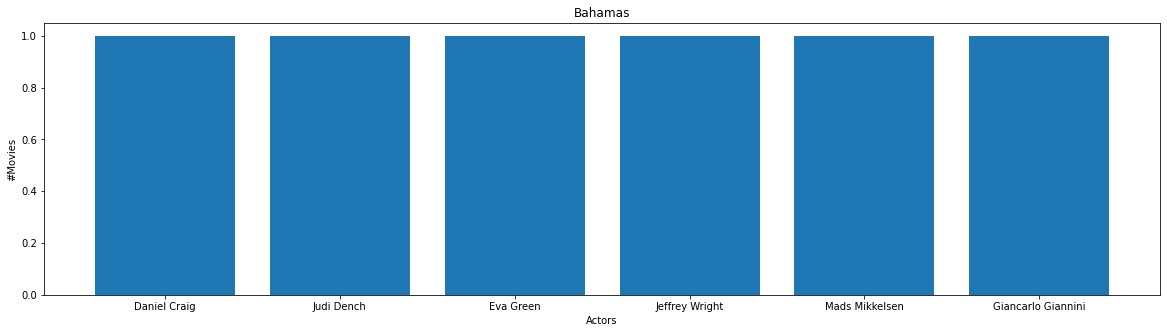

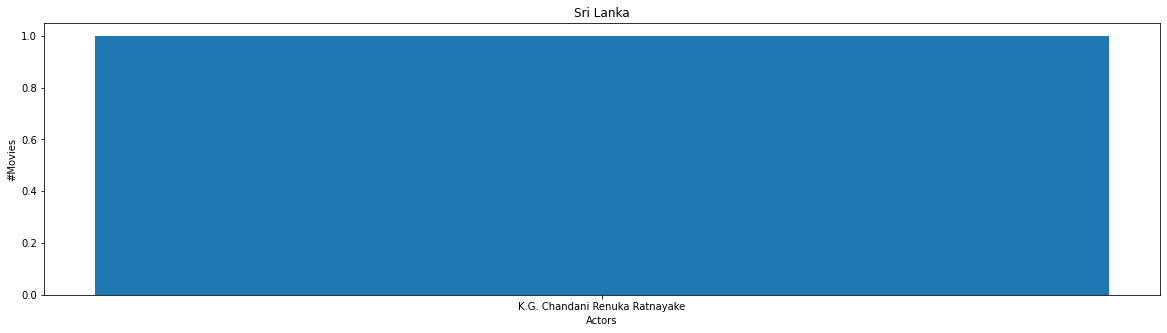

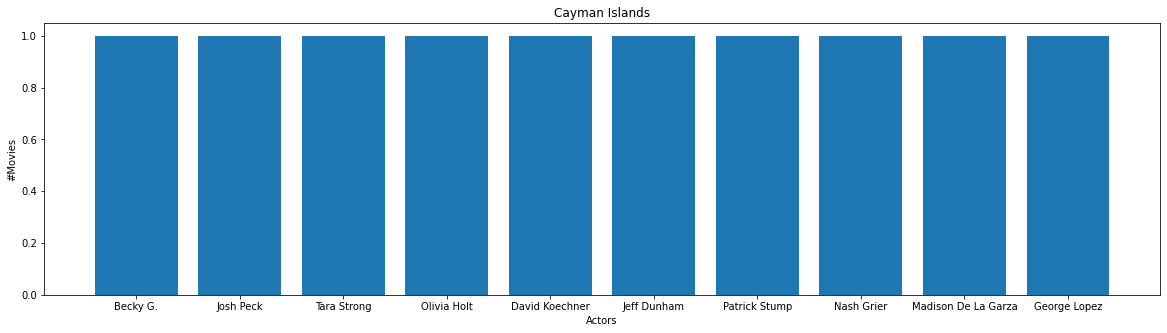

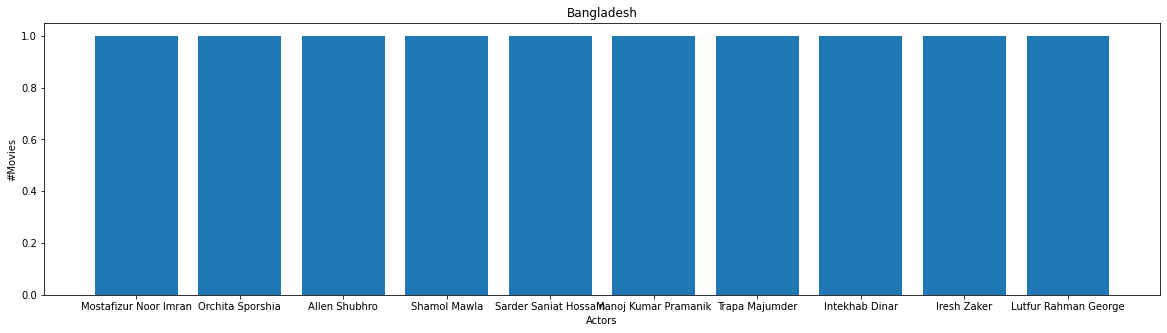

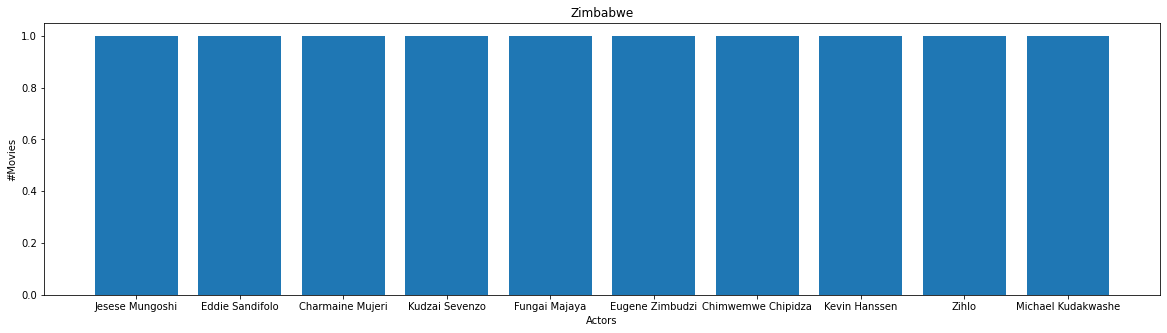

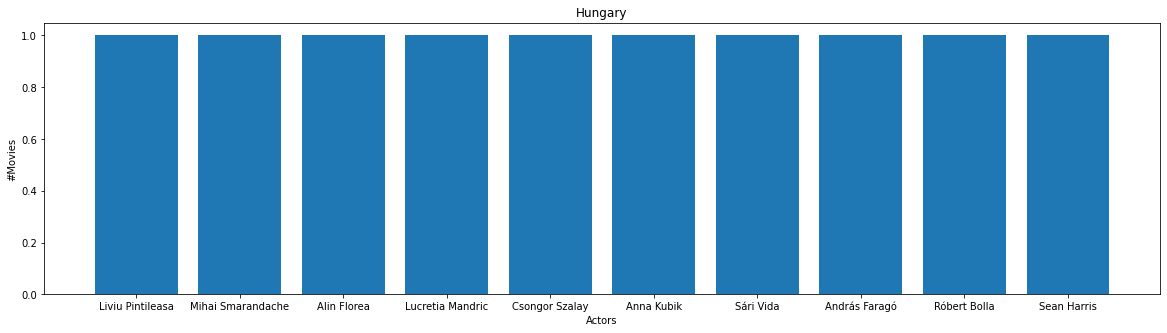

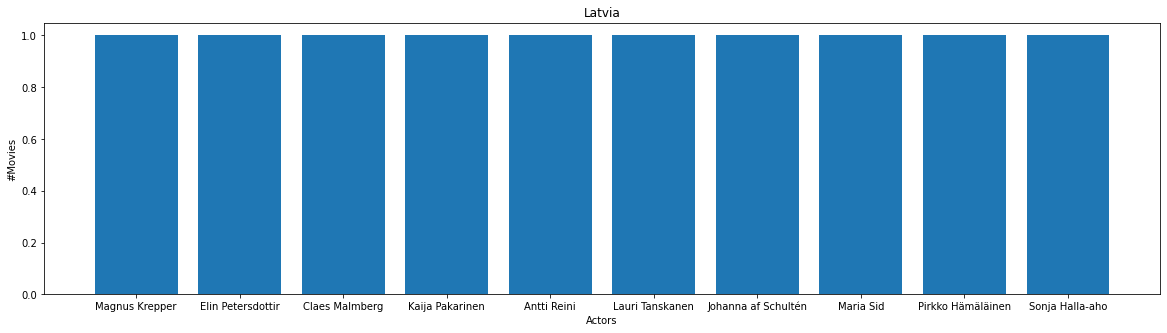

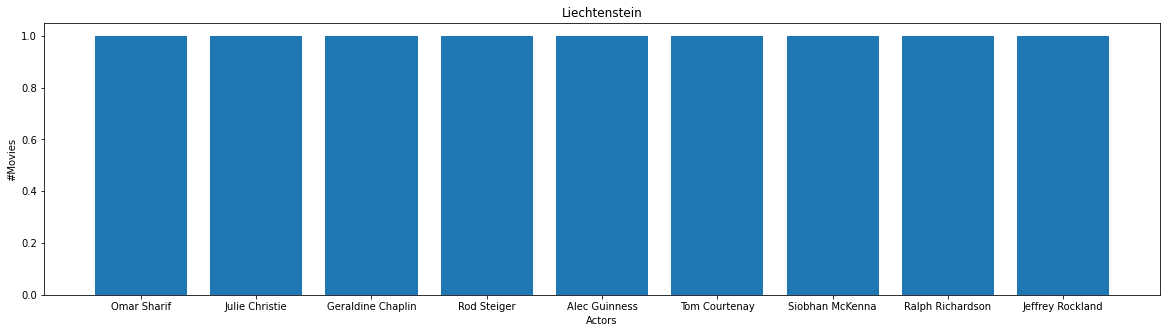

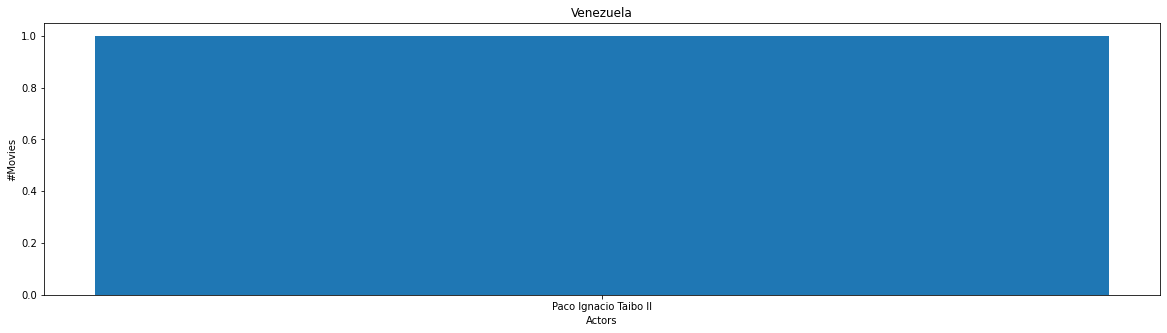

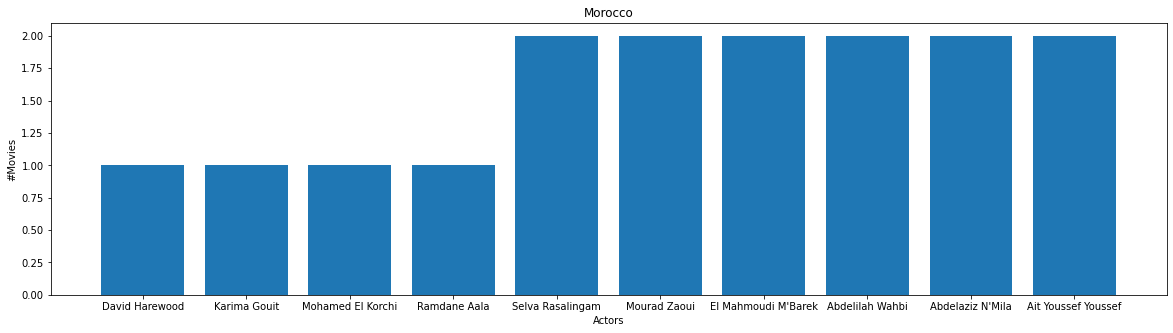

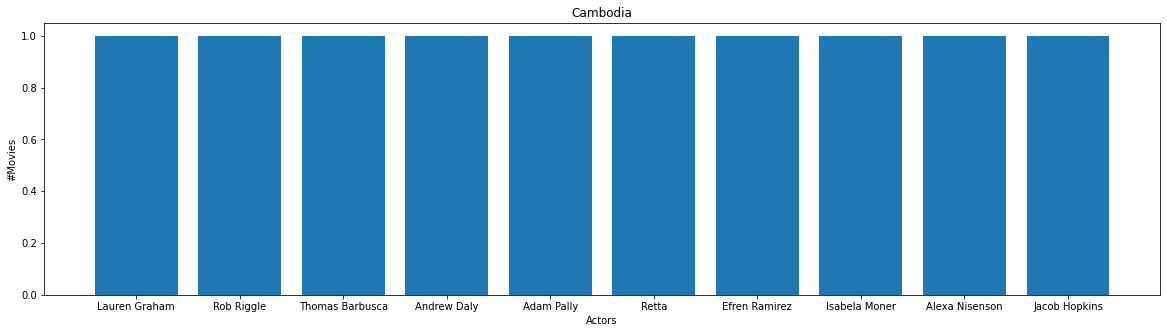

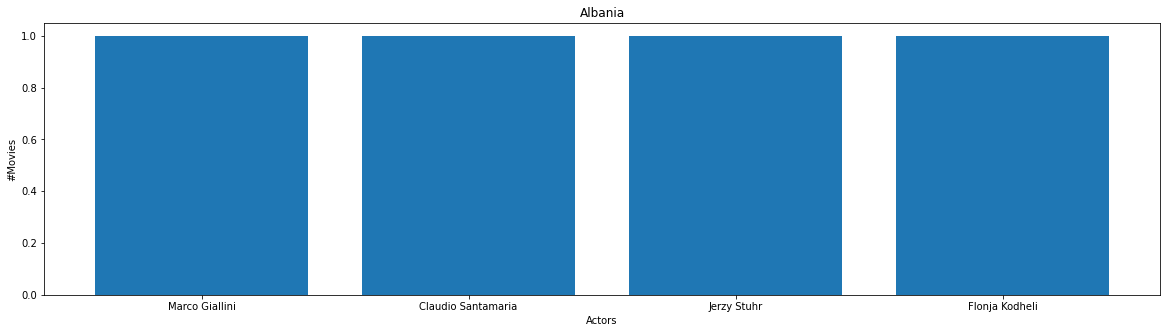

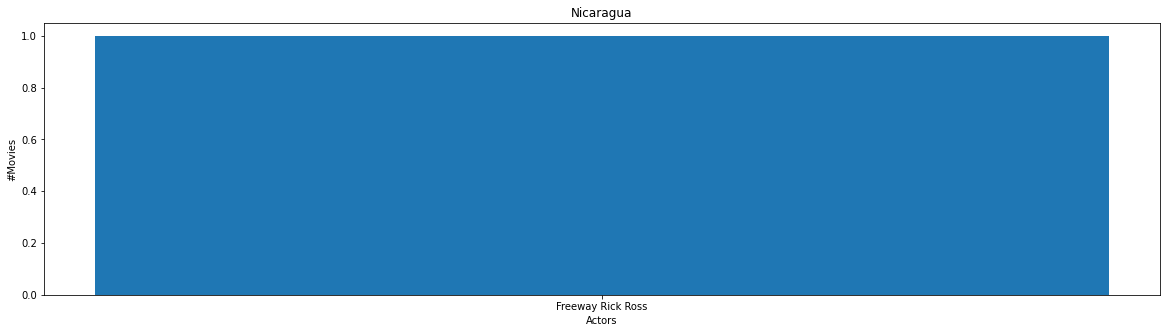

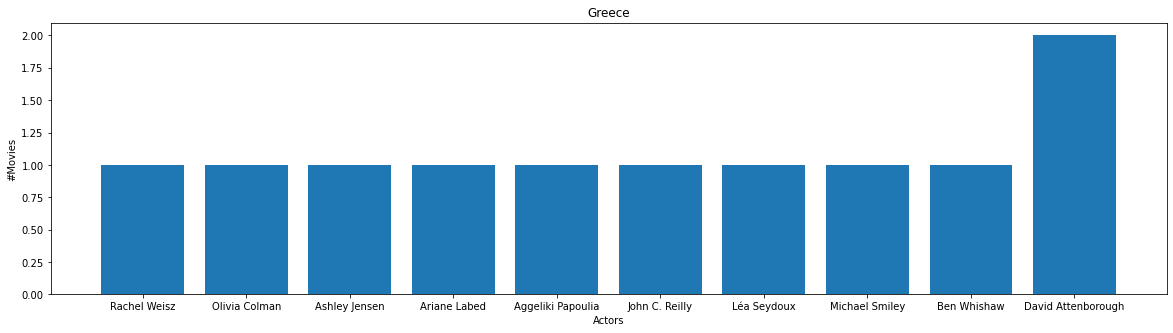

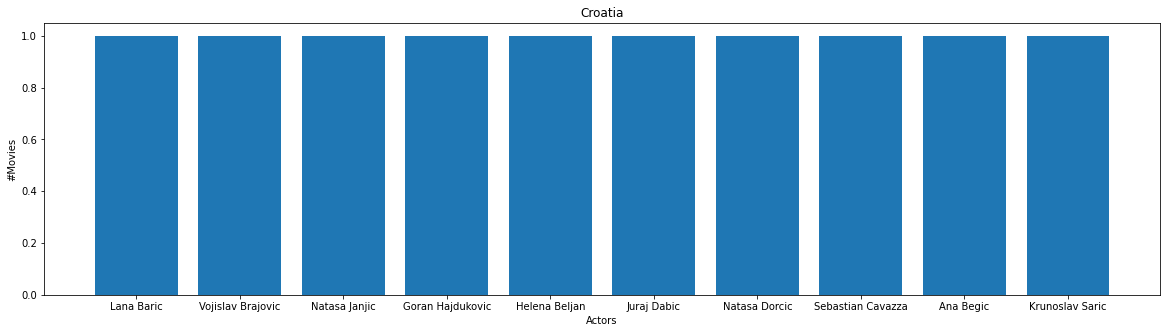

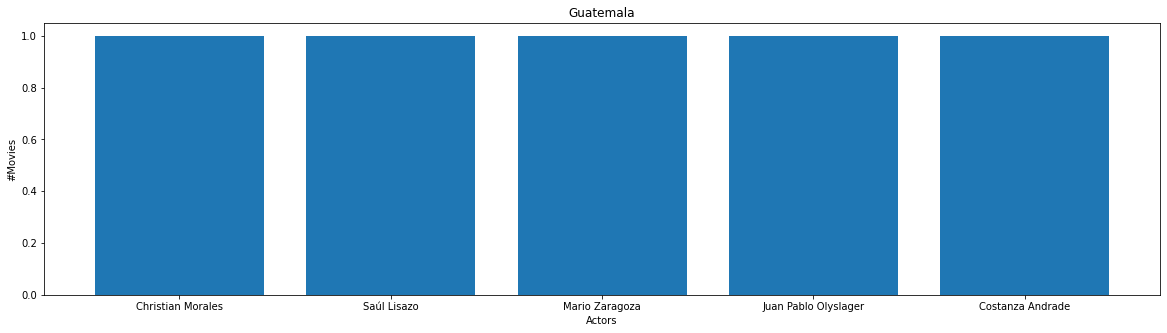

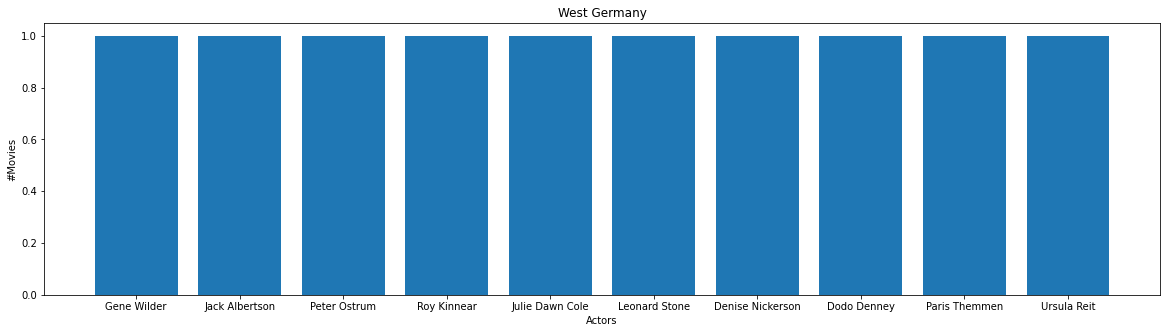

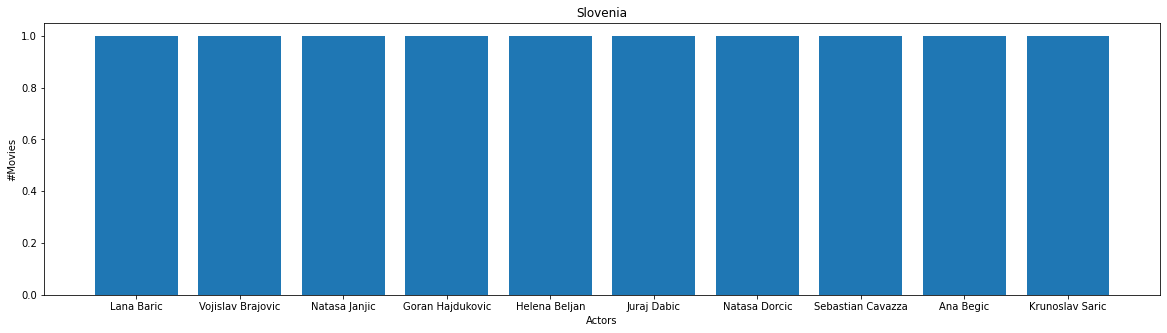

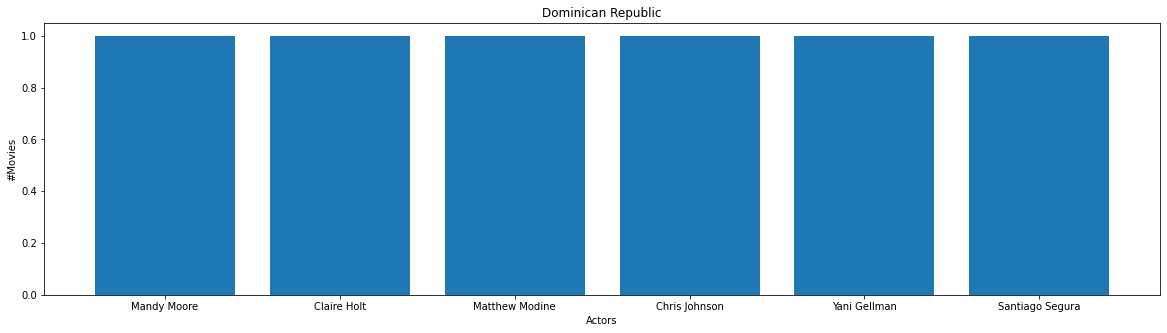

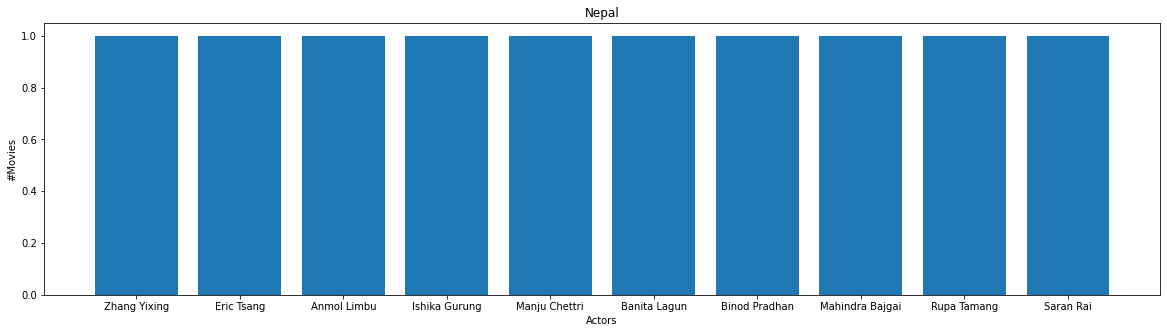

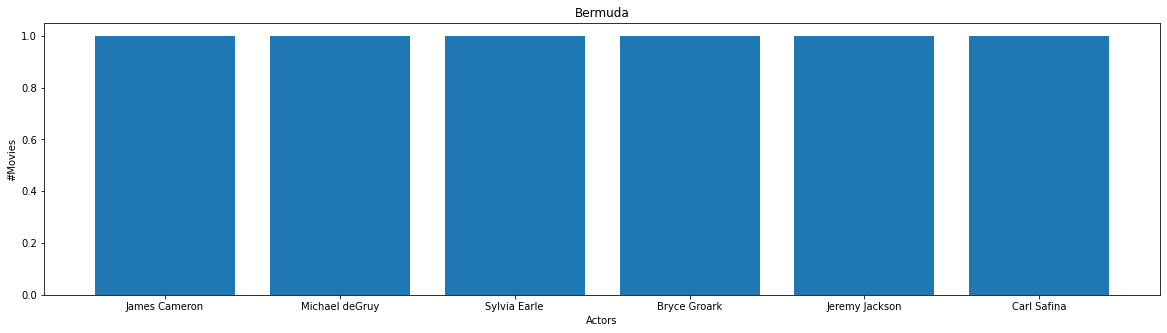

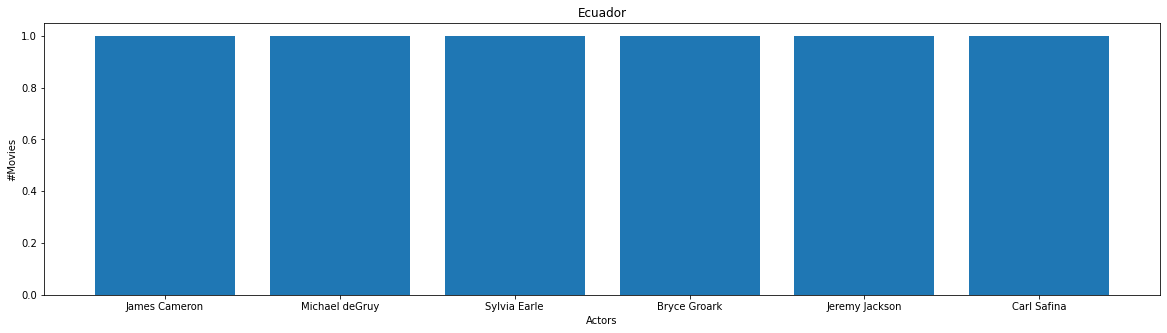

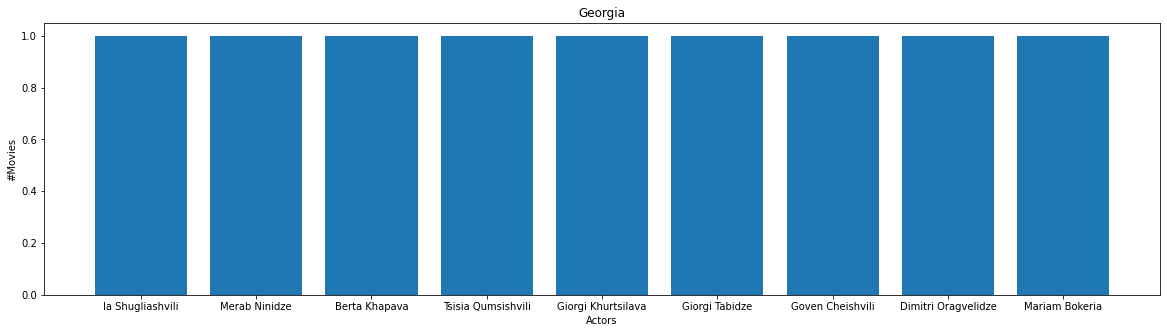

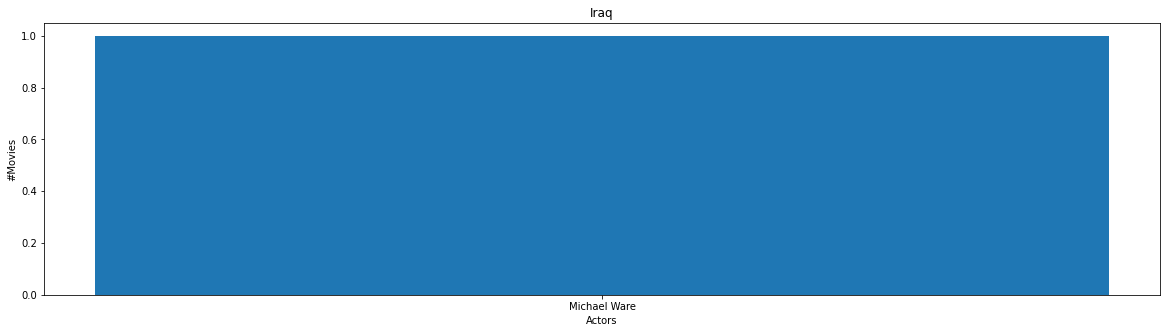

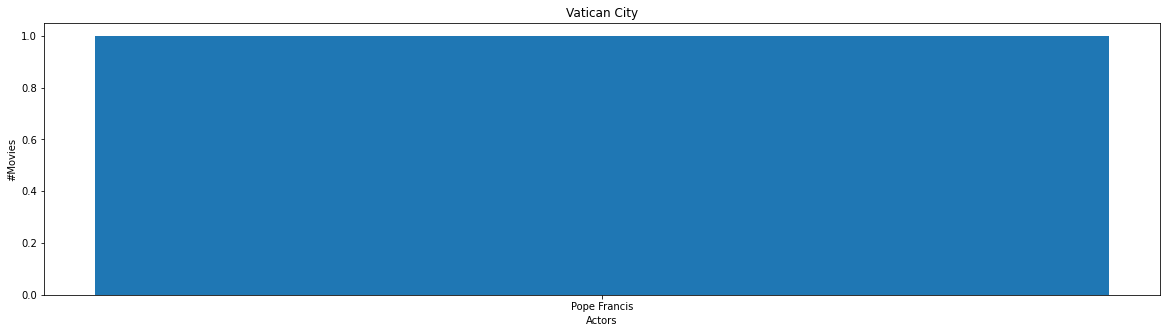

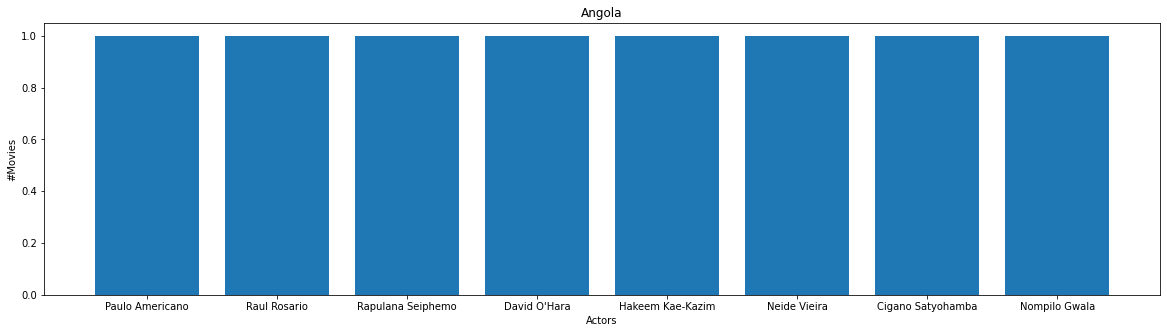

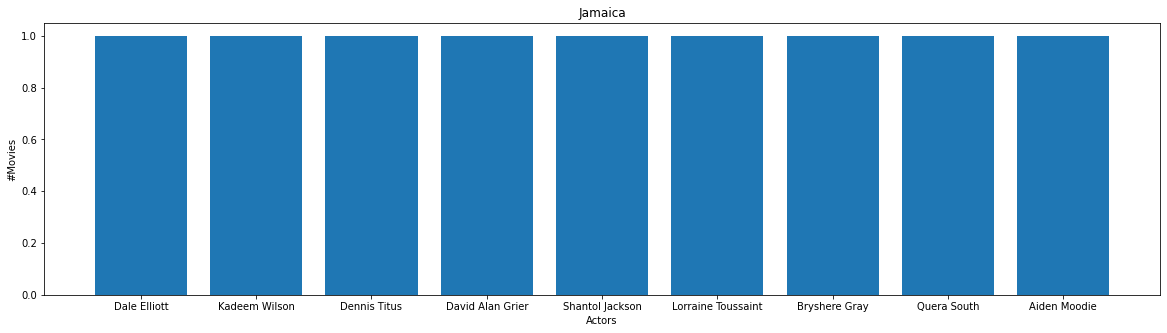

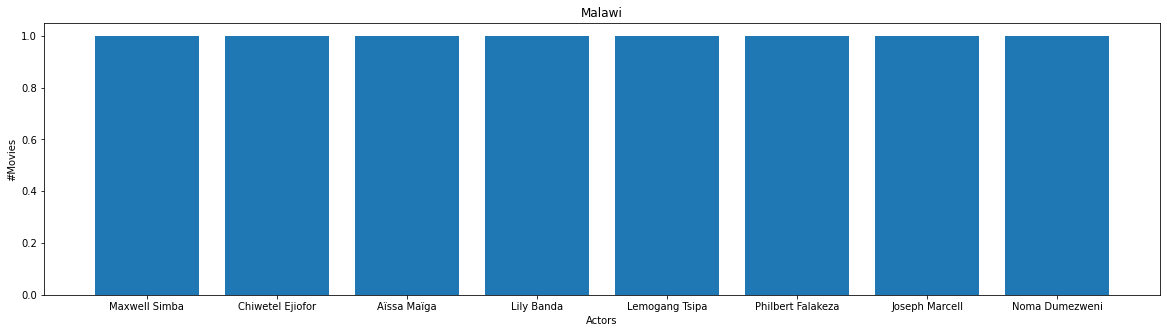

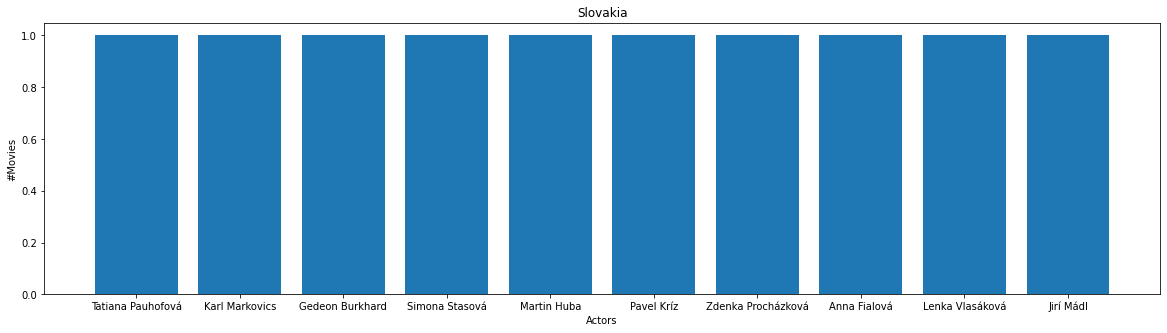

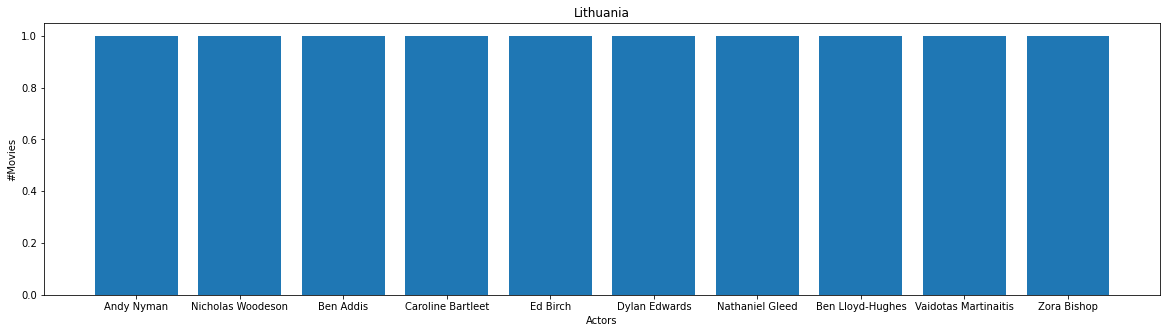

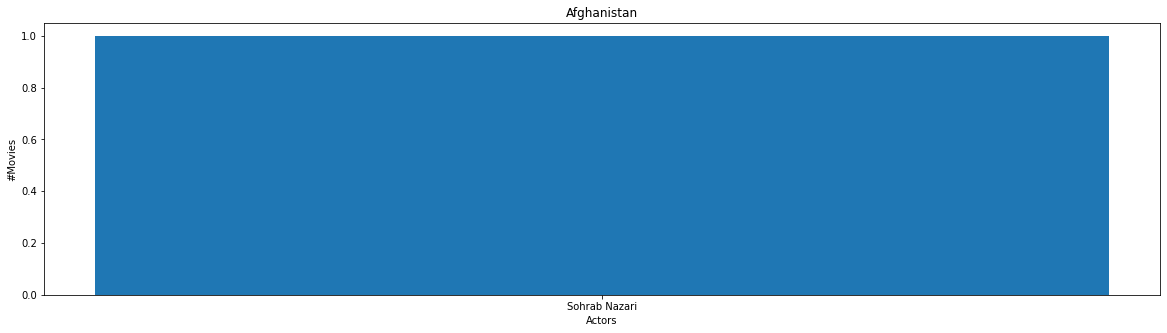

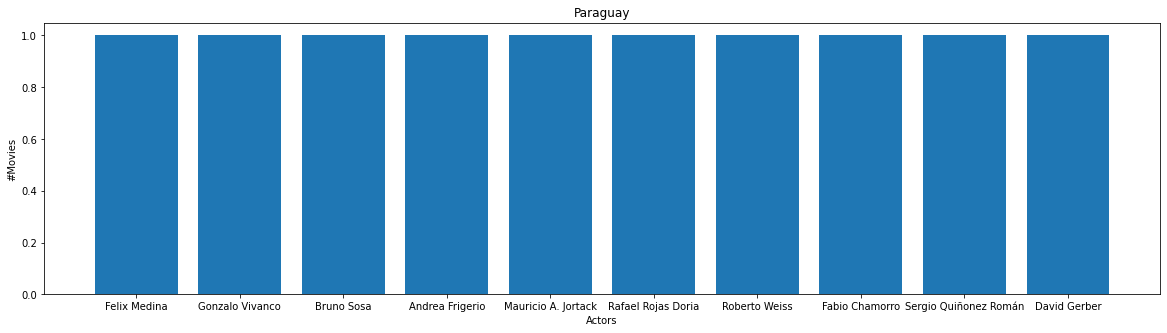

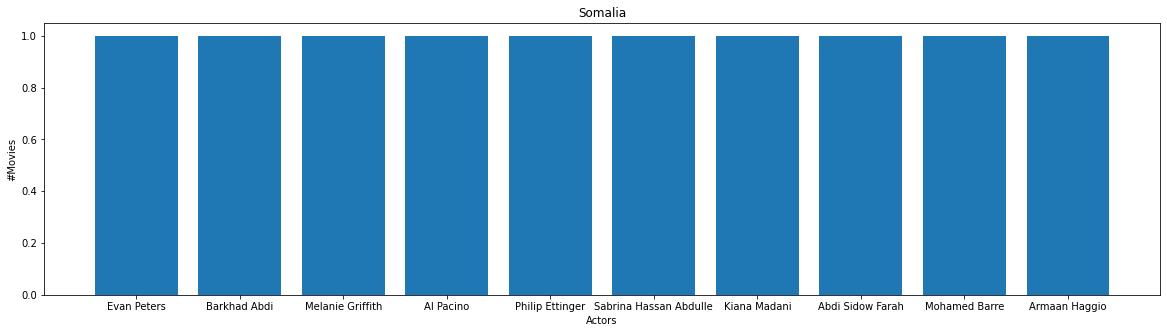

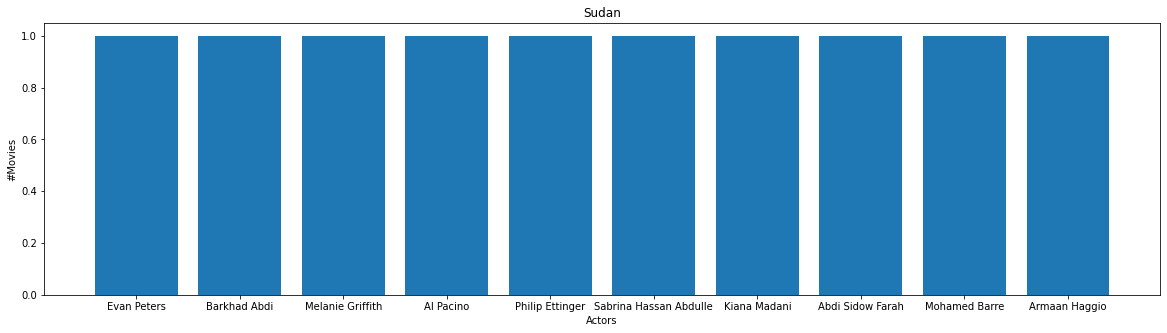

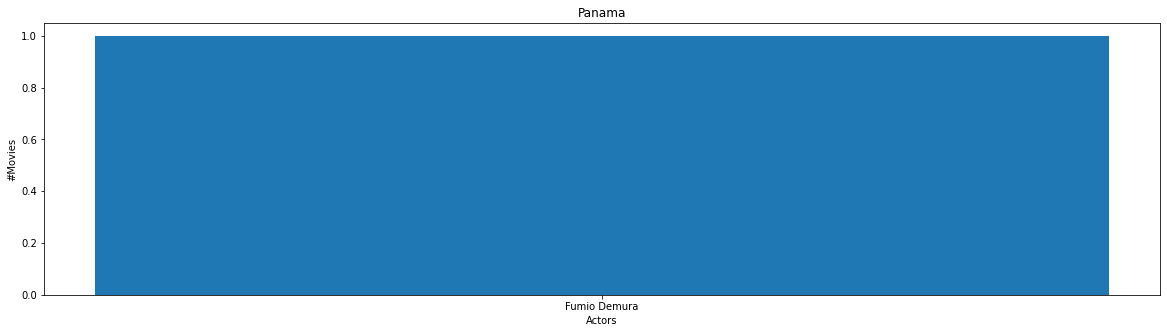

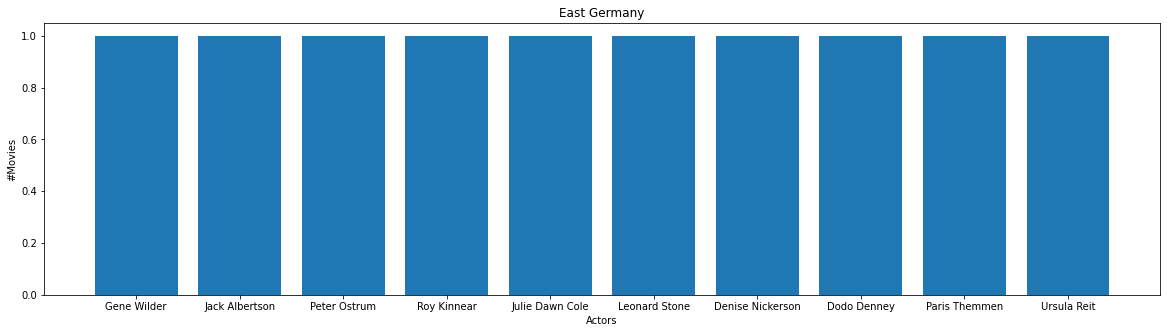

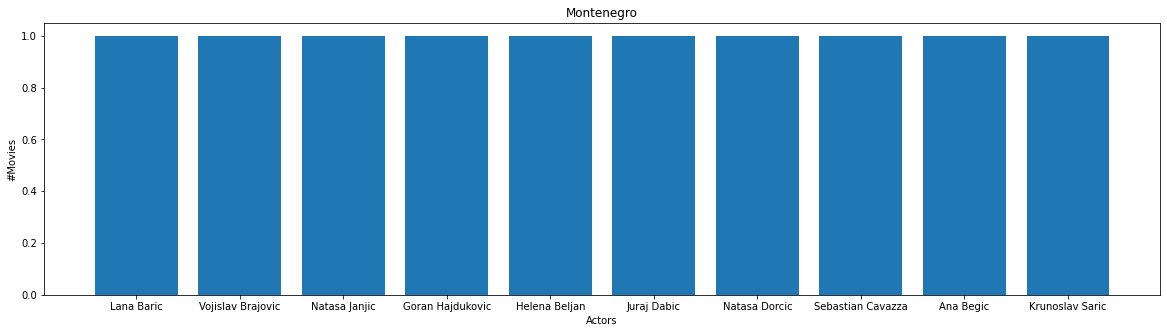

In [ ]:
Dict = {"":{}}#Outter dictionary for every country
inputfile = csv.reader(open('netflix_titles.csv', encoding="utf8"))
for row in inputfile:
    countries = row[5].split(", ")
    actors = row[4].split(", ")
    
    for country in countries:
        if(',' in country):
            country = country.replace(',', '')#get countries from file
        if not country:#empty case
            continue
        if country not in Dict.keys():
            Dict[country] = {}#inner dictionary will contain the actors
            for actor in actors:#The value will be one counter for the movies and
                if not actor:#one for the tv shows (inside a list)
                    continue
                if row[1] == "TV Show":#intialize inner dictionary
                    Dict[country].update({actor: [0, 1]})
                else:
                    Dict[country].update({actor: [1, 0]})
        else:#if the country does exist in dict
            for actor in actors:
                if not actor:
                    continue
                if actor not in Dict[country].keys():
                  #If there are actors that doesnt exist in that country
                    if row[1] == "TV Show":
                        Dict[country].update({actor: [0, 1]})
                    else:
                        Dict[country].update({actor: [1, 0]})
                else:#If they exist, just increase counter
                    if row[1] == "TV Show":
                        Dict[country][actor][1] += 1
                    else:
                        Dict[country][actor][0] += 1

import operator

for country in Dict.keys():
    #Just sort actors based on second counter(Movies)
    sorted_tuples = sorted(Dict[country].items(), key=operator.itemgetter(1))
    #print(sorted_tuples)  # [(1, 1), (3, 4), (2, 9)]
    sorted_dict = {k: v for k, v in sorted_tuples}
    Dict[country] =  sorted_dict #update new dict(sorted)

for country in Dict.keys():
    a = []
    #aggegrate the values(the top ten actors) for every country
    a = list(Dict[country].values())[-10:]
    variable = [x[0] for x in a]
    
    #Dont contain zero value for an actor in the plot
    counter = 0
    for var in variable:
        if var != 0:
            counter += 1

    if counter == 0:
        continue

    ## plotting a bar chart
    f, ax = plt.subplots(figsize=(20,5)) # set the size that you'd like (width, height)
    #Get the highest 10 values because dict is sorted
    #Bar accepts only list , so we did that trick
    plt.bar(list(Dict[country].keys())[-counter:], variable[-counter:])
    #print(list(Dict[country].keys())[-10:])

    # x-axis label
    plt.xlabel('Actors')
    # frequency label
    plt.ylabel('#Movies')
    plt.title(country)
    plt.show()



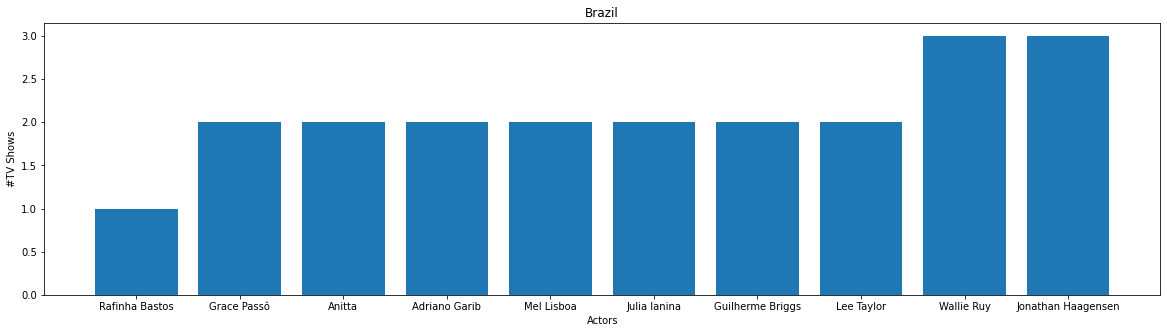

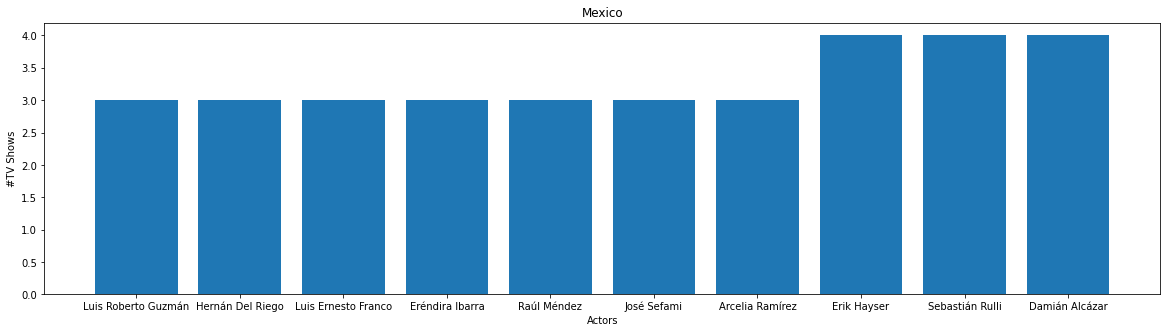

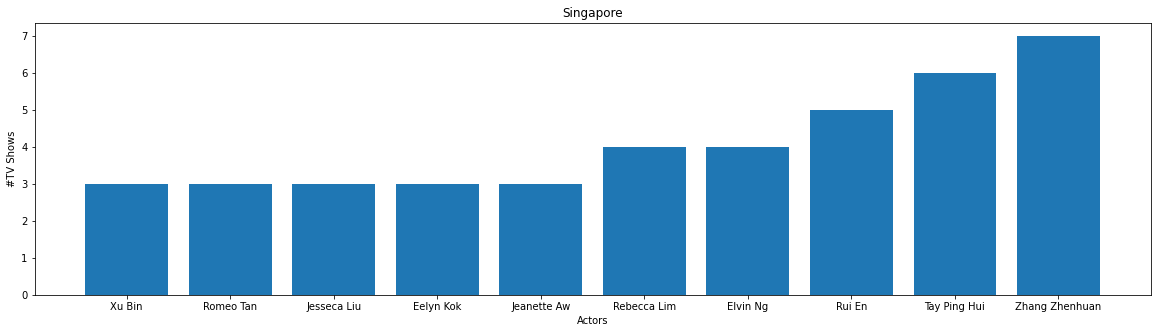

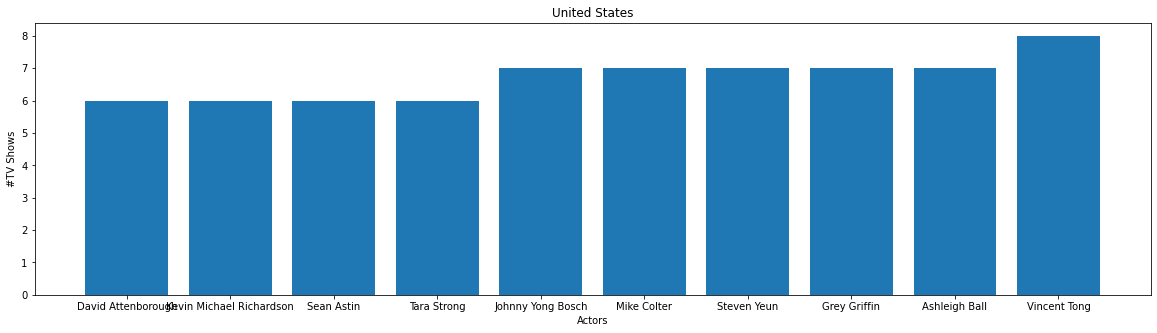

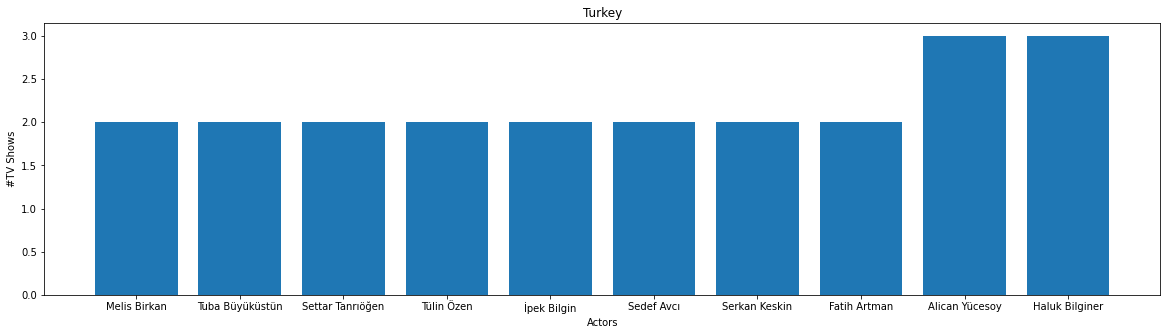

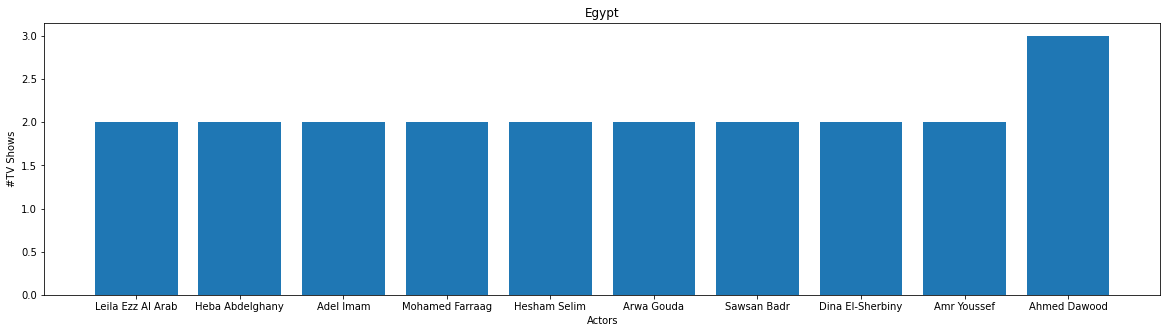

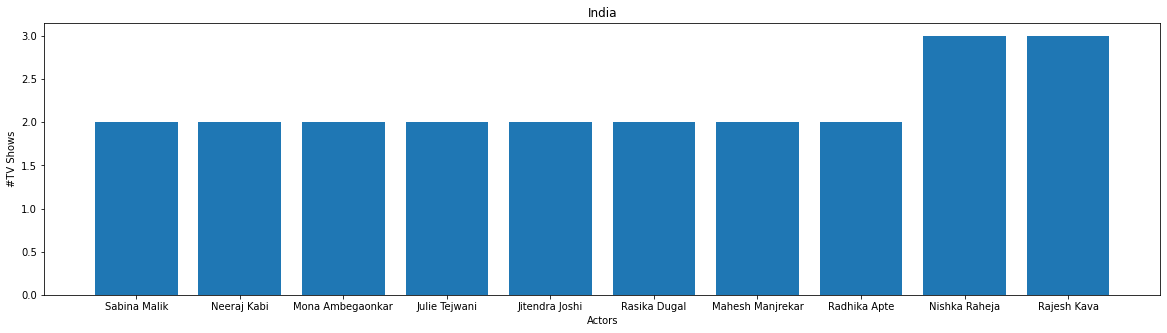

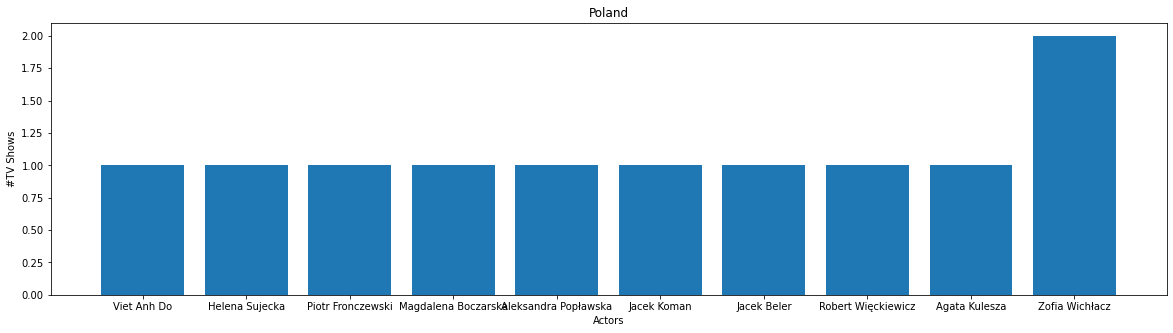

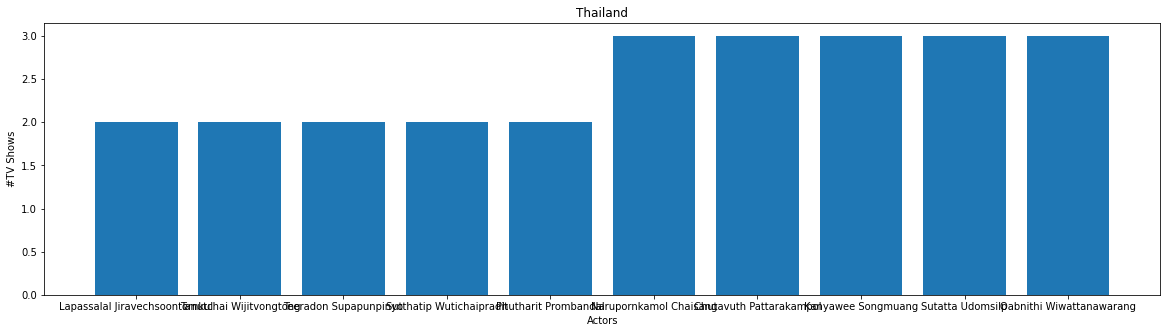

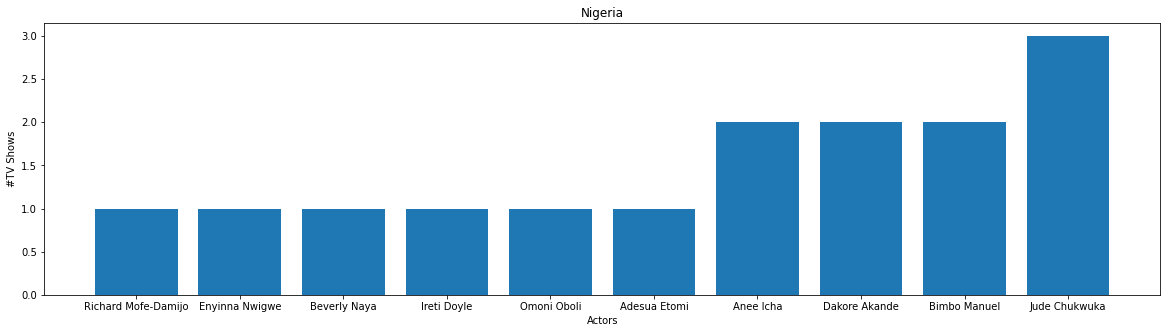

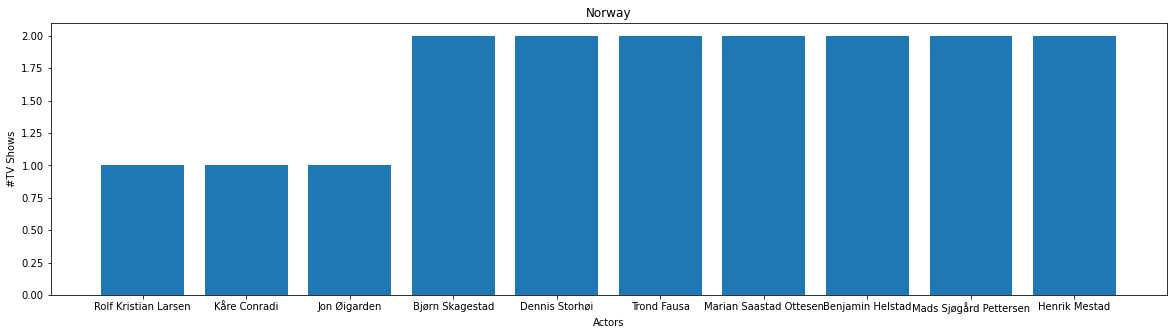

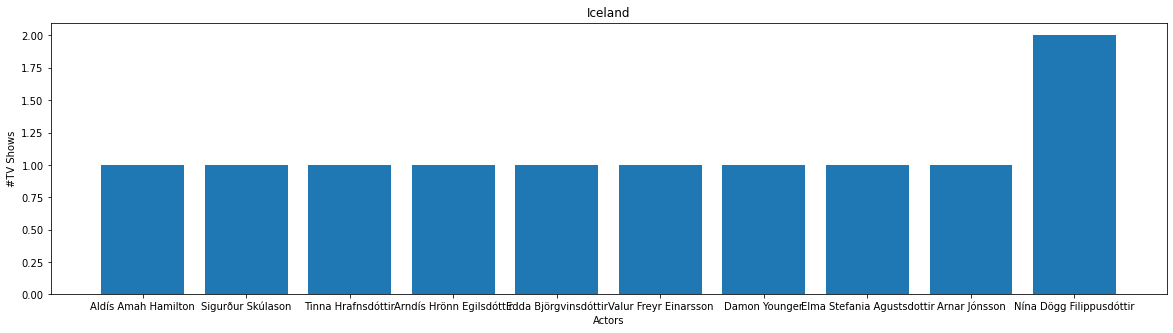

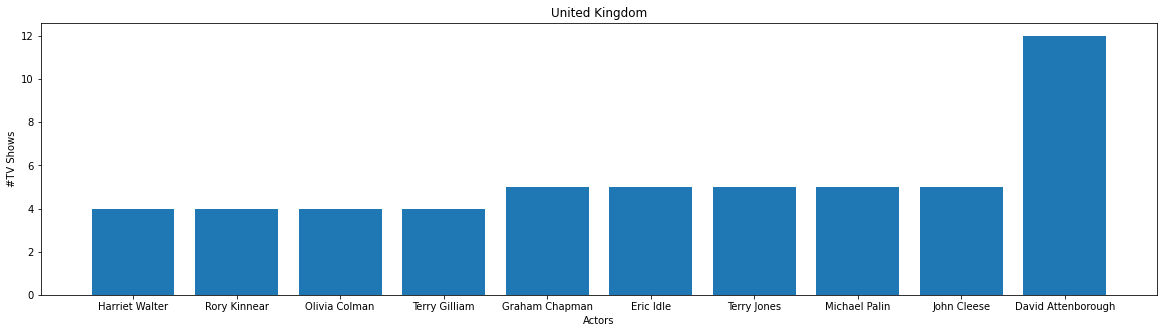

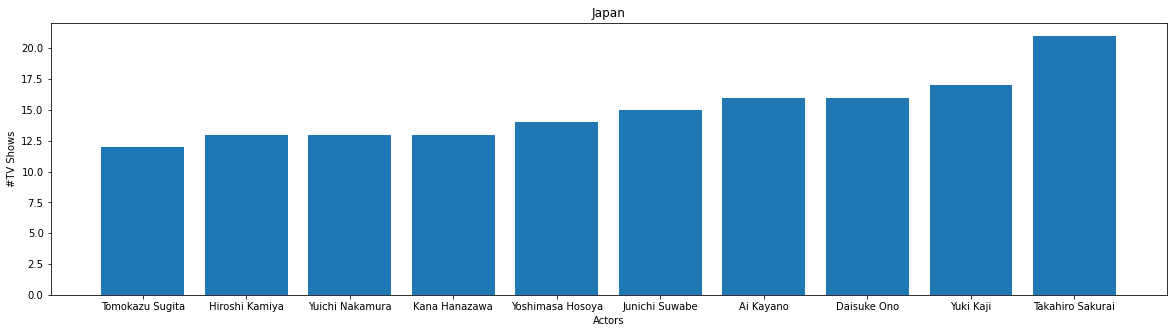

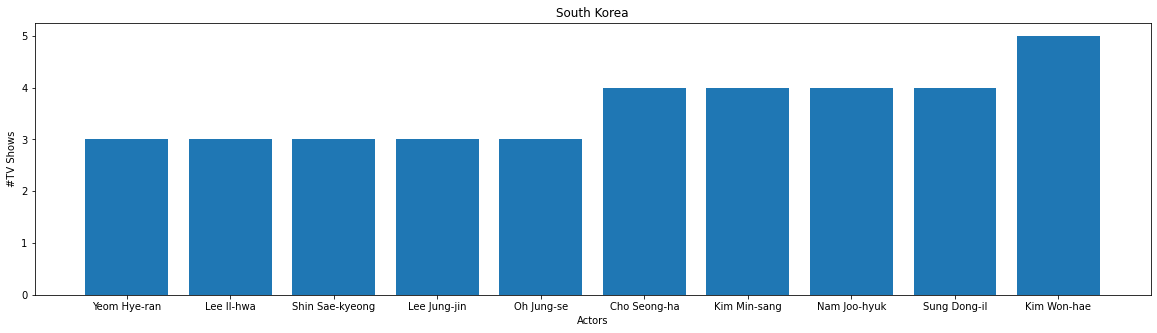

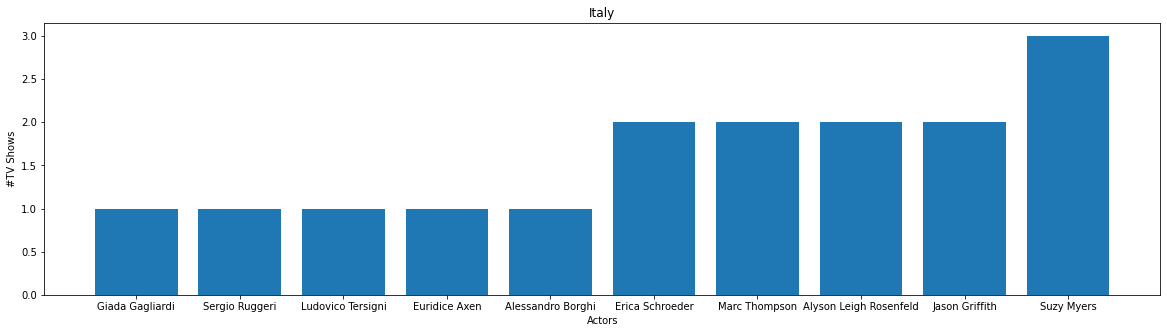

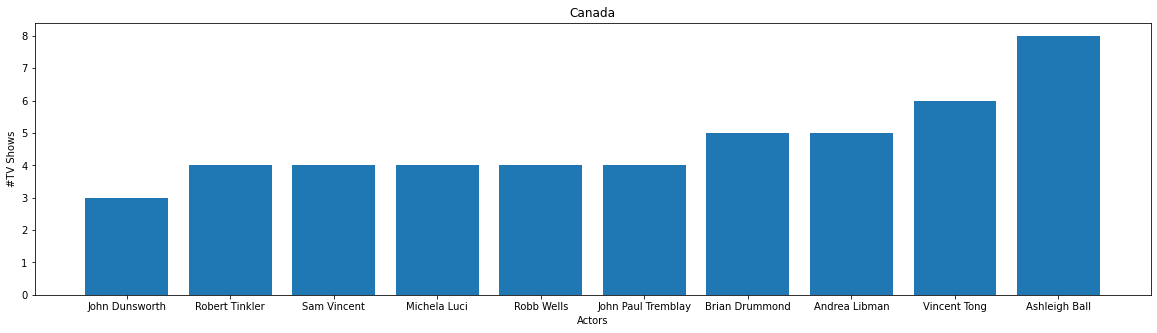

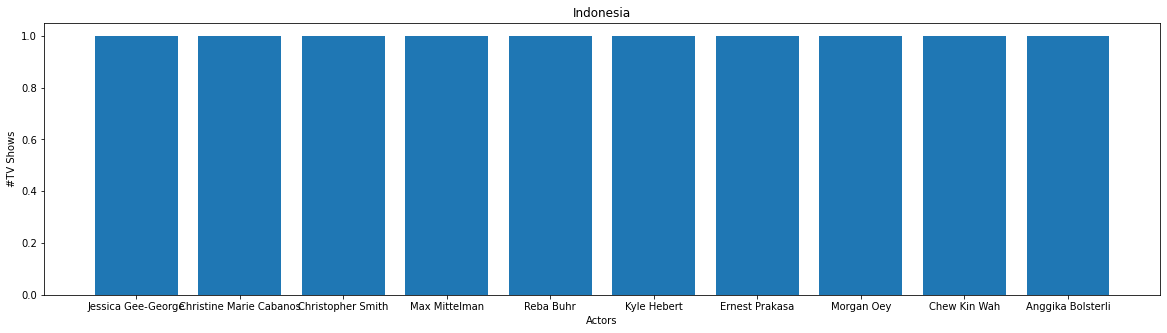

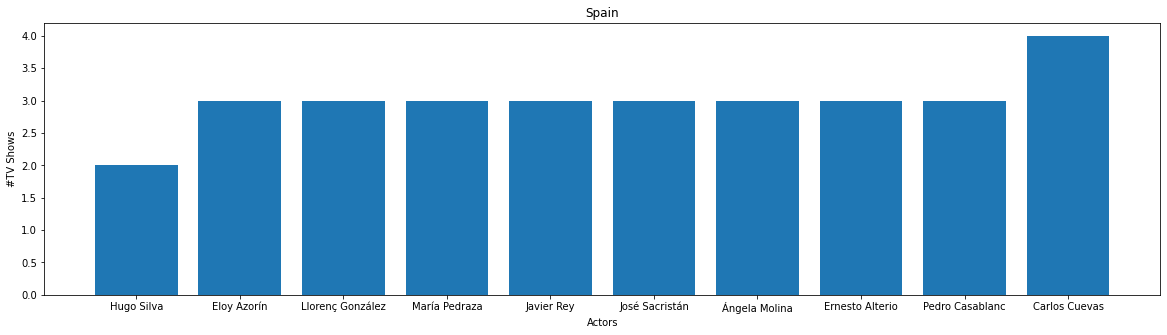

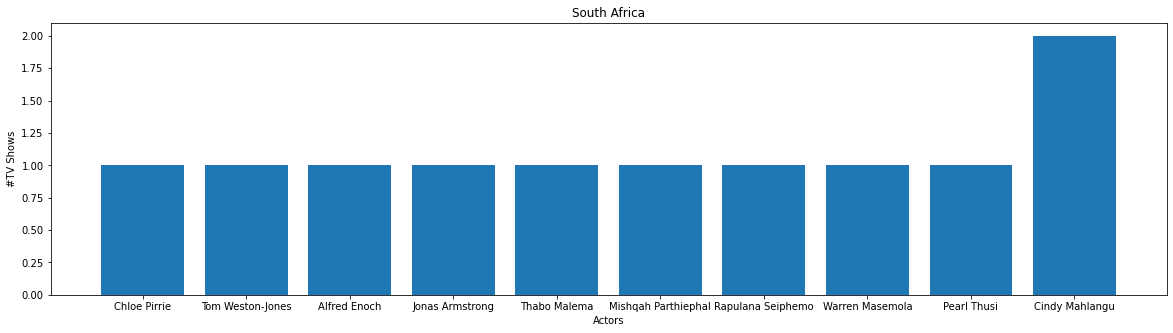

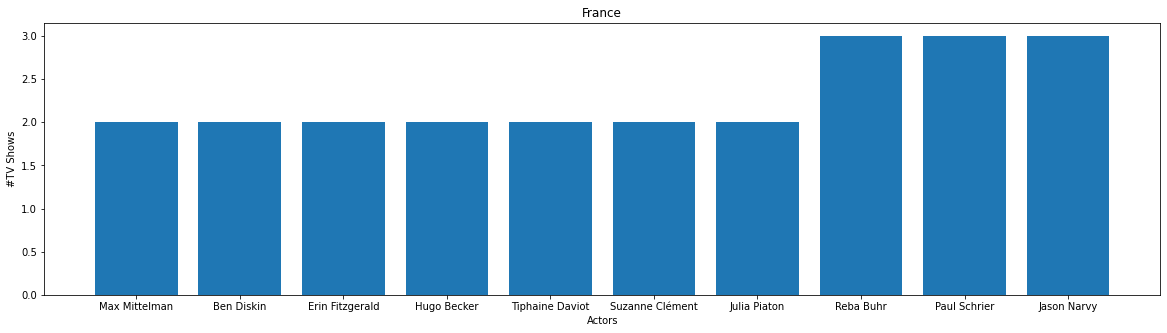

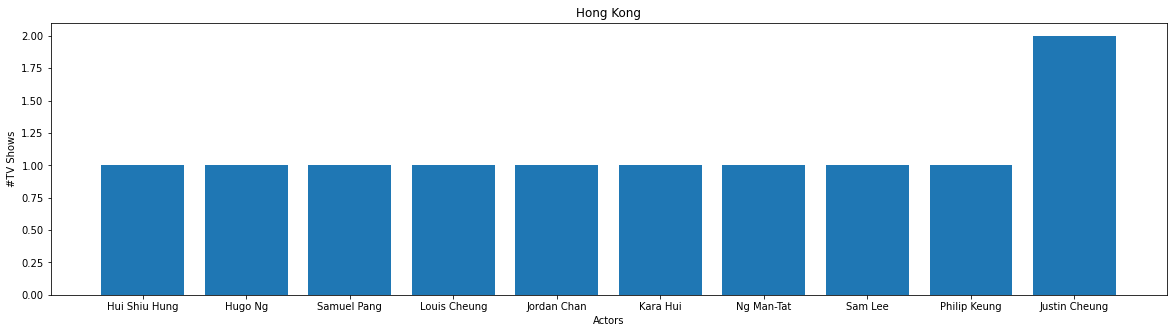

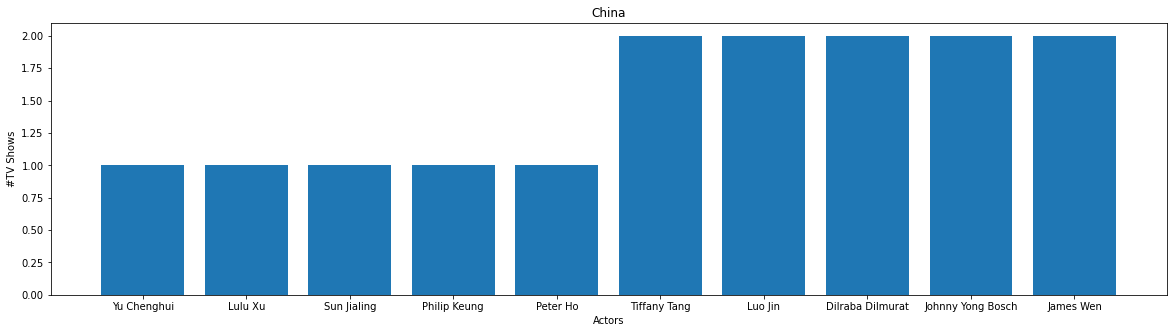

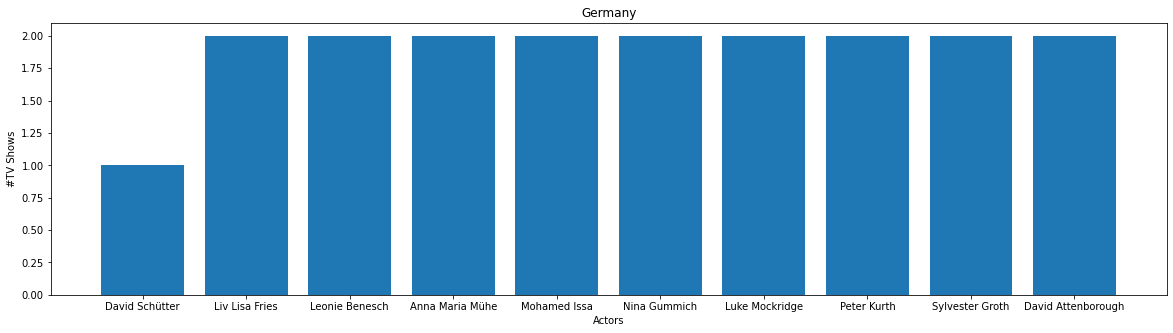

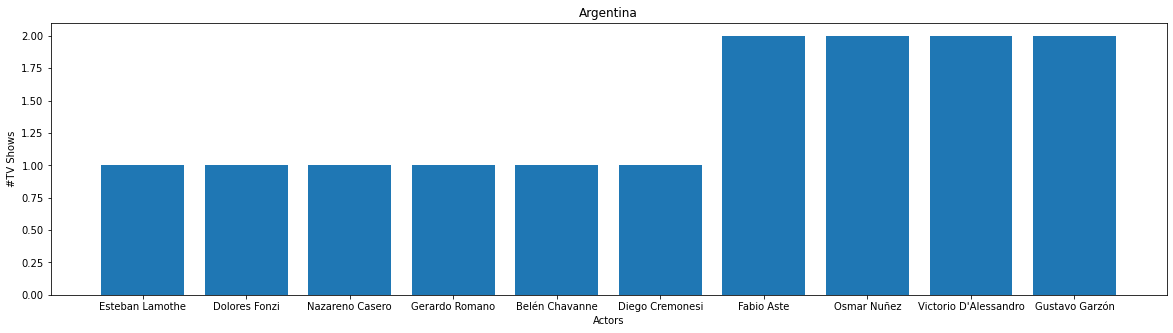

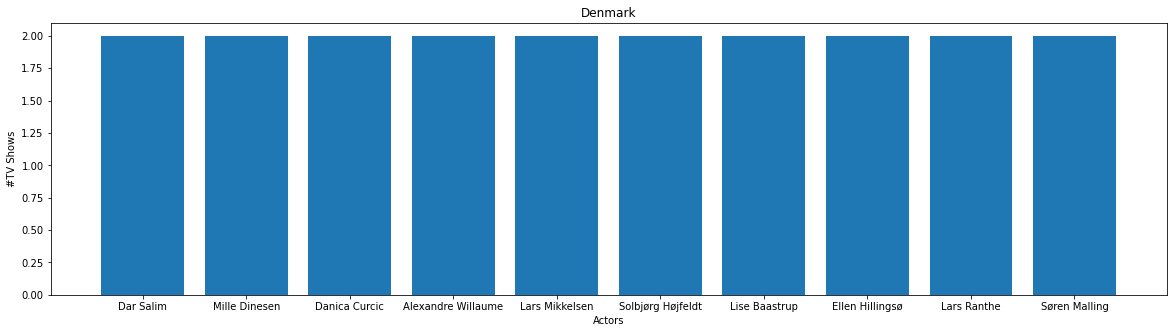

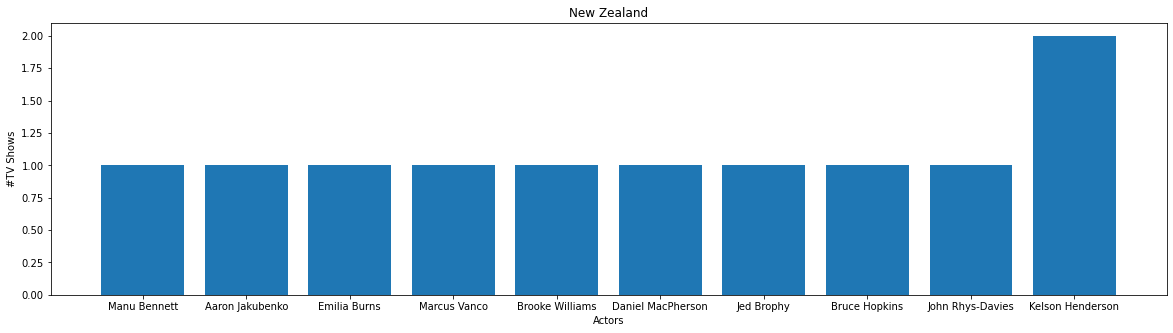

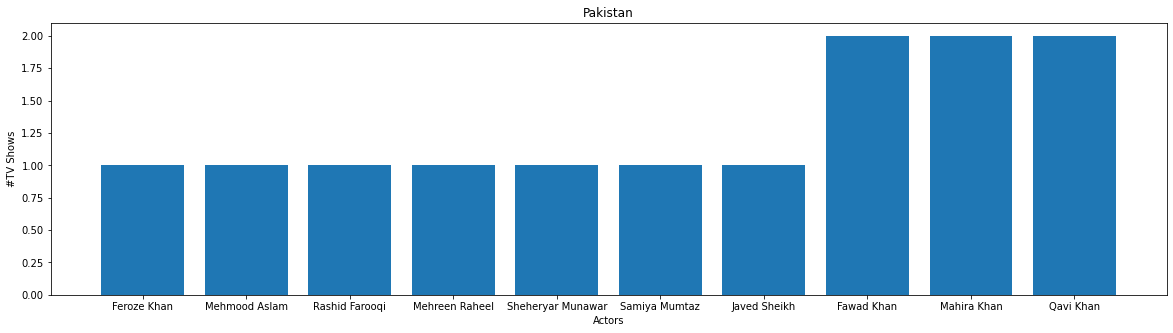

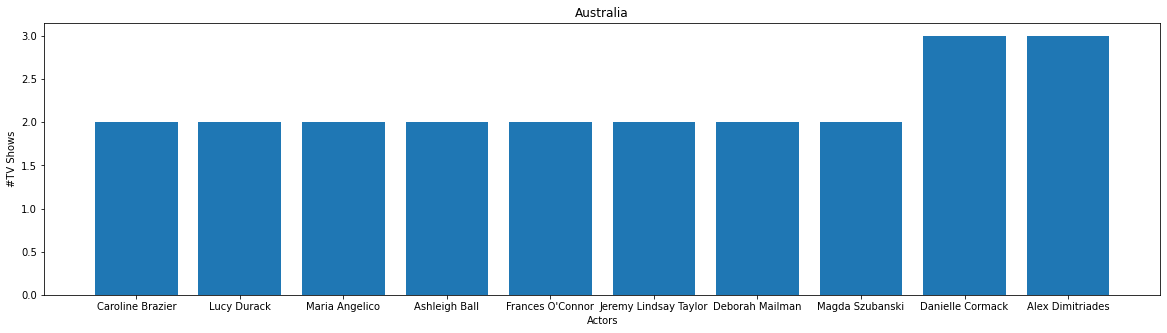

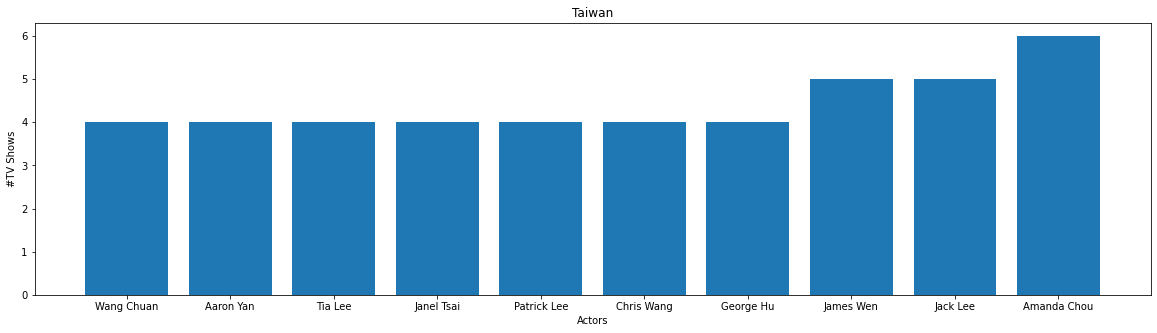

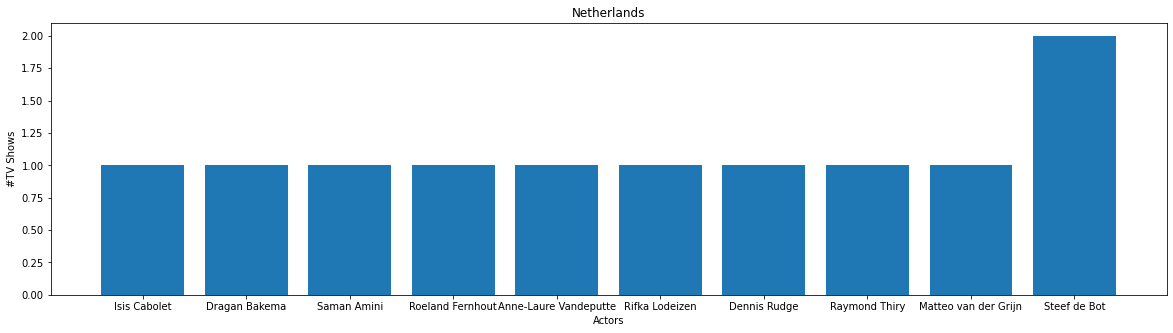

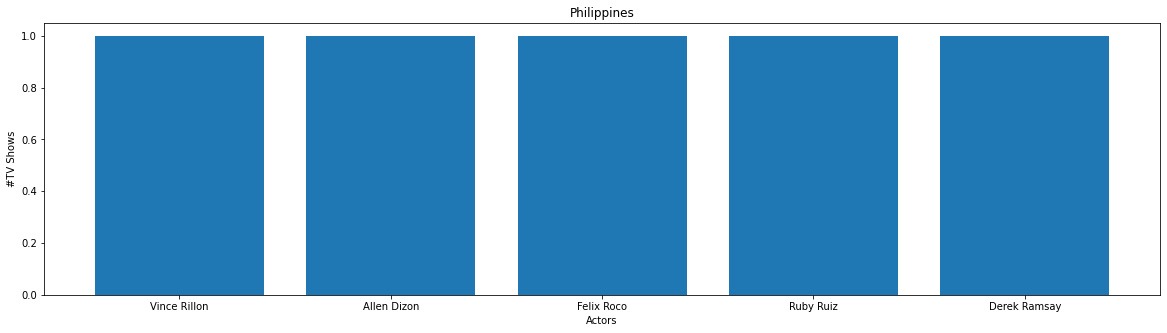

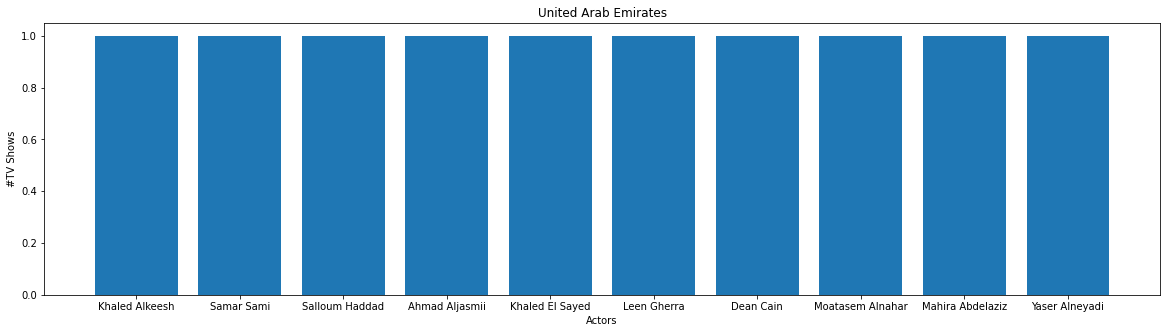

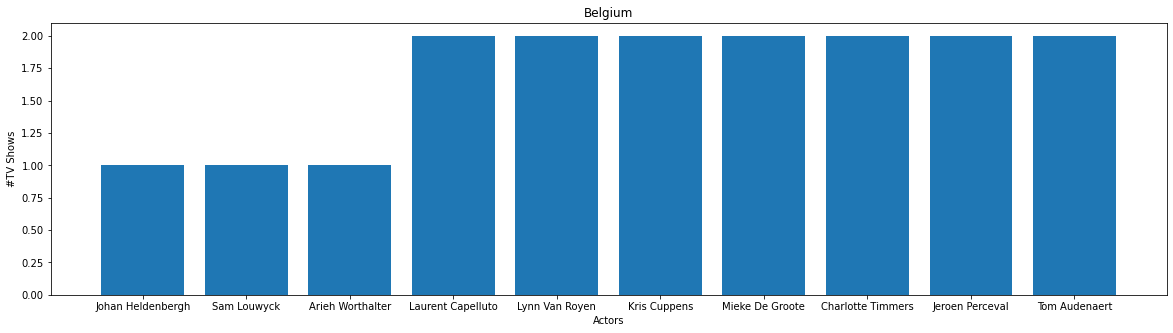

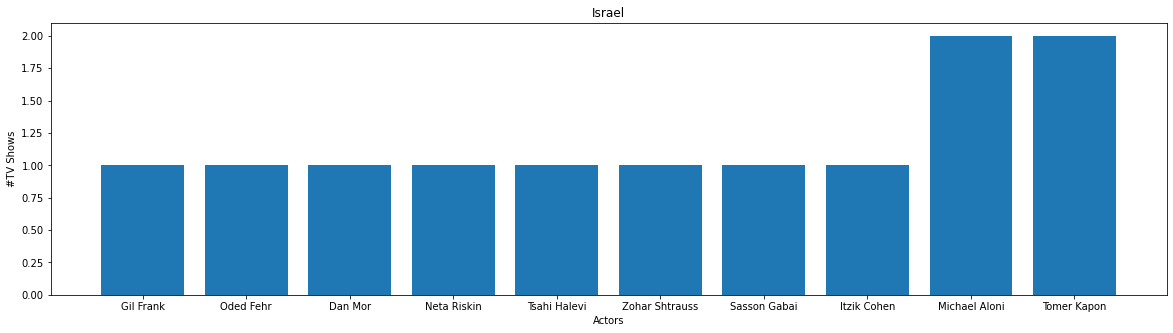

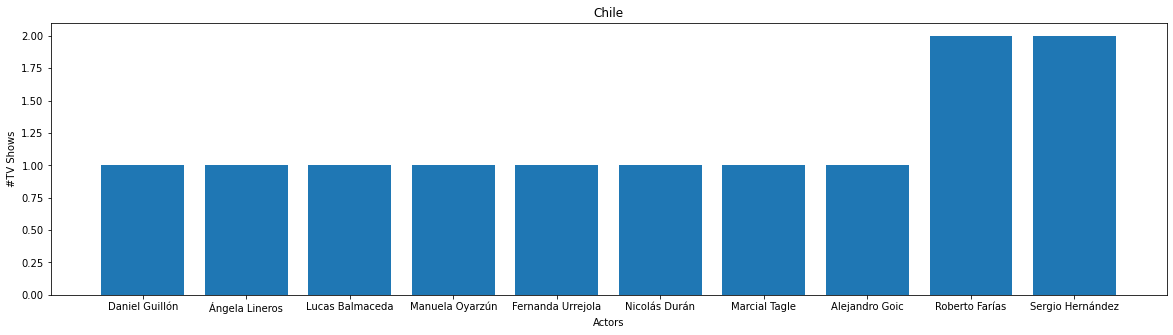

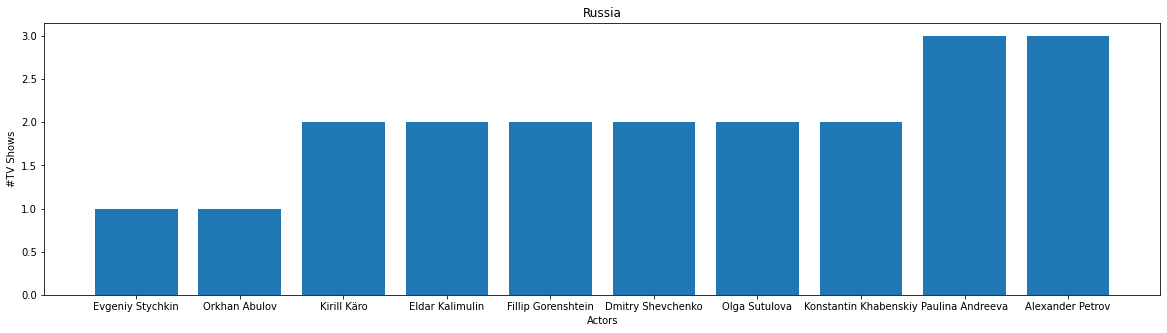

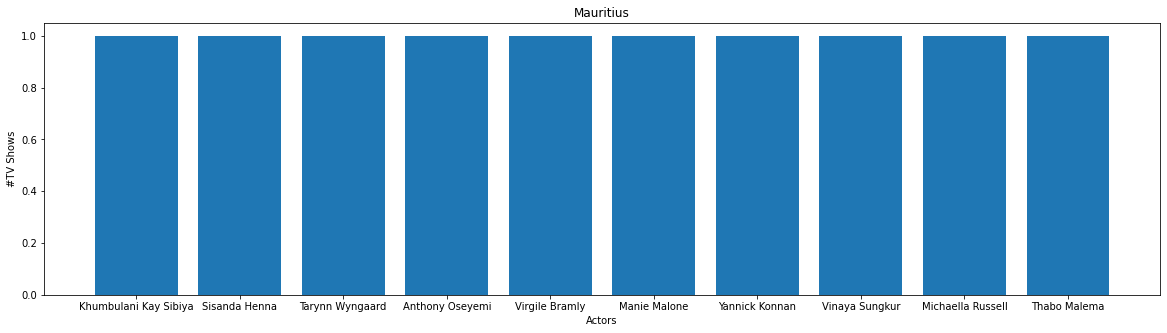

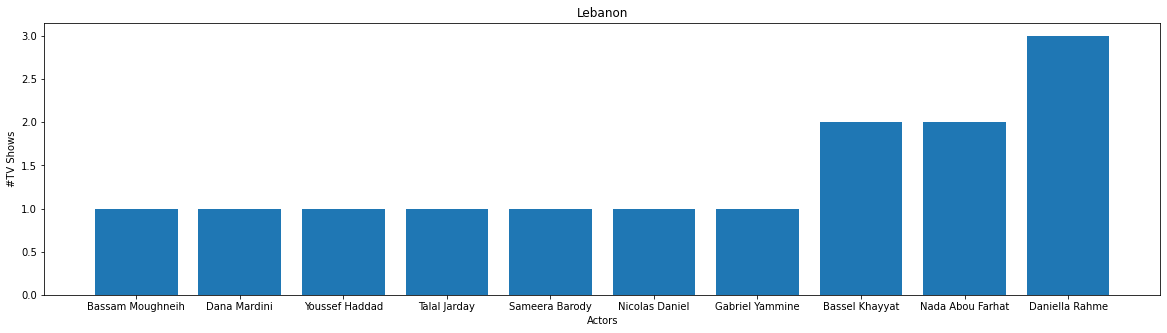

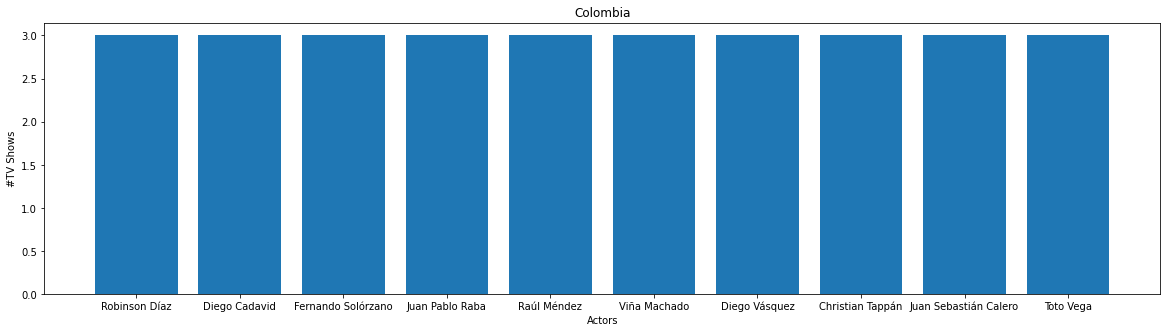

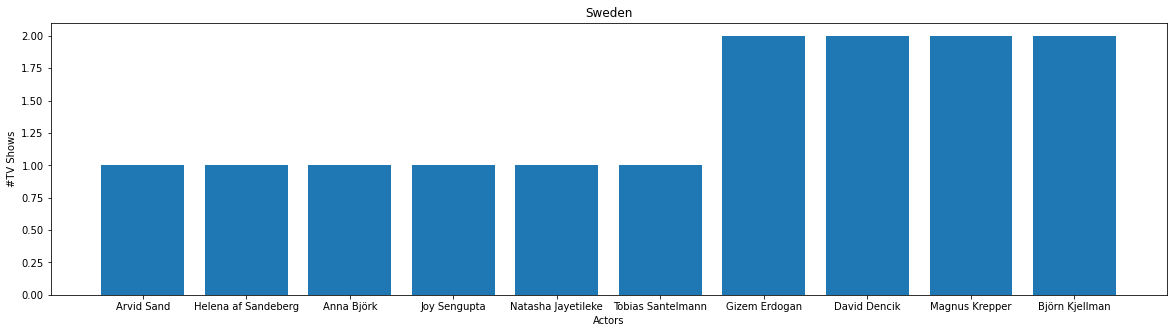

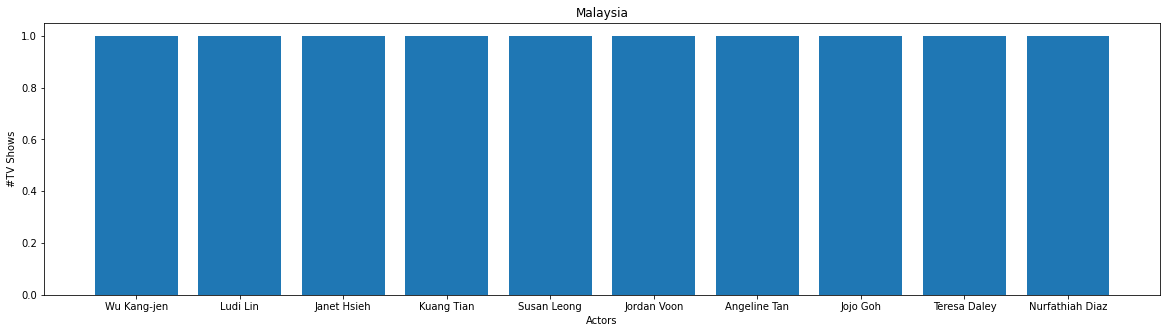

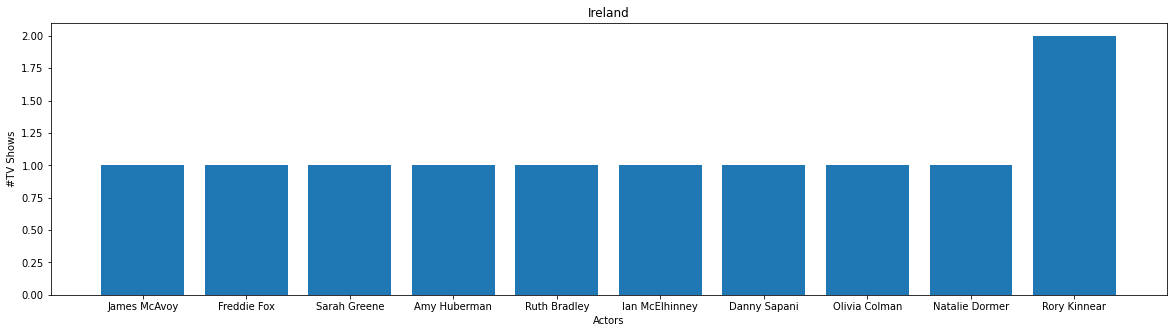

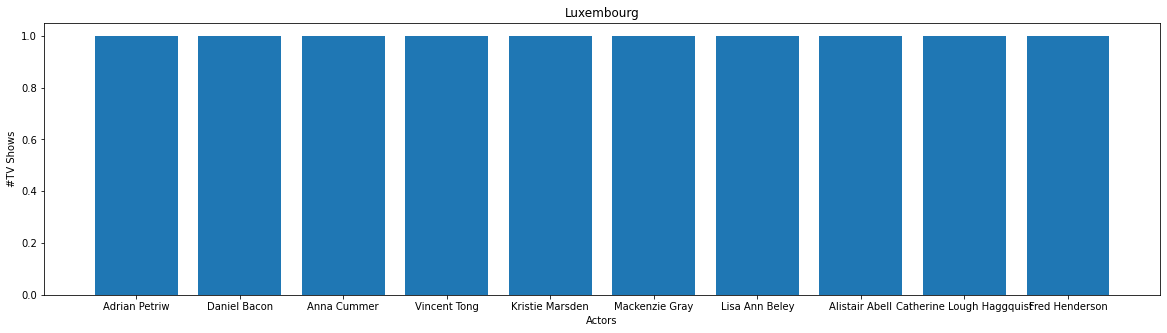

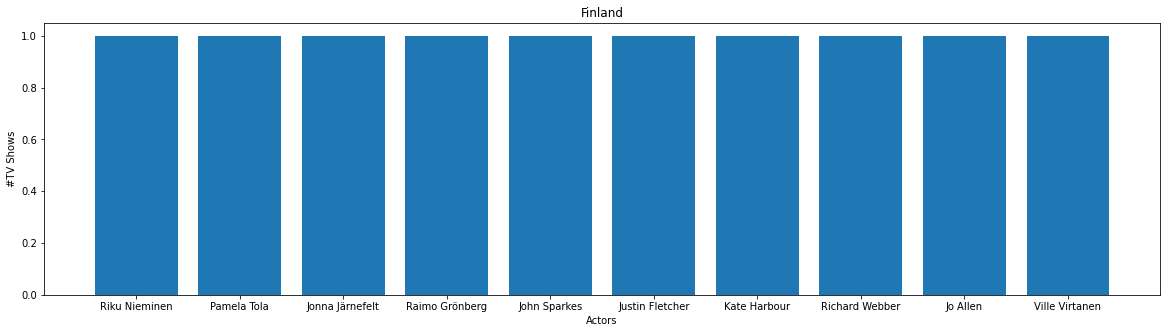

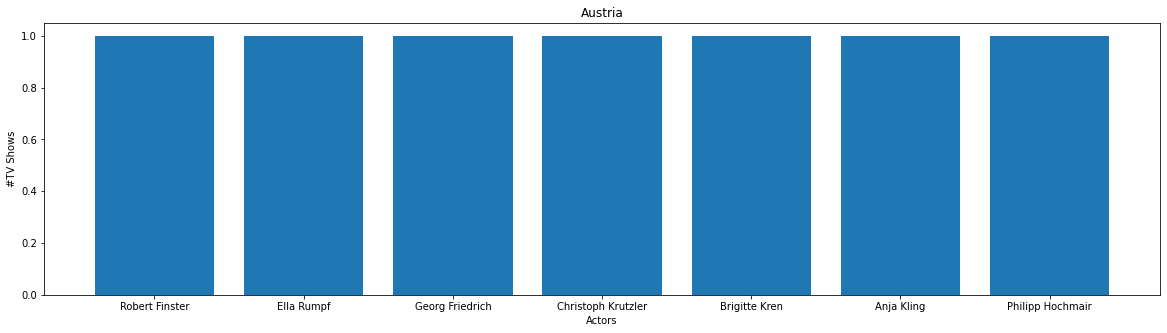

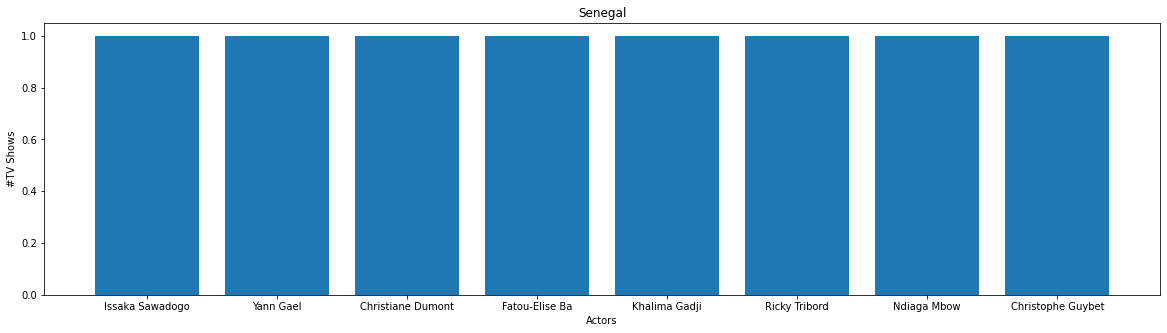

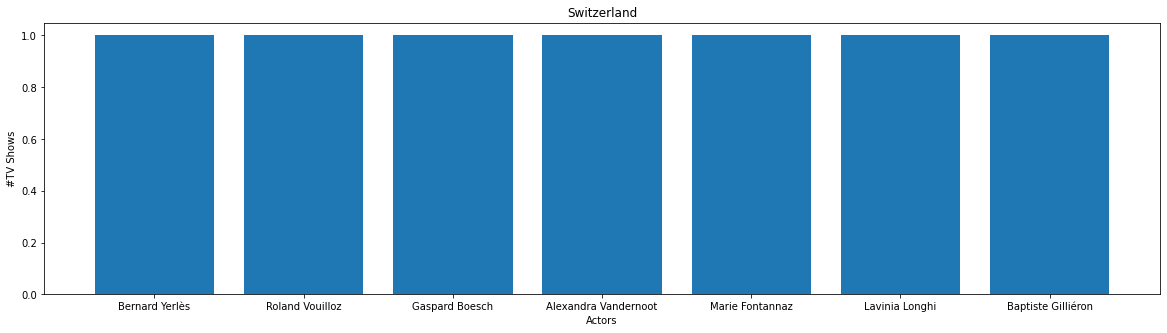

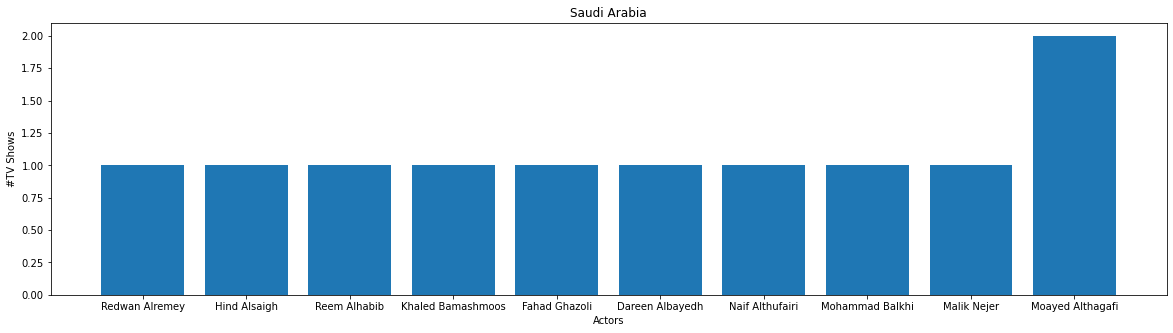

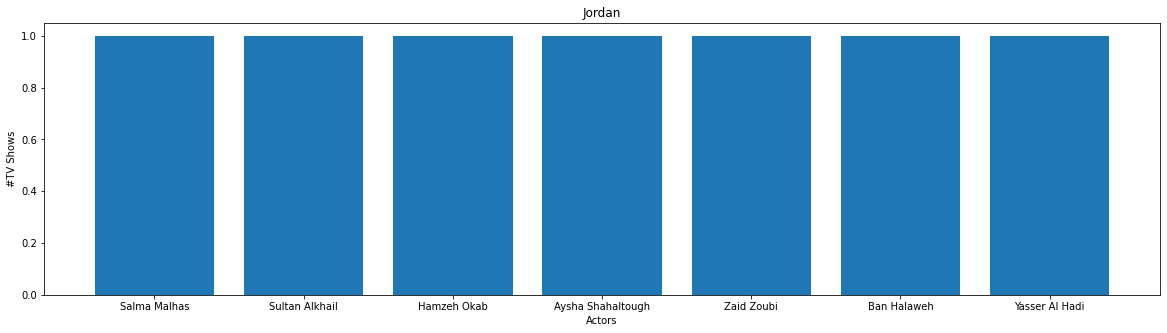

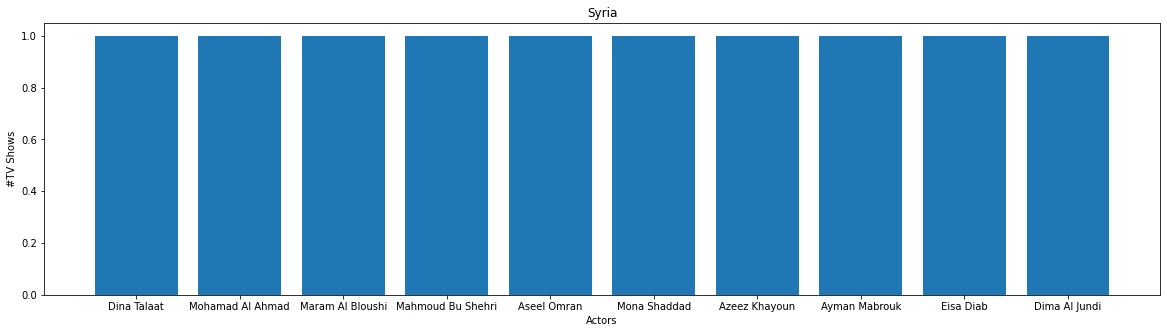

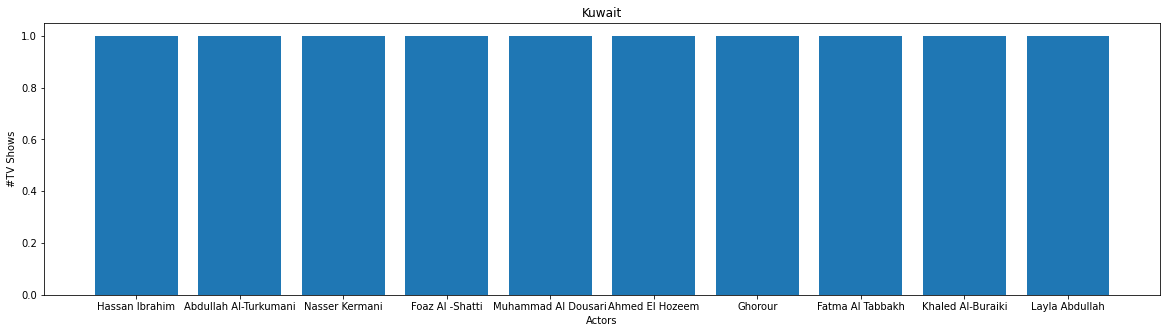

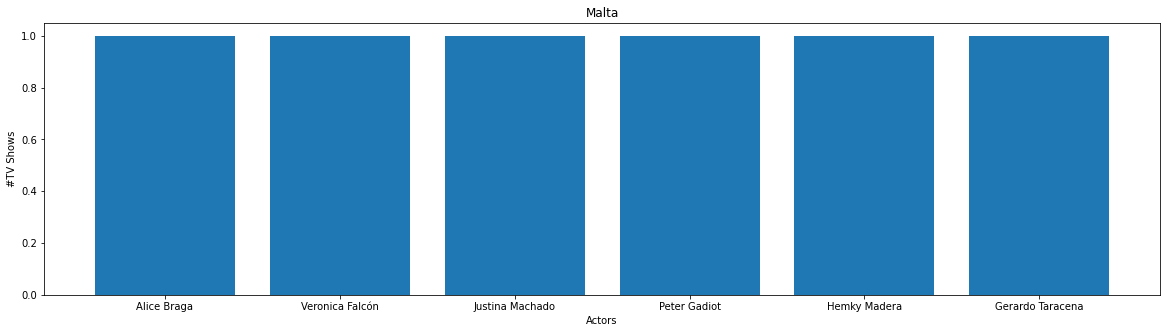

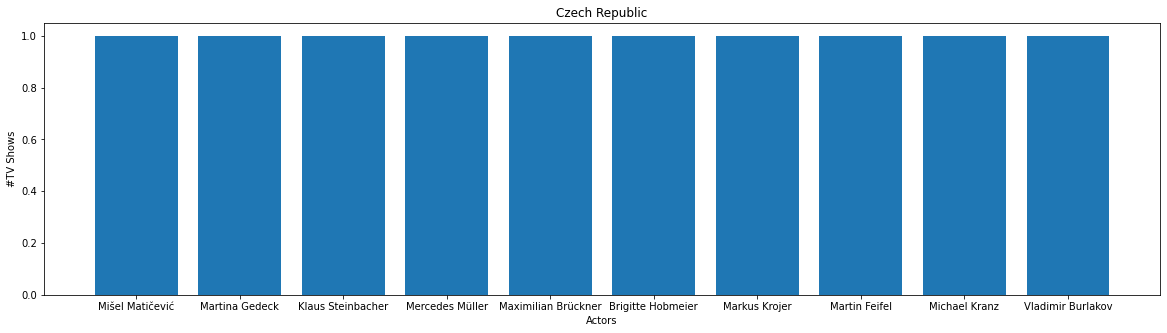

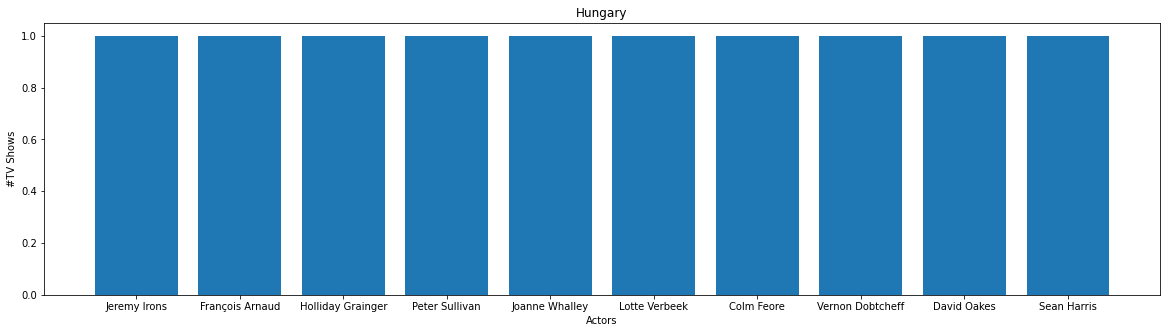

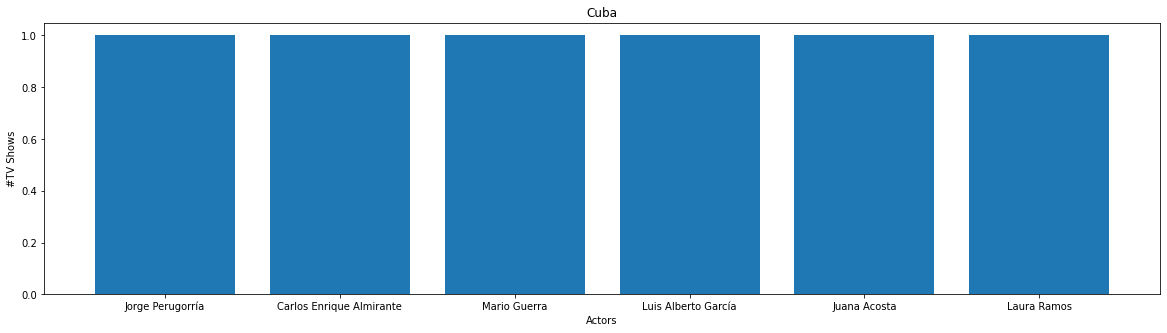

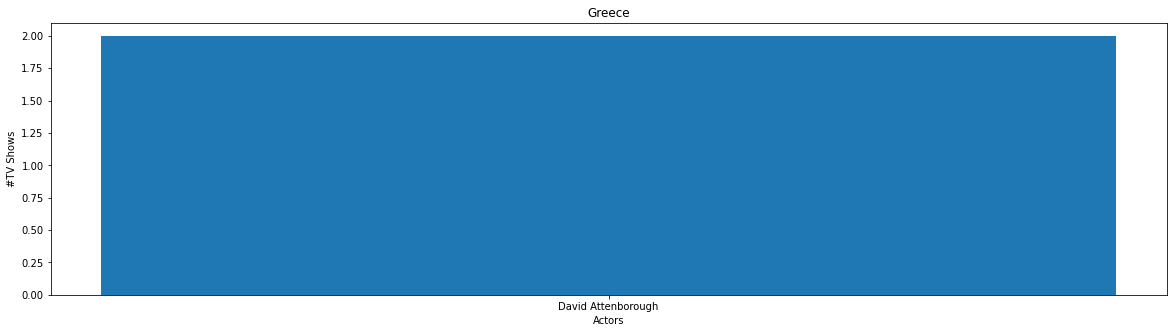

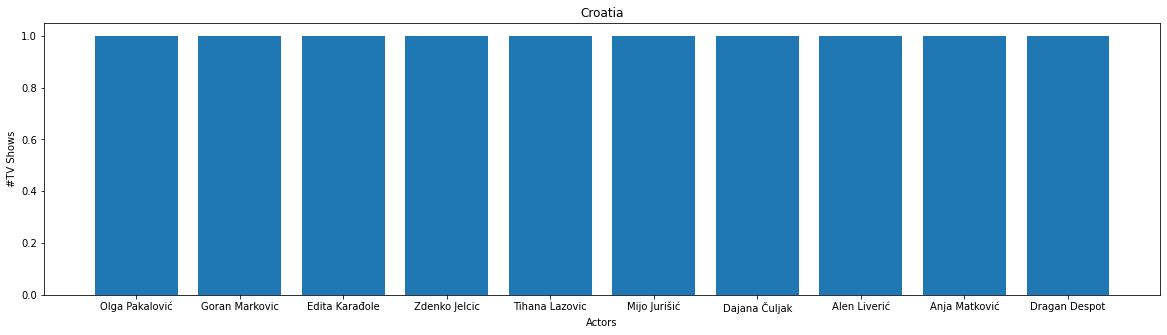

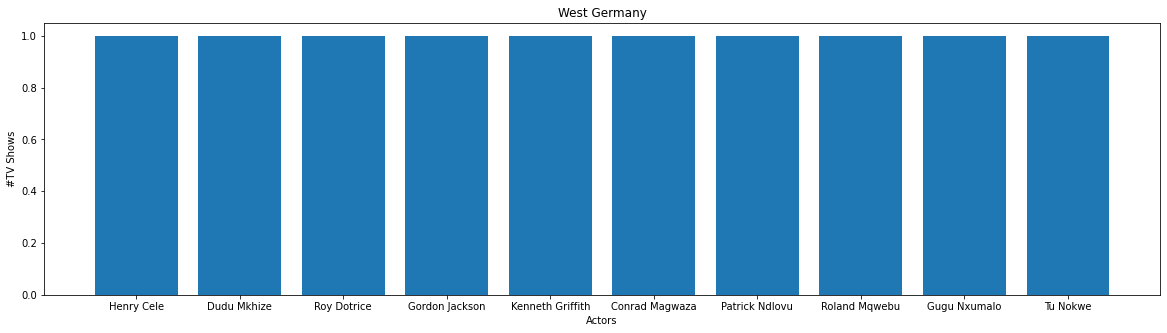

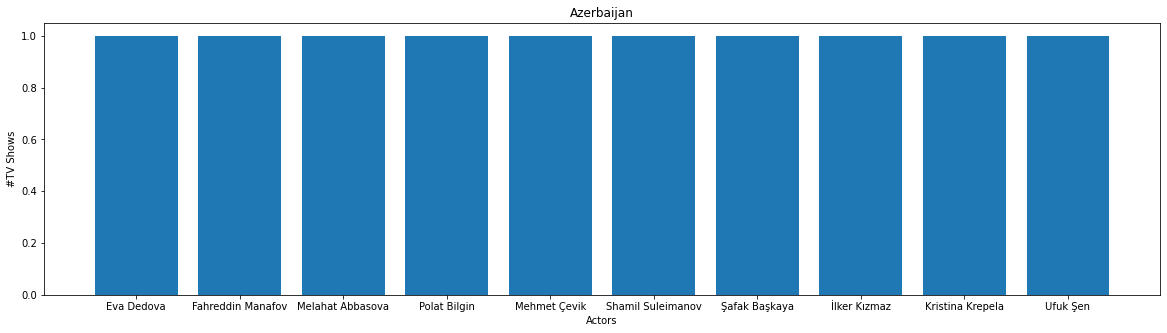

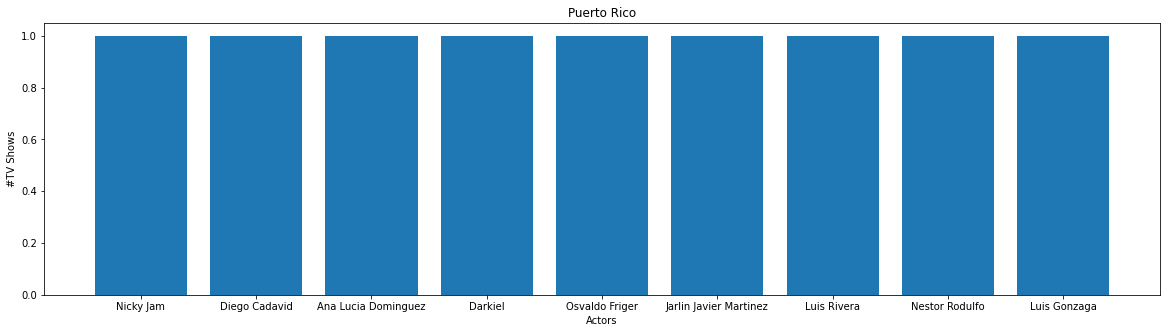

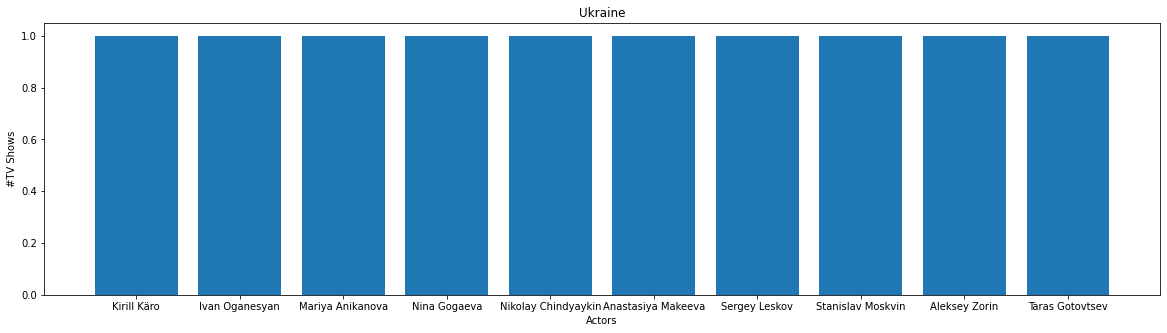

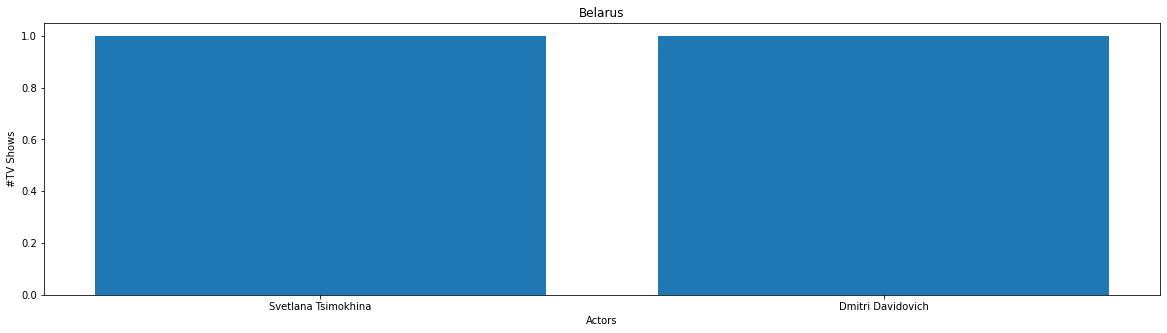

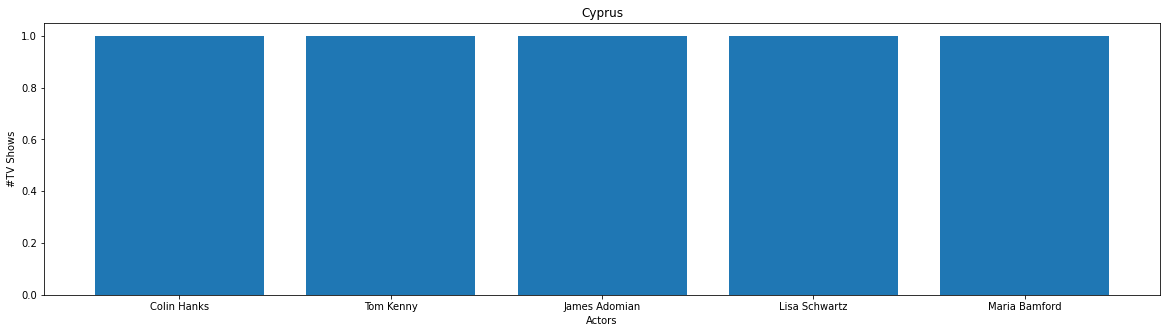

In [ ]:
for country in Dict.keys():
    sorted_tuples = sorted(Dict[country].items(), key=lambda x: x[1][1])
    #print(sorted_tuples)  # [(1, 1), (3, 4), (2, 9)]
    sorted_dict = {k: v for k, v in sorted_tuples}
    Dict[country] =  sorted_dict

for country in Dict.keys():
    a = []
    a = list(Dict[country].values())[-10:]
    #print(list(Dict[country].values())[-10:])
    variable = [x[1] for x in a]
    #print(variable)

    counter = 0
    for var in variable:
        if var != 0:
            counter += 1

    if counter == 0:
        continue

    ## plotting a bar chart
    f, ax = plt.subplots(figsize=(20,5)) # set the size that you'd like (width, height)

    plt.bar(list(Dict[country].keys())[-counter:], variable[-counter:])
    #print(list(Dict[country].keys())[-10:])

    # x-axis label
    plt.xlabel('Actors')
    # frequency label
    plt.ylabel('#TV Shows')
    plt.title(country)
    plt.show()

**1.6 We will find if netflix has sufficient content for every age group**

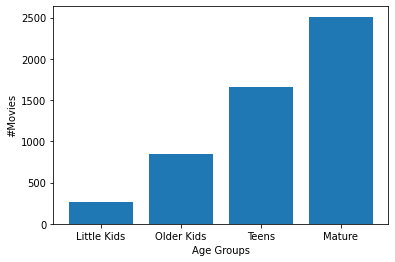

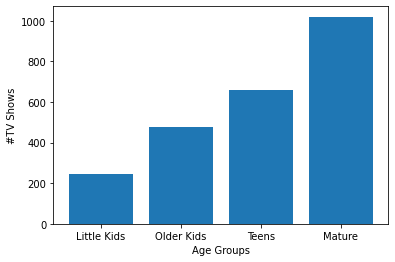

In [ ]:
import numpy
ages_counter_shows = numpy.array([0, 0, 0, 0])
ages_counter_movies = numpy.array([0, 0, 0, 0])

inputfile = csv.reader(open('netflix_titles.csv', encoding="utf8"))
for row in inputfile:#row 8 is for age group
#every if is every age group
    if row[8] == "G" or row[8] == "TV-Y" or row[8] == "TV-G":
        if row[1] == "Movie":
            ages_counter_movies[0] += 1
        elif row[1] == "TV Show":
            ages_counter_shows[0] += 1
        
    elif row[8] == "PG" or row[8] == "TV-Y7" or row[8] == "TV-Y7-FV" or row[8] == "TV-PG":
        if row[1] == "Movie":
            ages_counter_movies[1] += 1
        elif row[1] == "TV Show":
            ages_counter_shows[1] += 1

    elif row[8] == "PG-13" or row[8] == "TV-14":
        if row[1] == "Movie":
            ages_counter_movies[2] += 1
        elif row[1] == "TV Show":
            ages_counter_shows[2] += 1

    elif row[8] == "R" or row[8] == "NC-17" or row[8] == "TV-MA":
        if row[1] == "Movie":
            ages_counter_movies[3] += 1
        elif row[1] == "TV Show":
            ages_counter_shows[3] += 1

ages = ["Little Kids", "Older Kids", "Teens", "Mature"]

plt.bar(ages, ages_counter_movies)

# x-axis label
plt.xlabel('Age Groups')
# frequency label
plt.ylabel('#Movies')
plt.show()

plt.bar(ages, ages_counter_shows)

# x-axis label
plt.xlabel('Age Groups')
# frequency label
plt.ylabel('#TV Shows')
plt.show()

Παρατηρουμε πως το netflix δεν εχει πλουσιο περιεχομενο για ολες τις ηλικιες

**1.7 Graph for the number of movies that netflix adds each month**

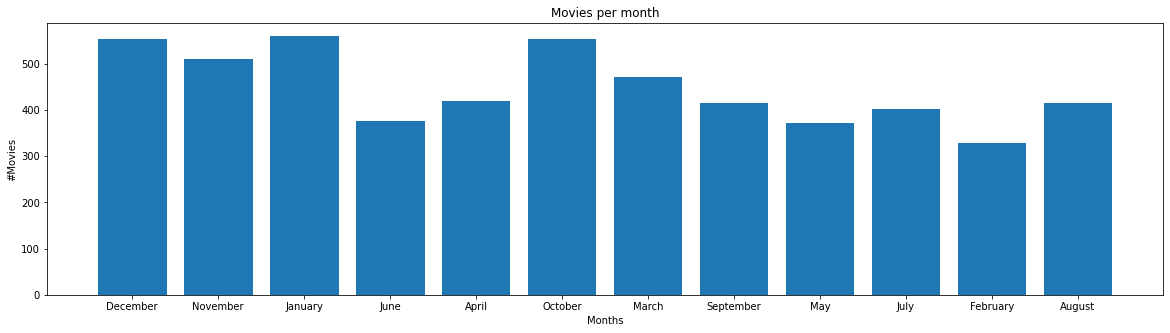

Month recommended: February


In [ ]:
inputfile = csv.reader(open('netflix_titles.csv', encoding="utf8"))
months = {}#create dict with each month as key
for row in inputfile:
    month = row[6].split(" ")[0]
    if not month or row[1] == "TV Show" or month == "date_added":
        continue
    if month not in months.keys():
        months[month] = 1
    else:
        months[month] += 1

## plotting a bar chart
f, ax = plt.subplots(figsize=(20,5)) # set the size that you'd like (width, height)

plt.bar(months.keys(), months.values())

# x-axis label
plt.xlabel('Months')
# frequency label
plt.ylabel('#Movies')
plt.title('Movies per month')
plt.show()

print("Month recommended: " + min(months.keys(), key=(lambda k: months[k])))

**1.8 Find the genres that movies and tv shows are listed in netflix , and present it in a graph**

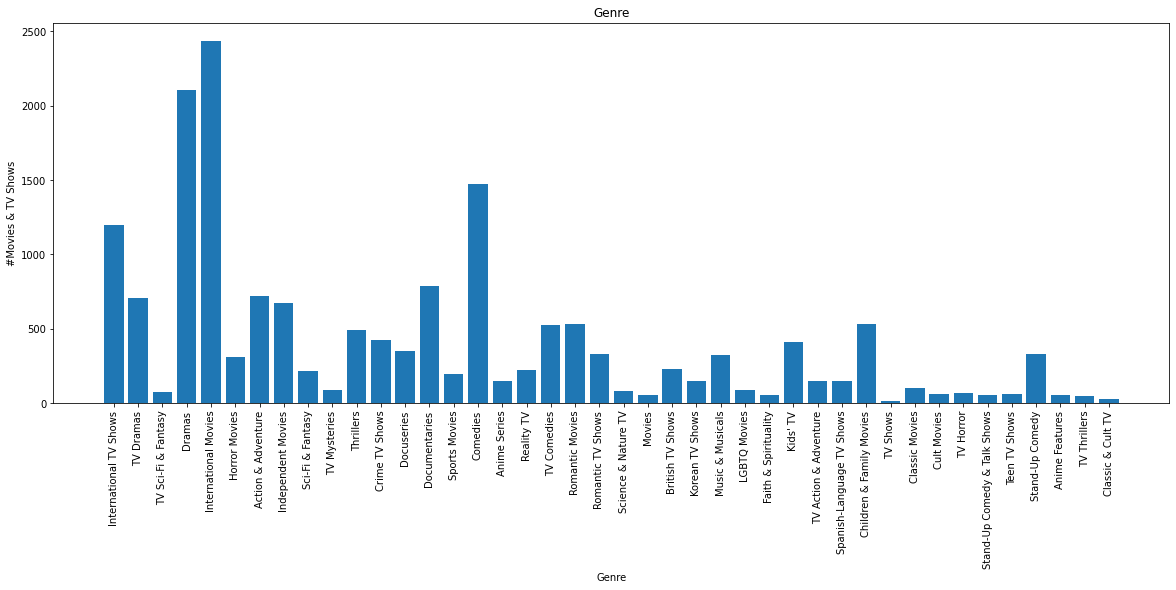

In [ ]:
inputfile = csv.reader(open('netflix_titles.csv', encoding="utf8"))
Genre = {}#keys of this dict are genres and values are the counters for each of them
for row in inputfile:
    listed_in = row[10].split(", ")
    for genre in listed_in:
        if(',' in genre):
            genre = genre.replace(',', '')
        if not genre or genre == "listed_in":
            continue
        if genre not in Genre.keys():
            Genre[genre] = 1
        else:
            Genre[genre] += 1

## plotting a bar chart
f, ax = plt.subplots(figsize=(20,7)) # set the size that you'd like (width, height)

plt.bar(Genre.keys(), Genre.values())
plt.xticks(rotation=90)

# x-axis label
plt.xlabel('Genre')
# frequency label
plt.ylabel('#Movies & TV Shows')
plt.title('Genre')
plt.show()

**1.9 Finding directors for every country and presenting them in graphs**

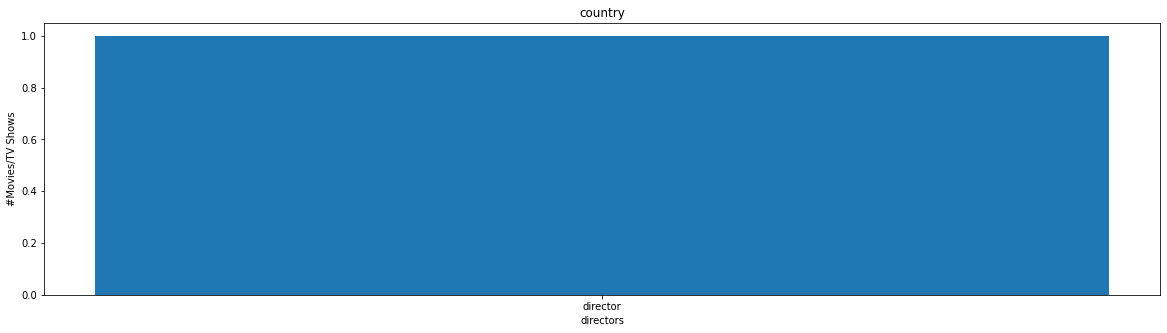

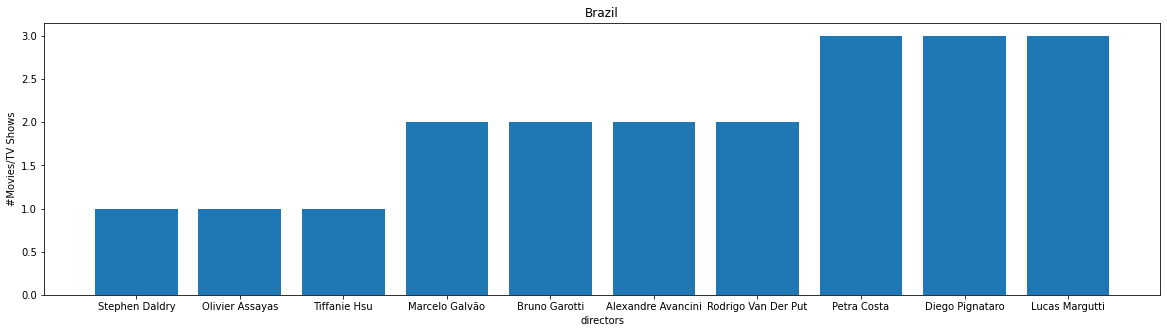

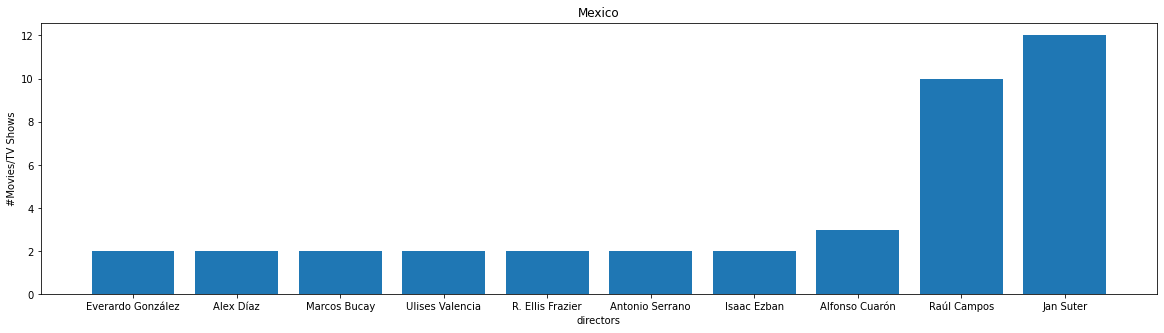

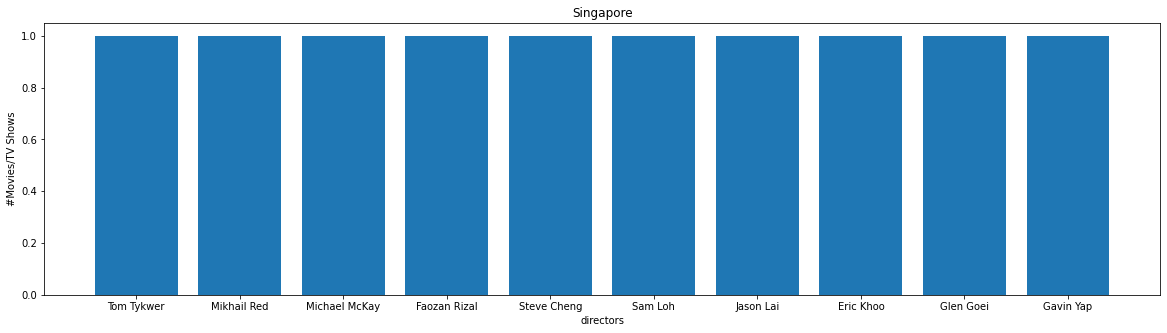

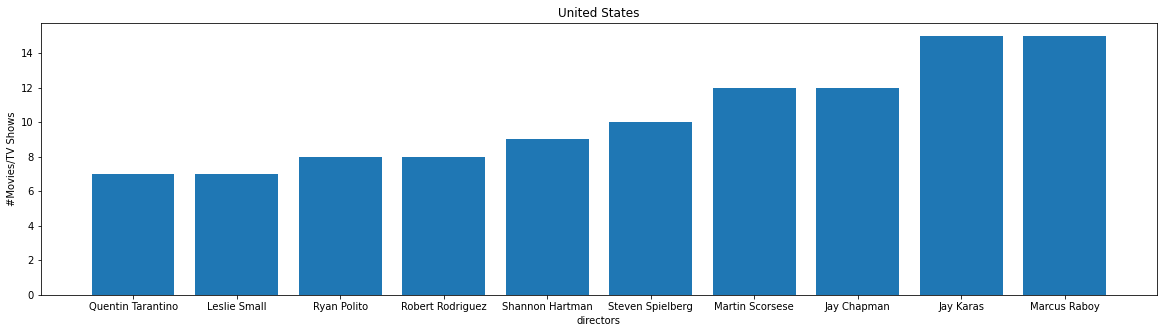

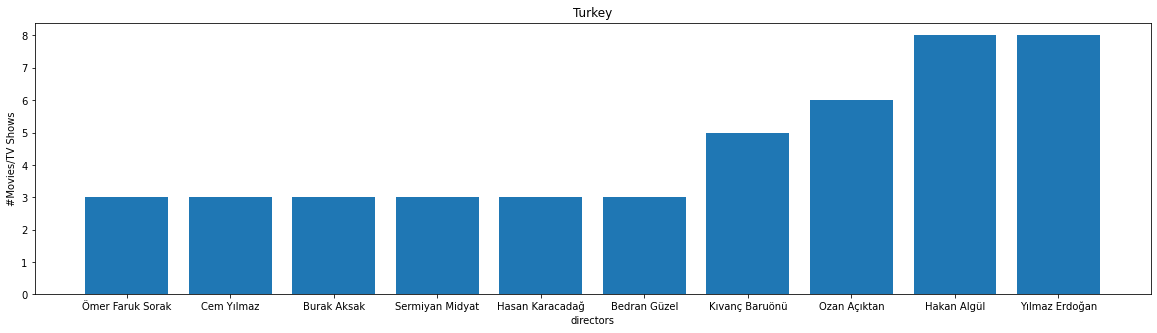

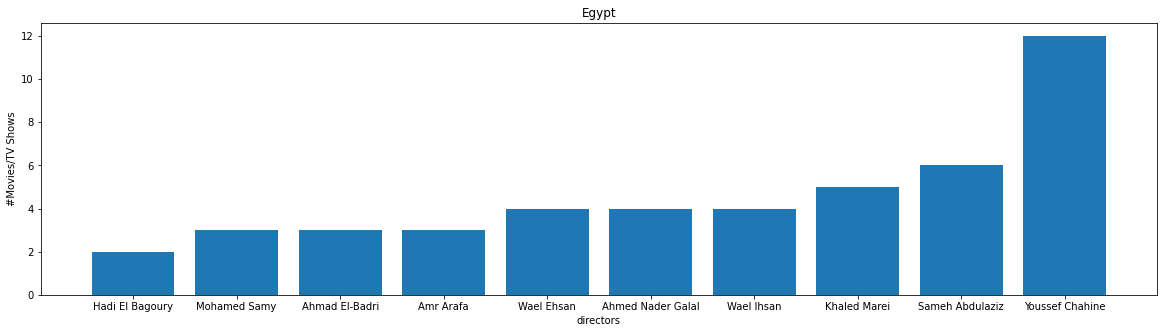

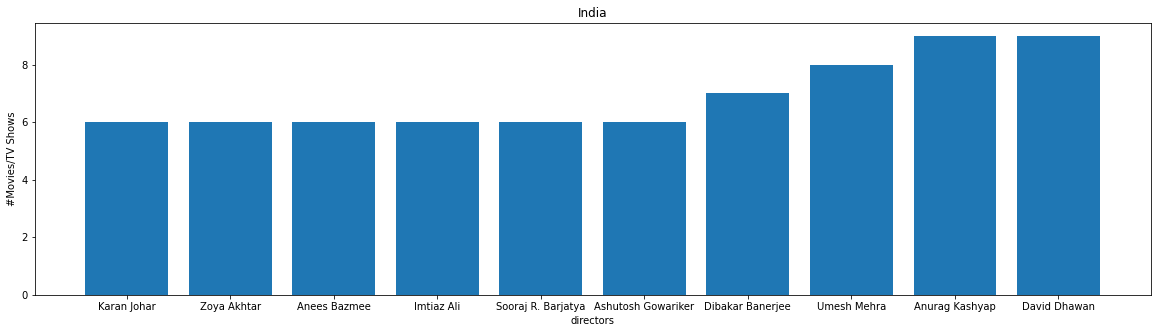

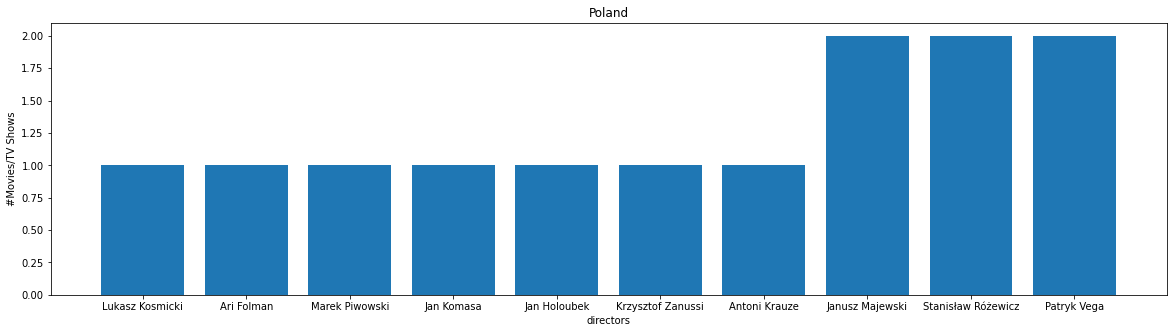

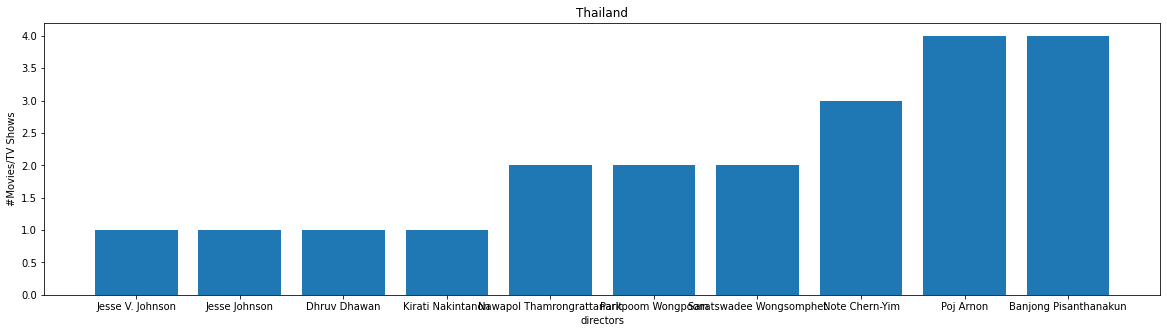

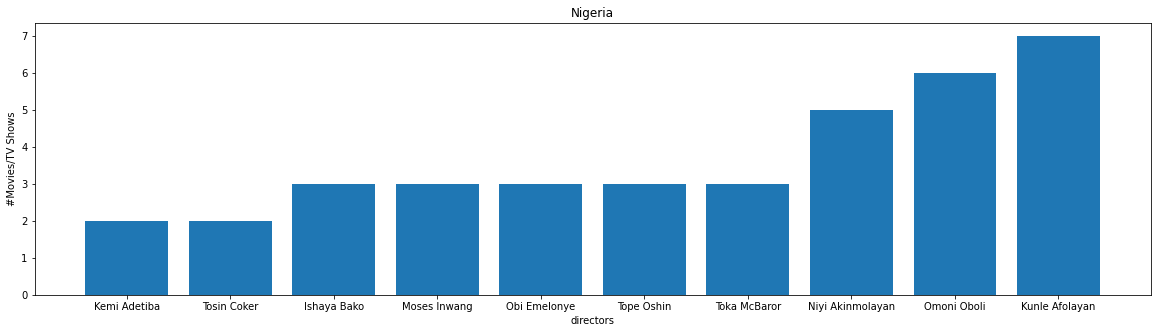

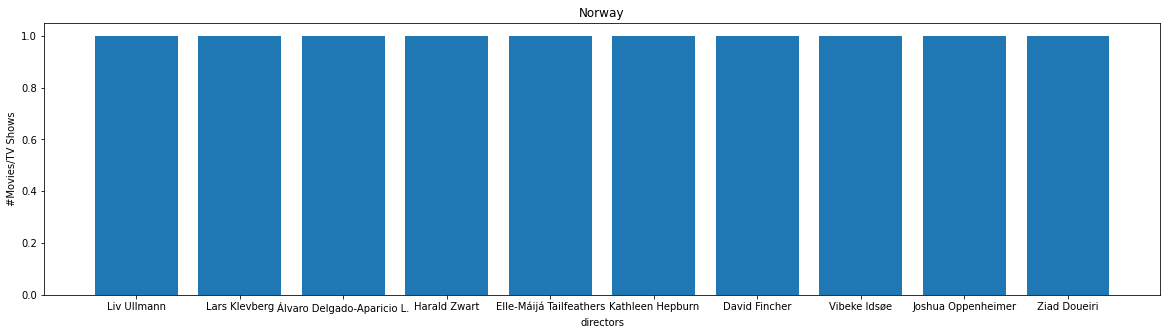

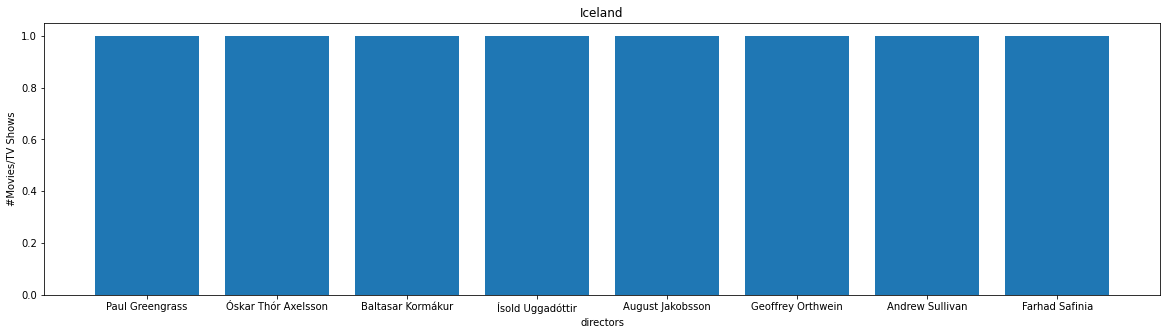

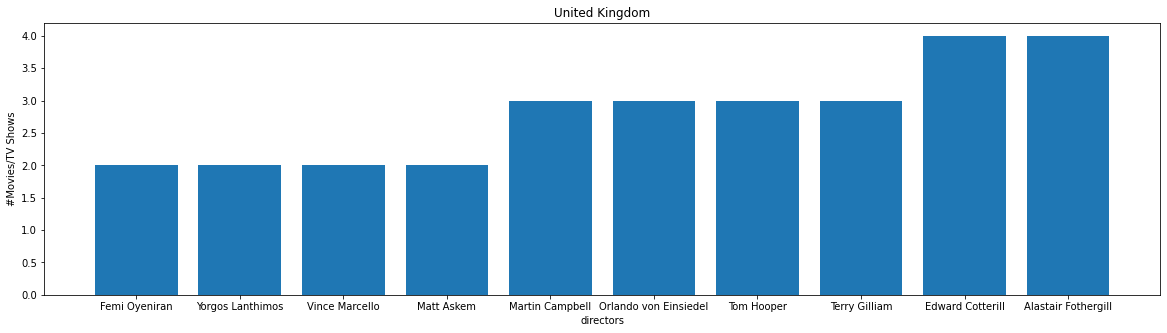

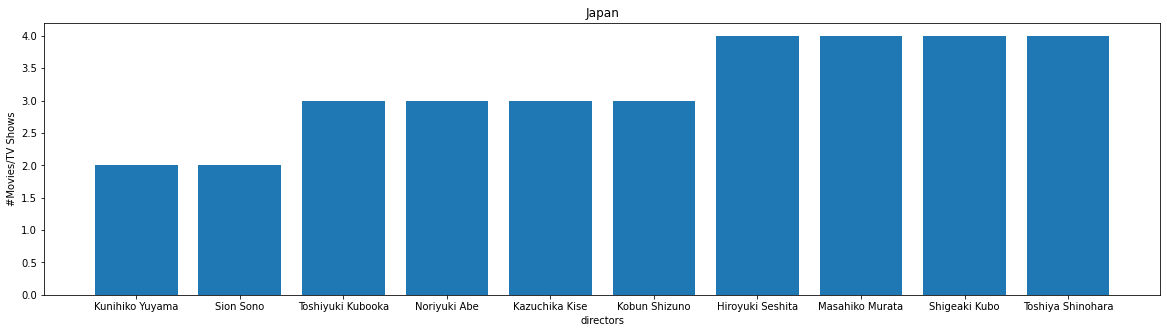

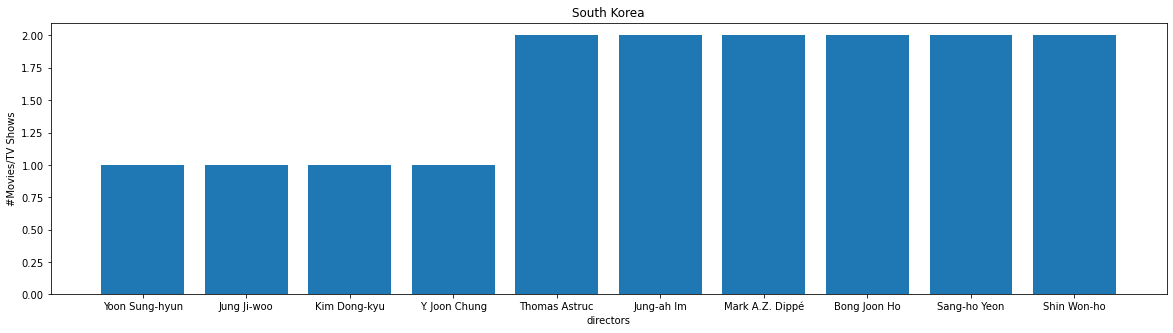

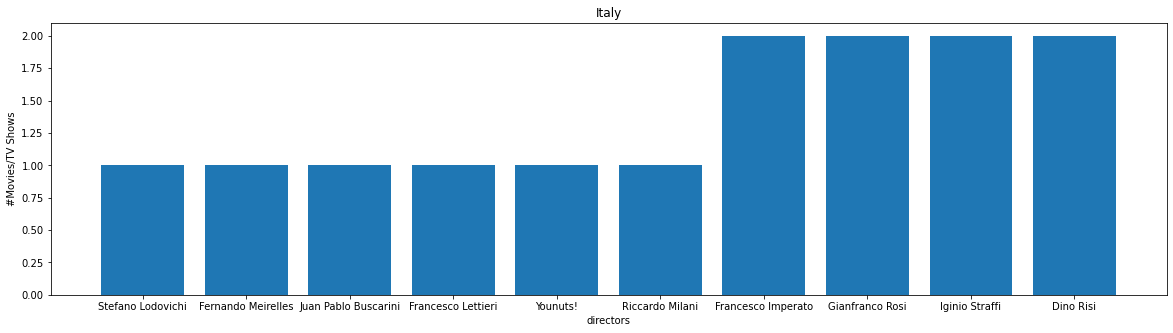

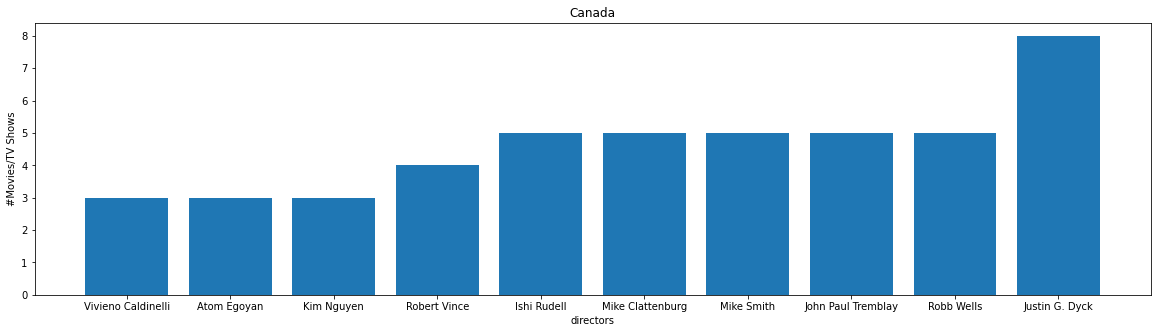

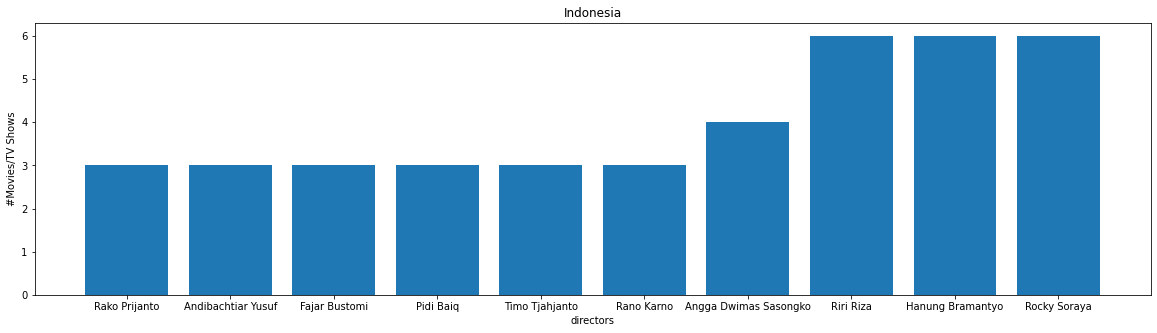

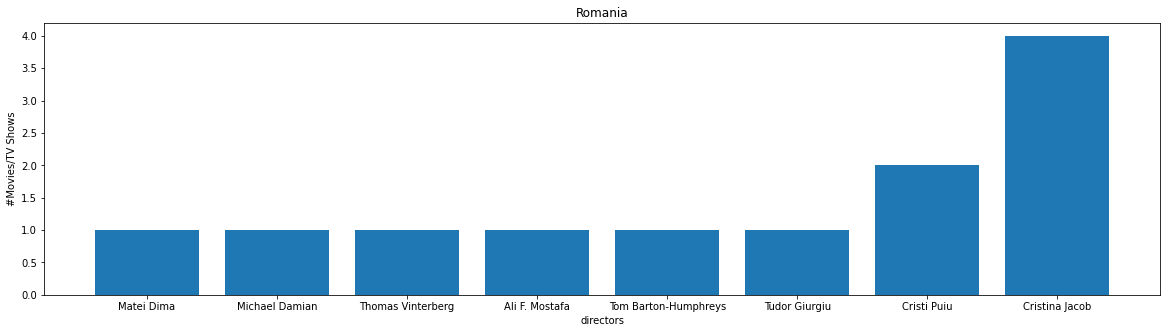

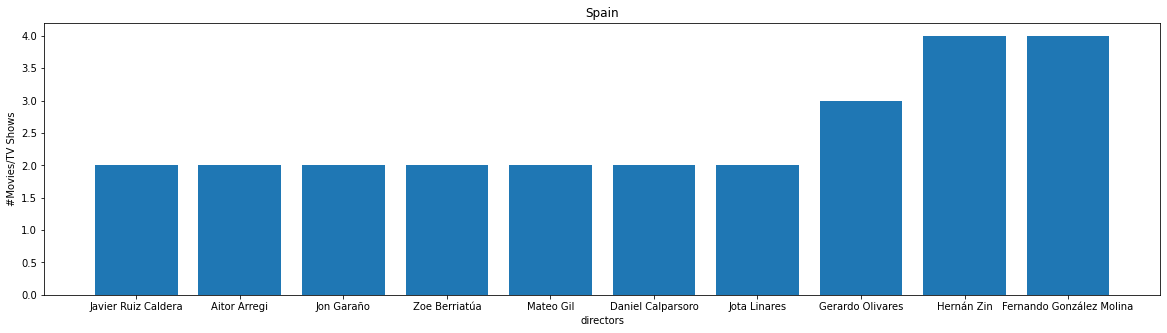

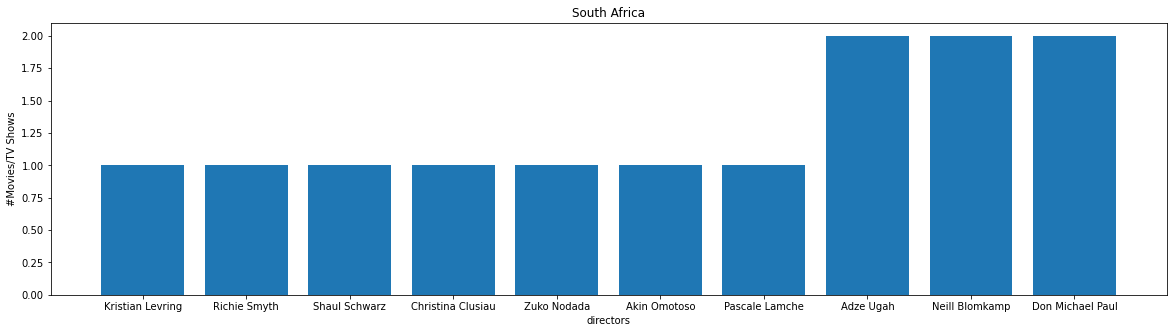

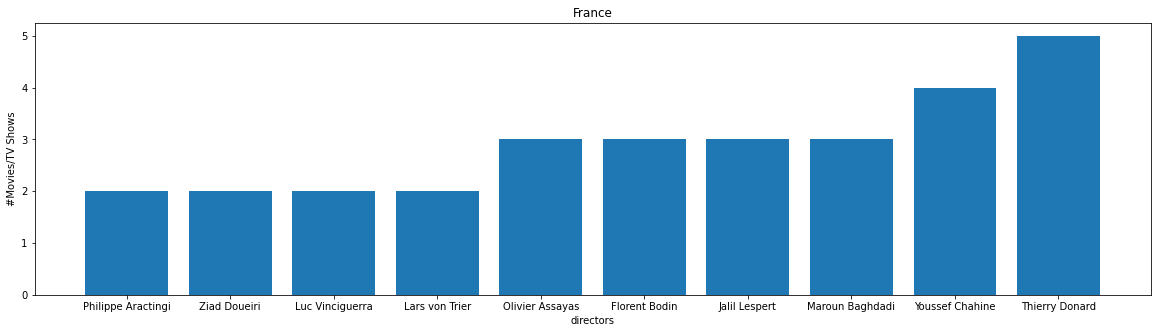

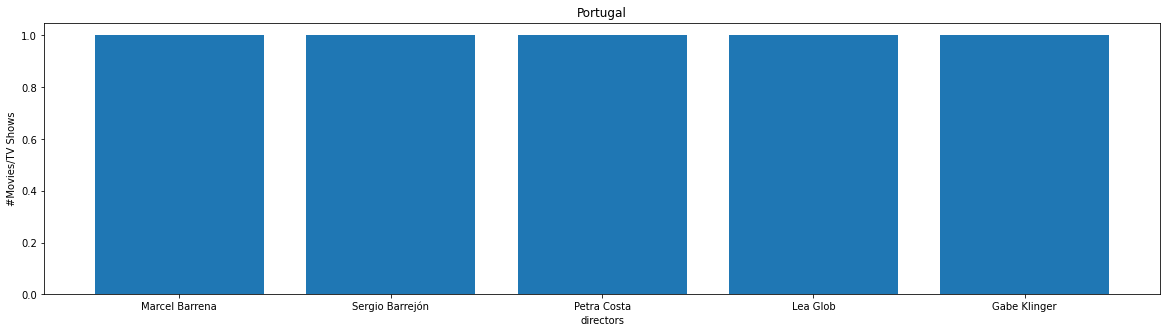

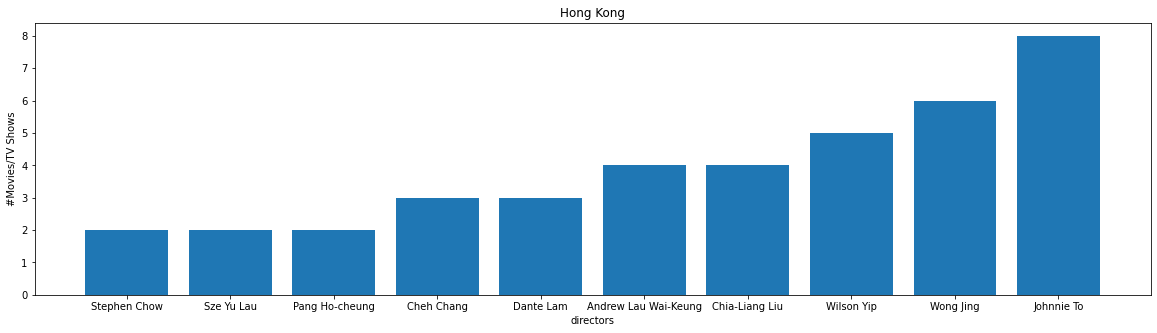

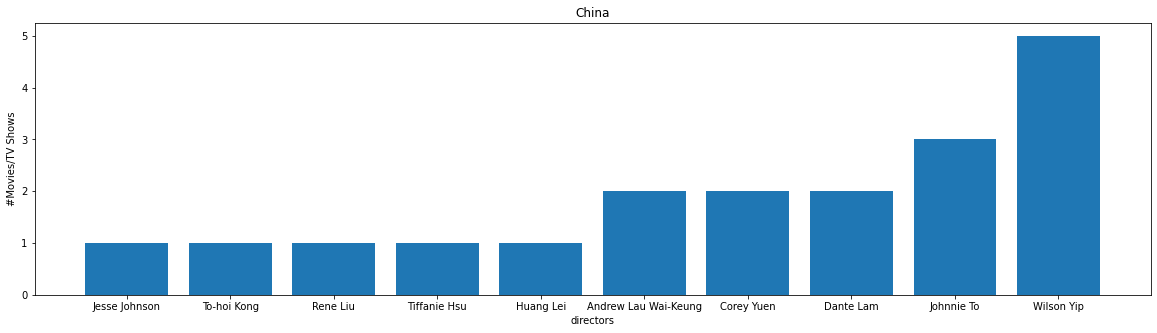

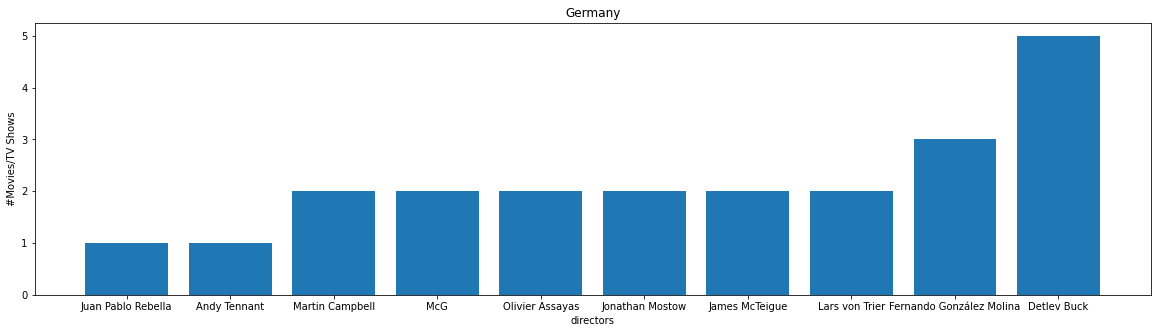

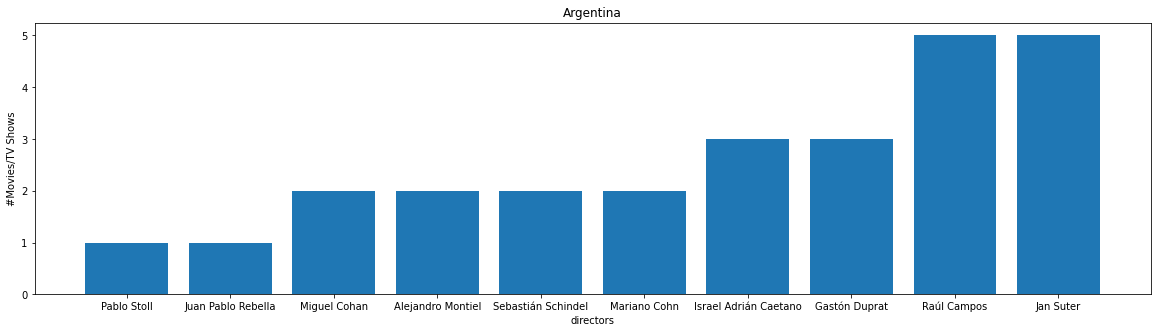

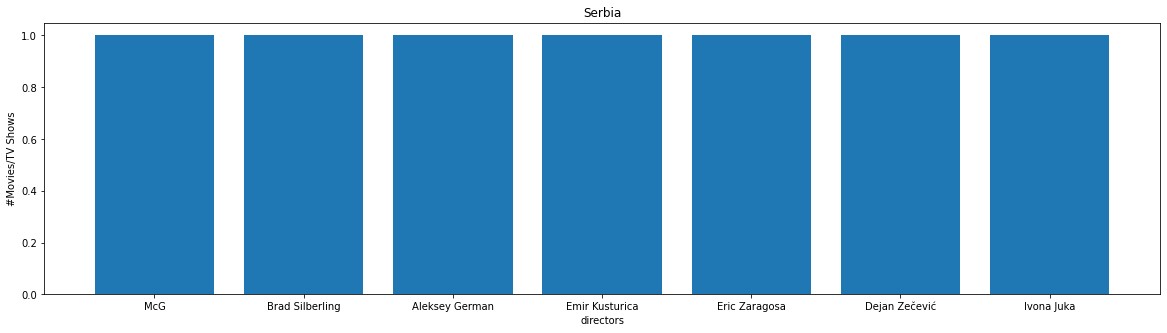

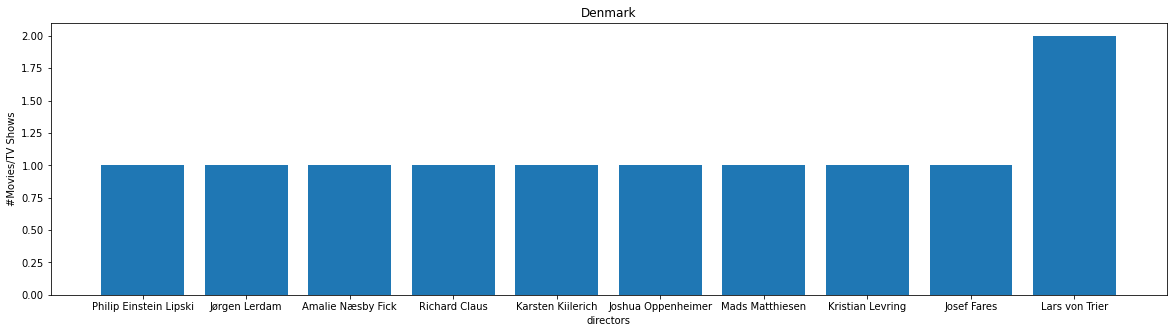

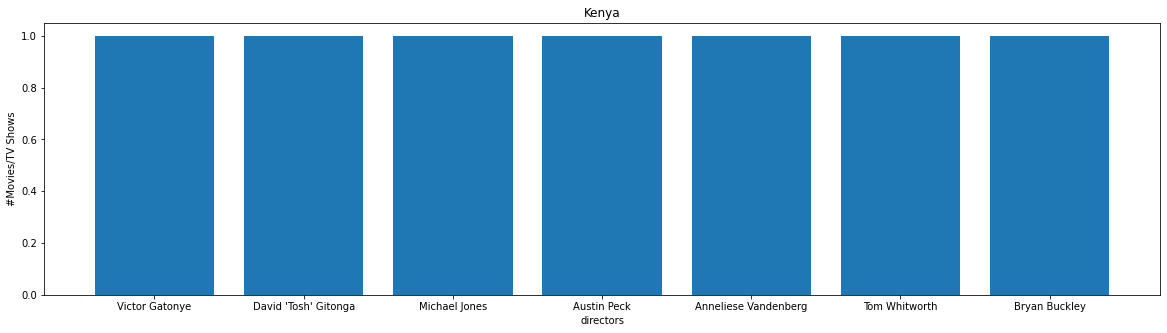

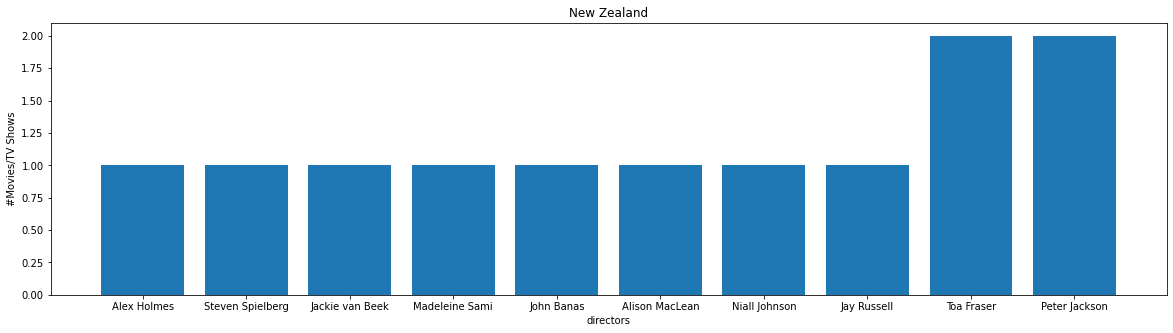

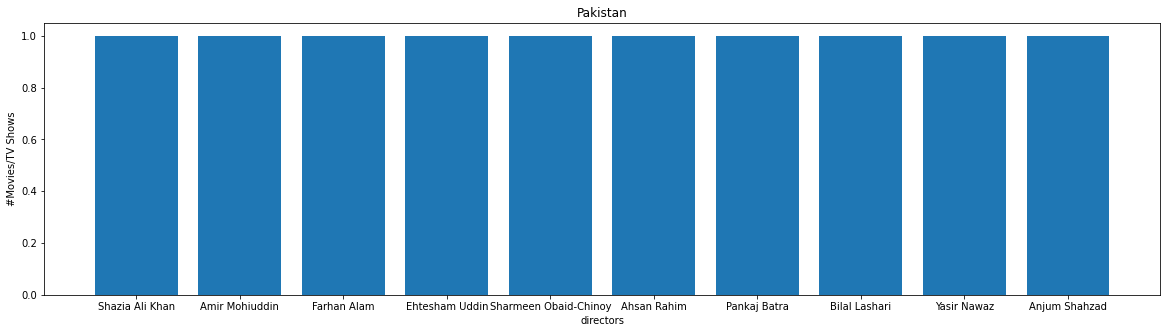

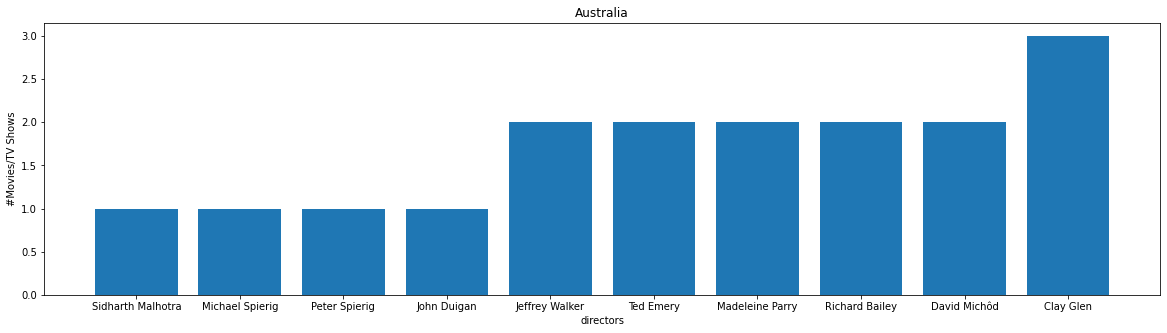

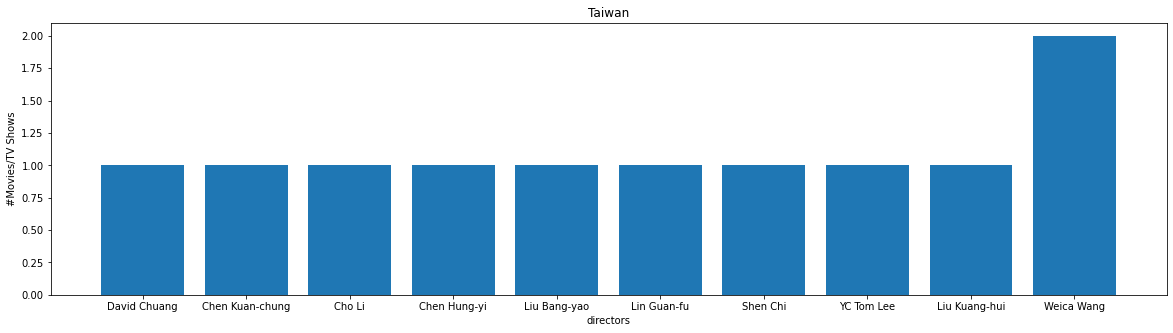

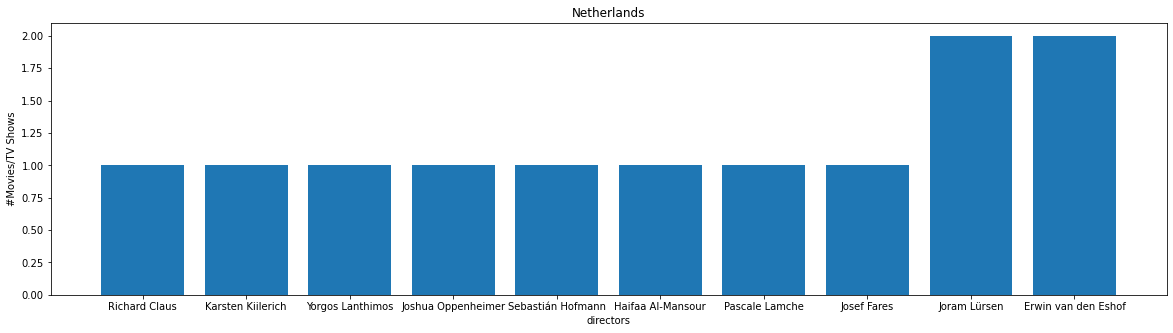

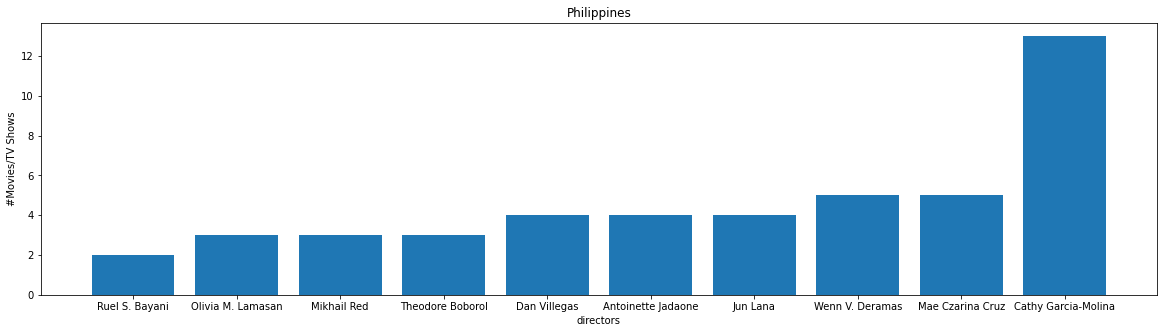

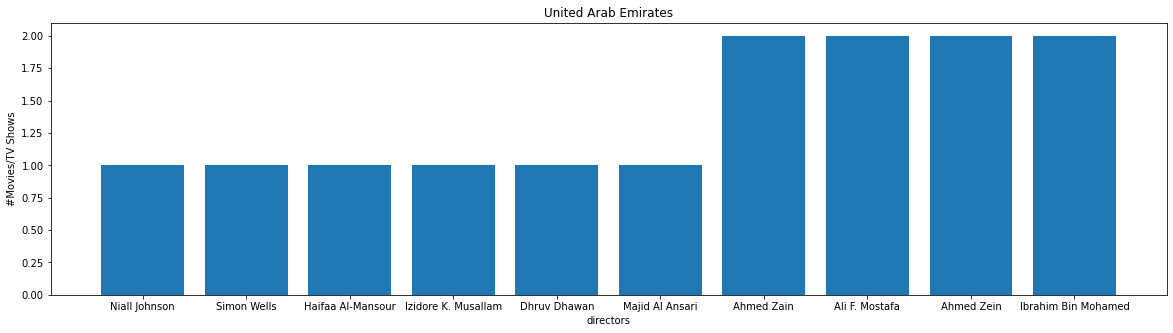

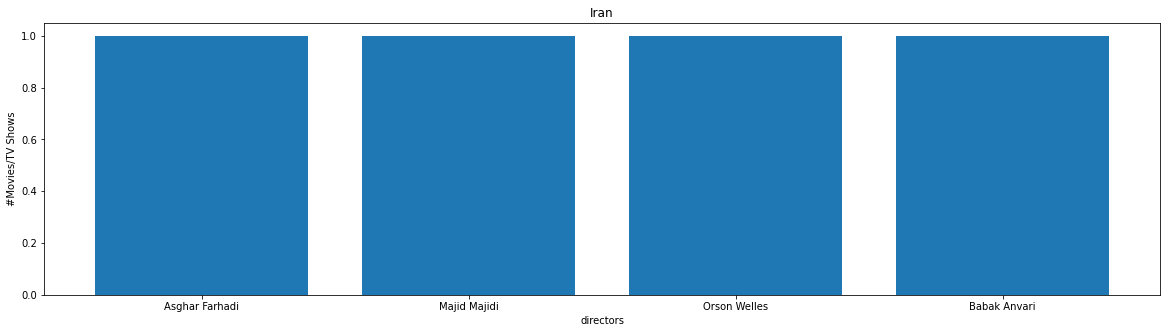

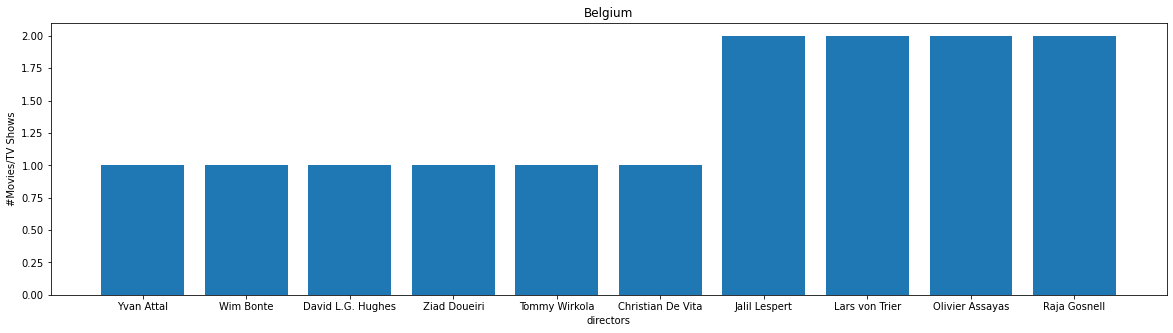

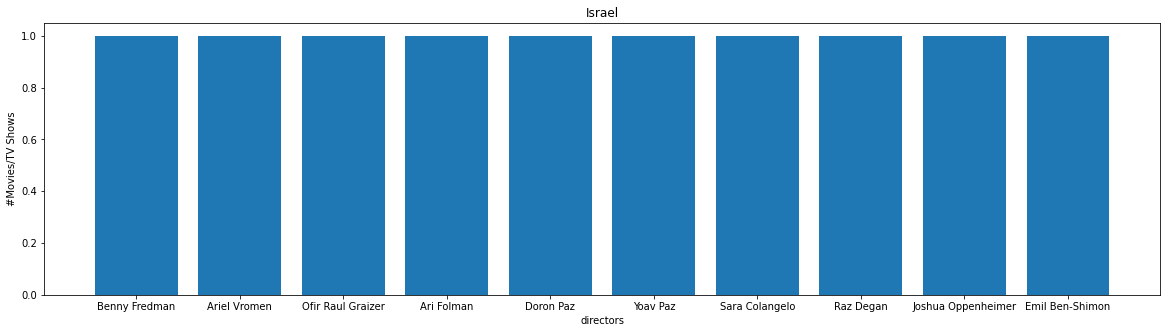

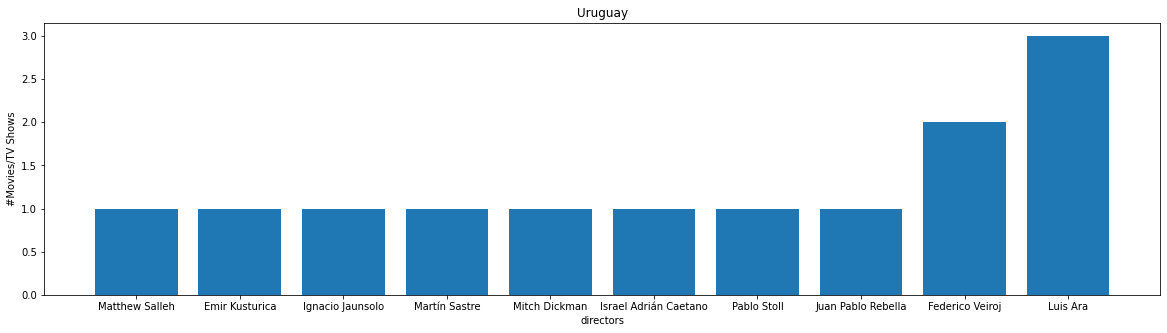

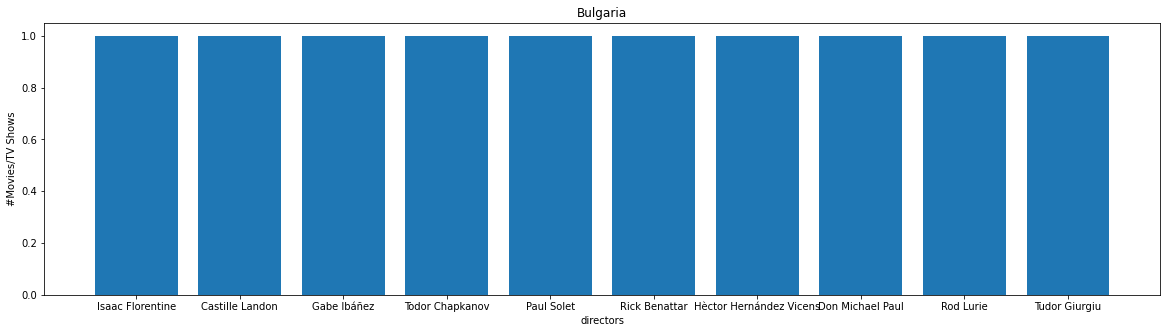

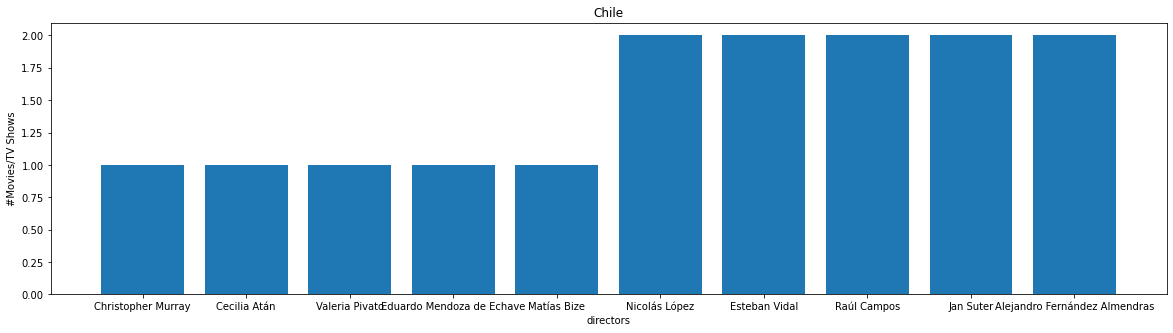

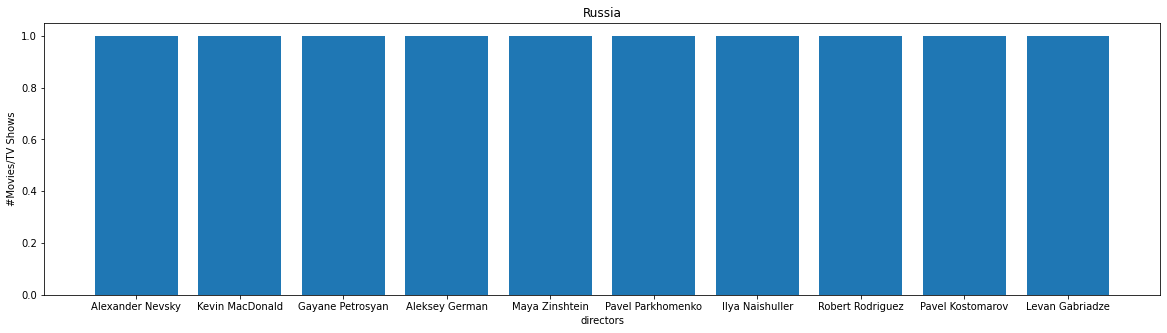

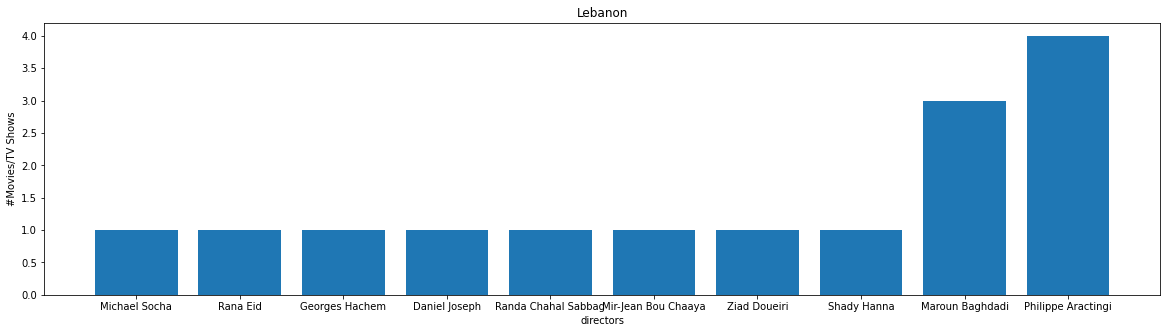

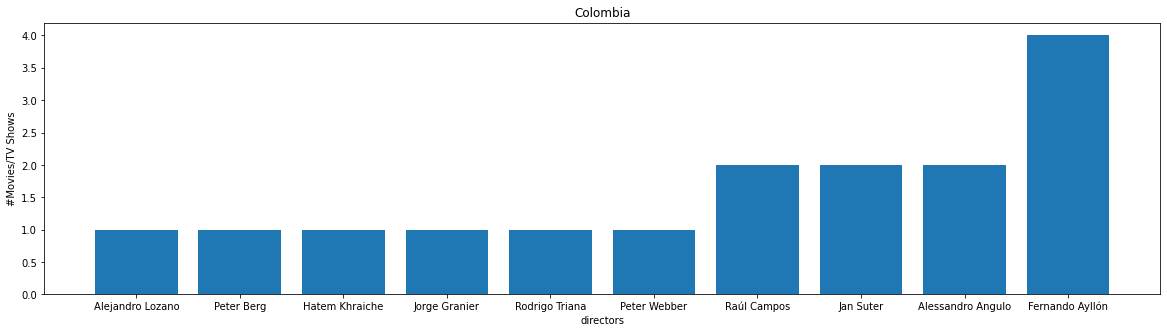

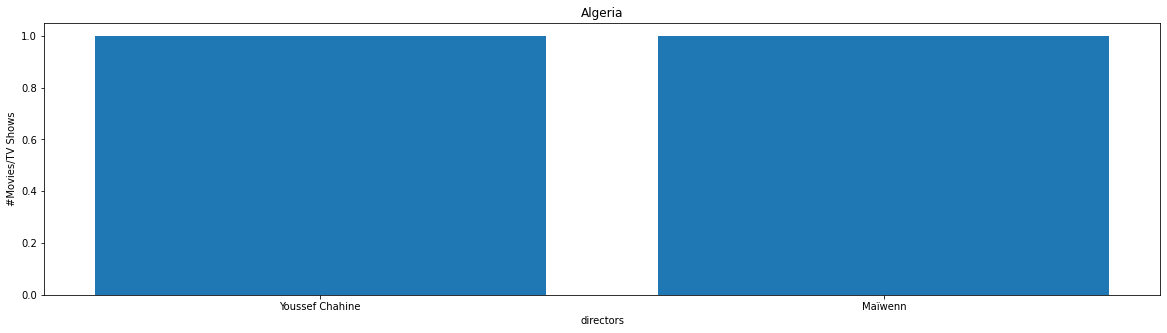

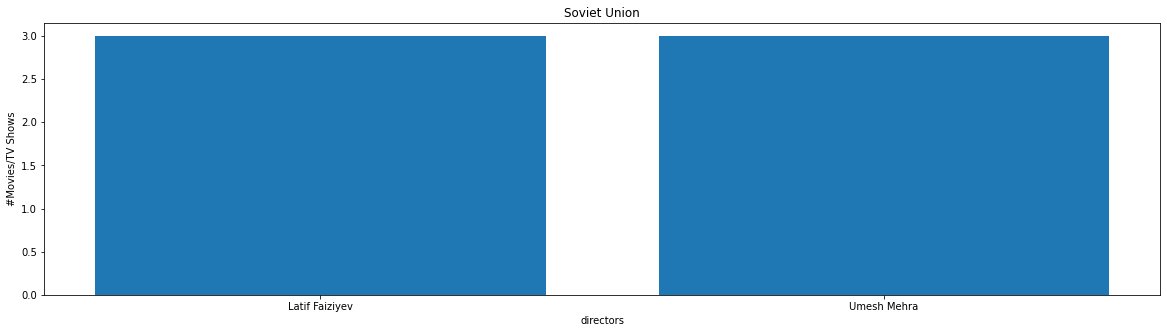

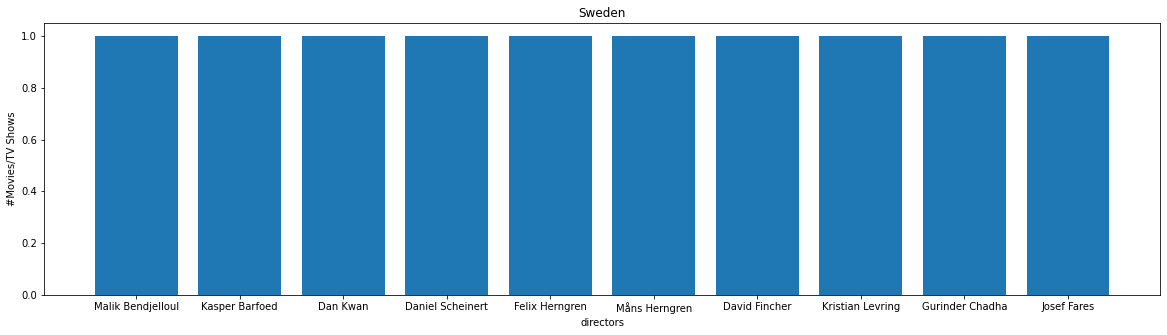

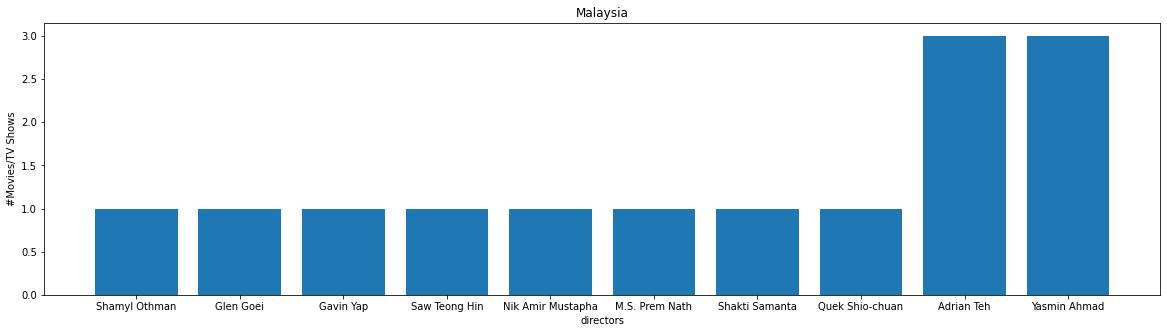

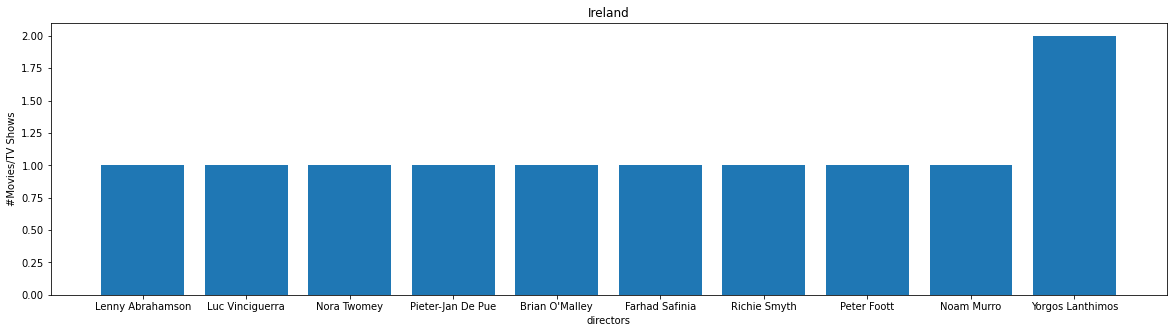

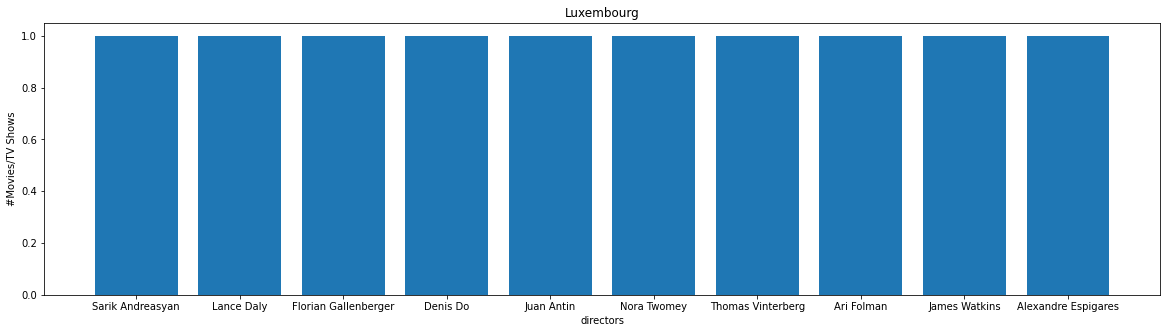

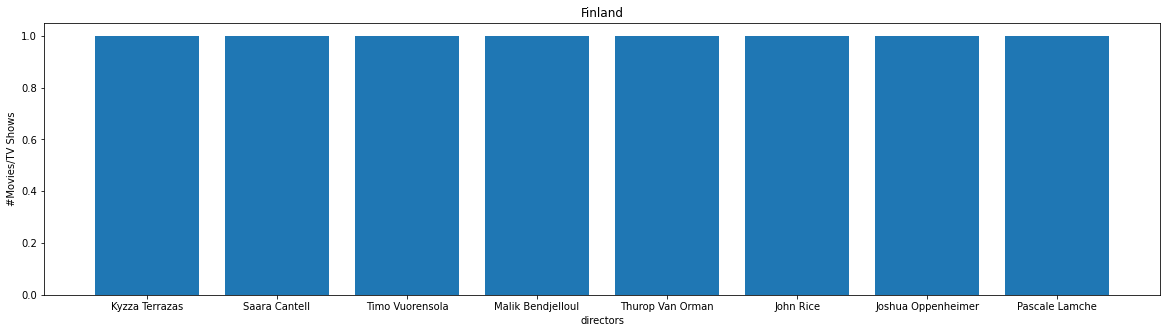

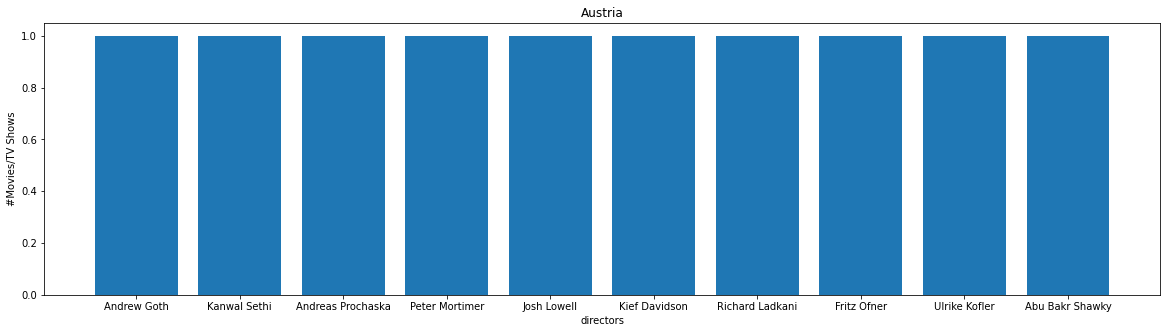

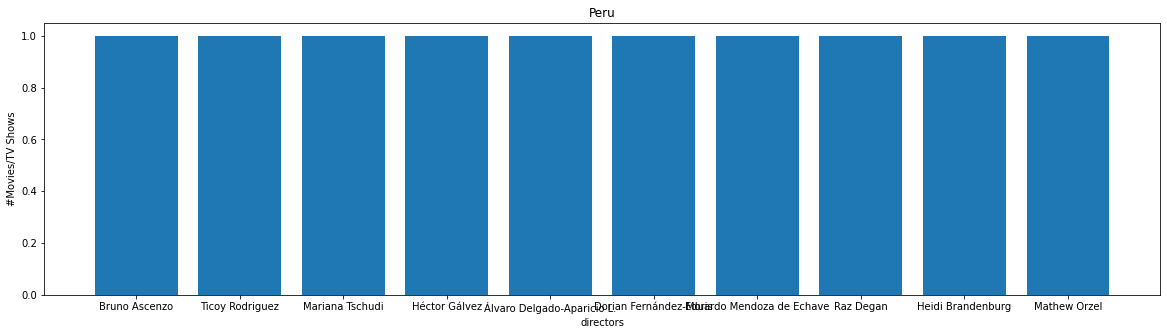

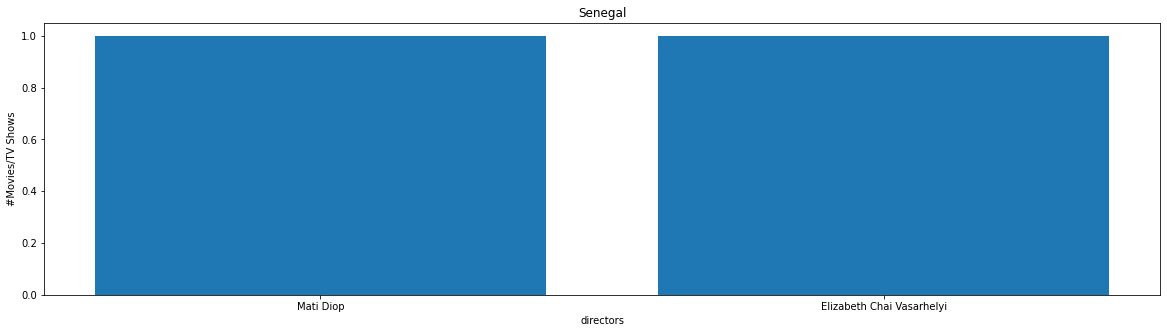

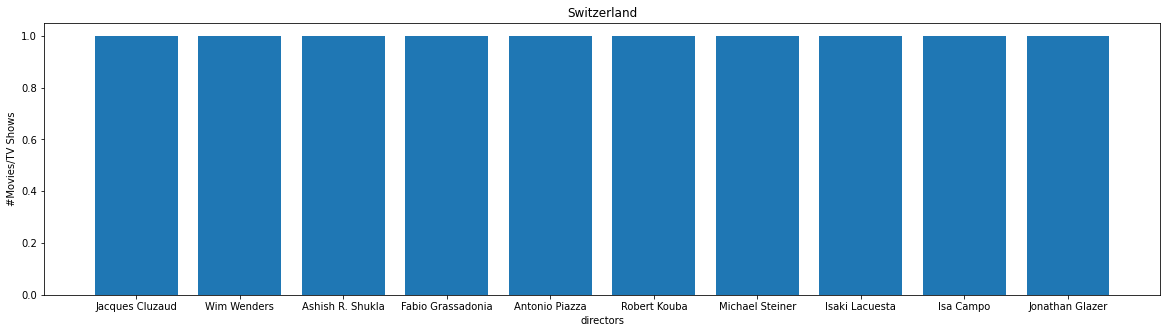

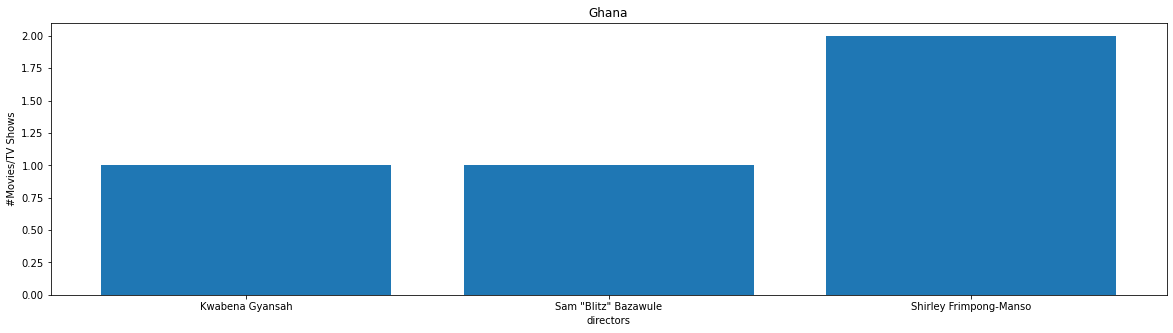

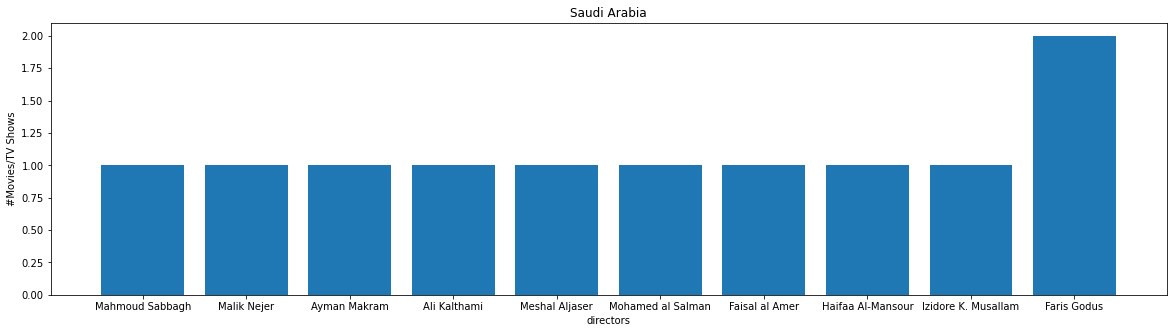

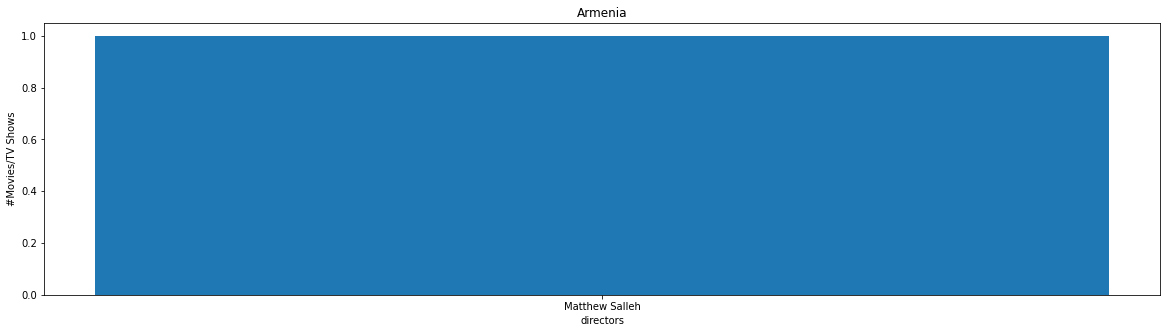

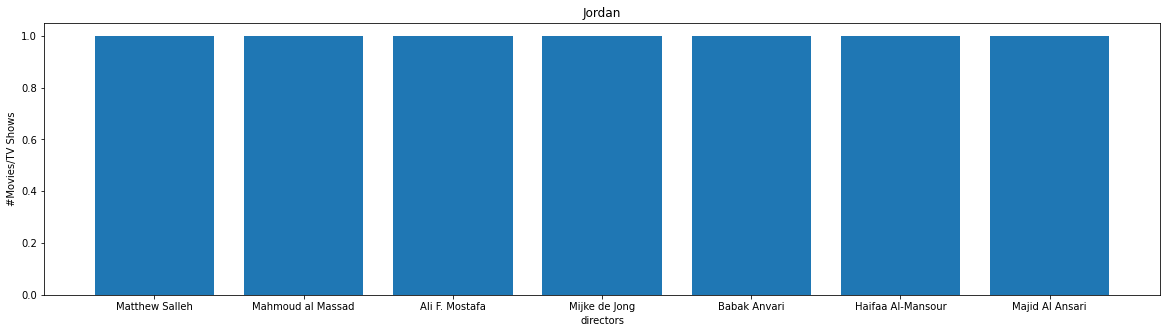

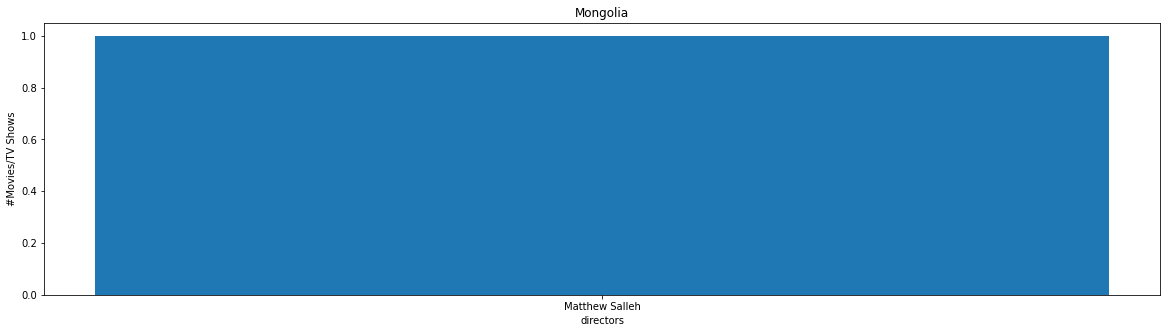

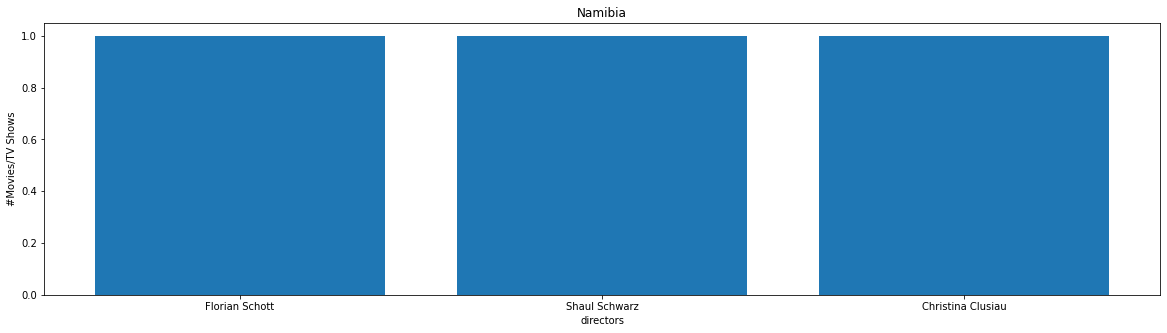

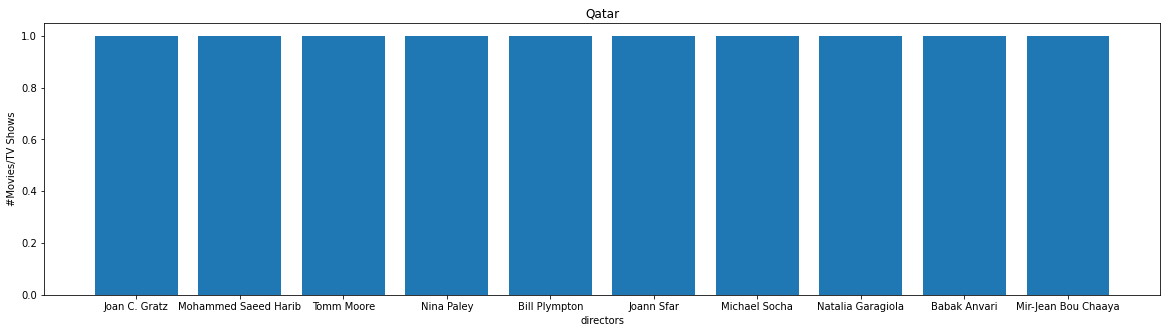

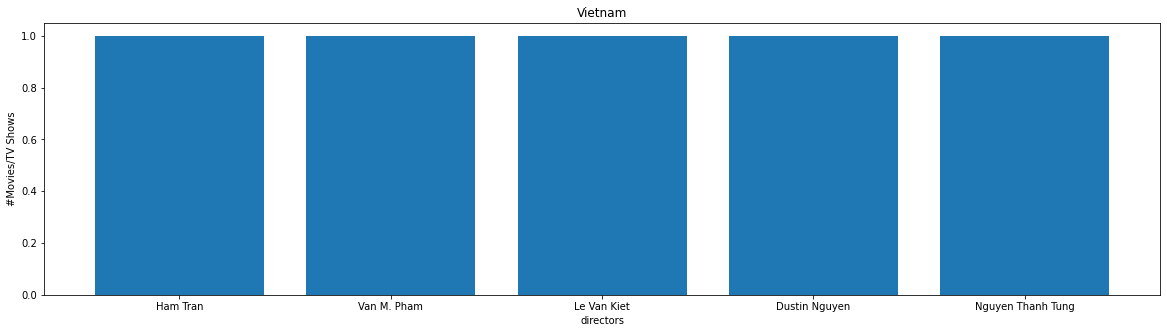

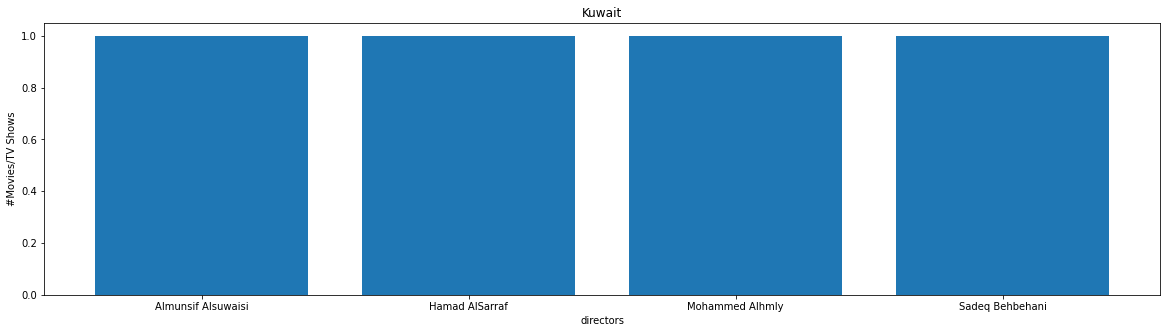

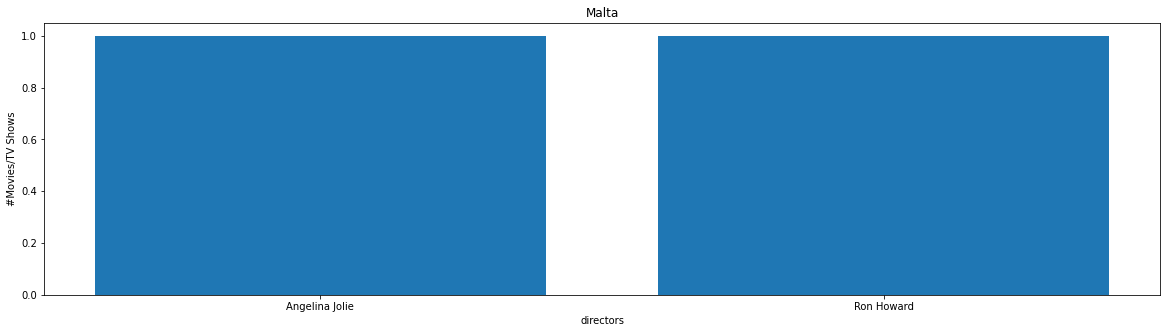

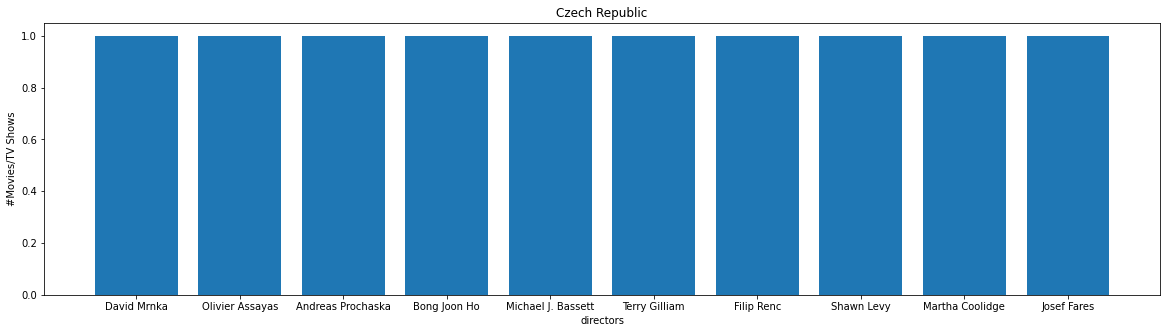

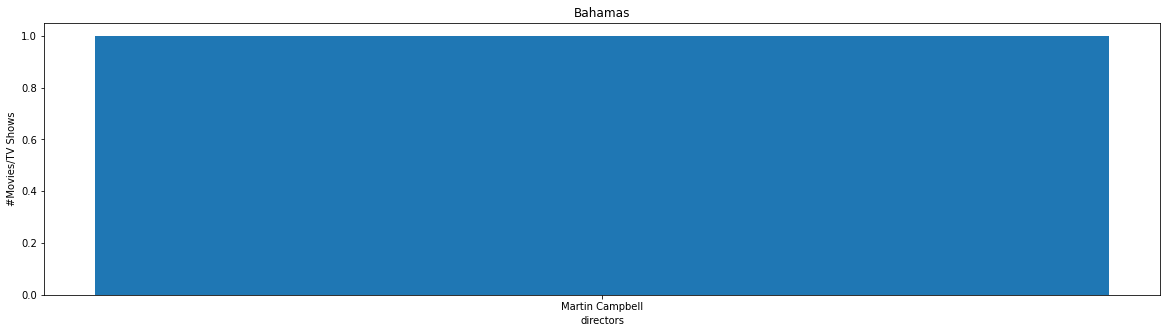

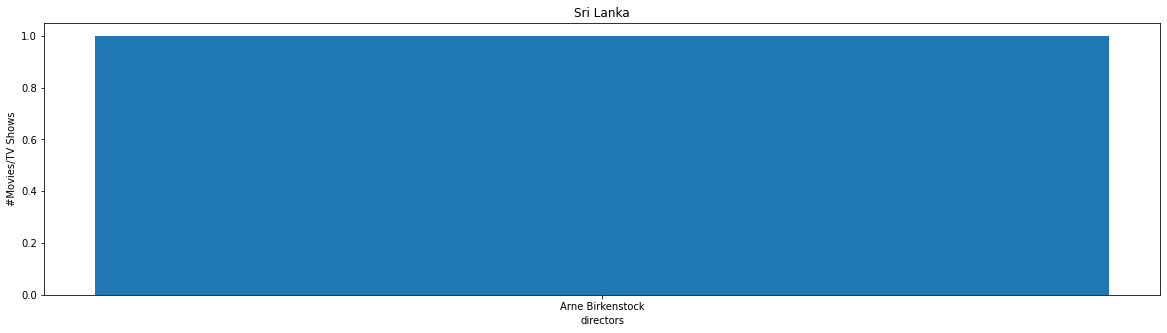

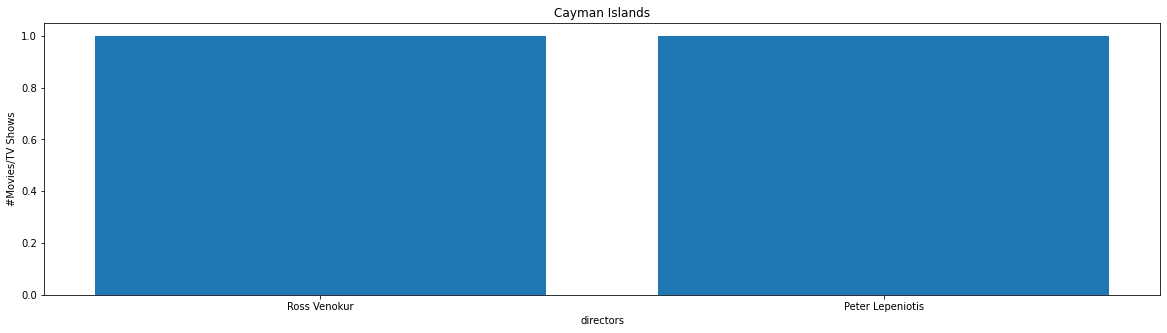

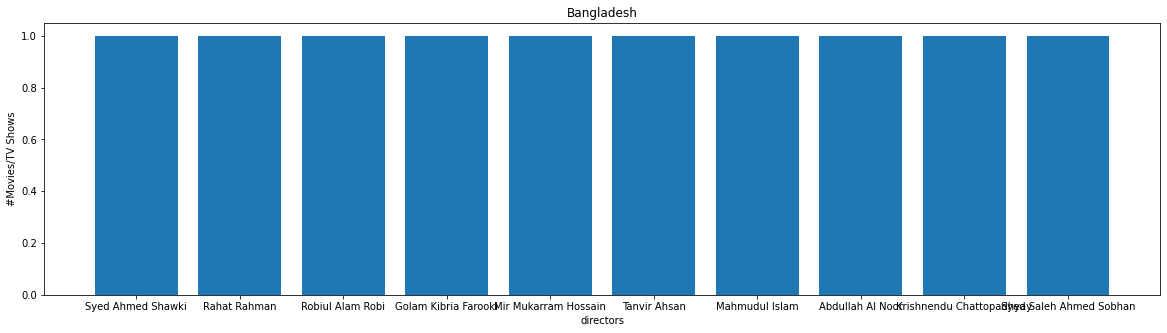

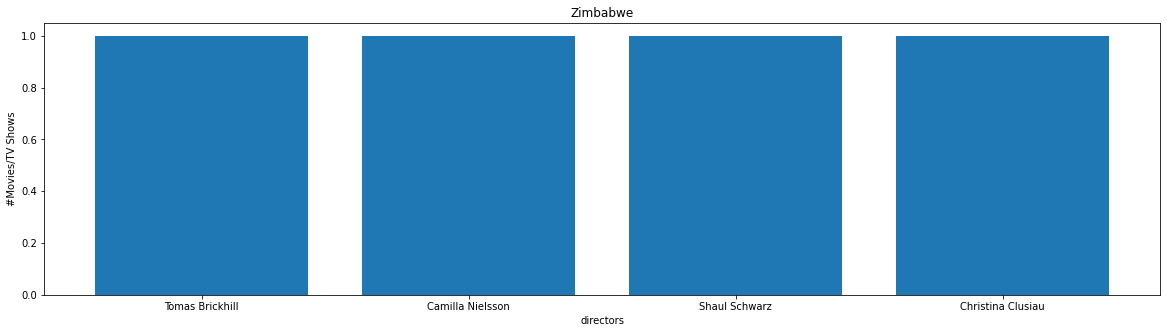

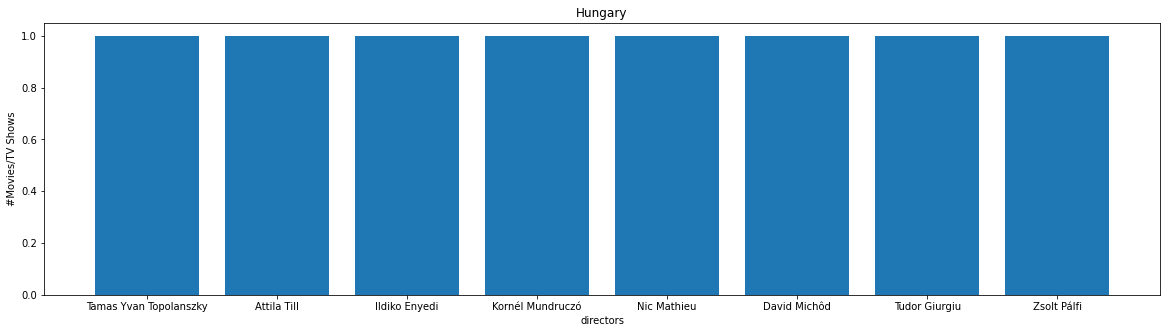

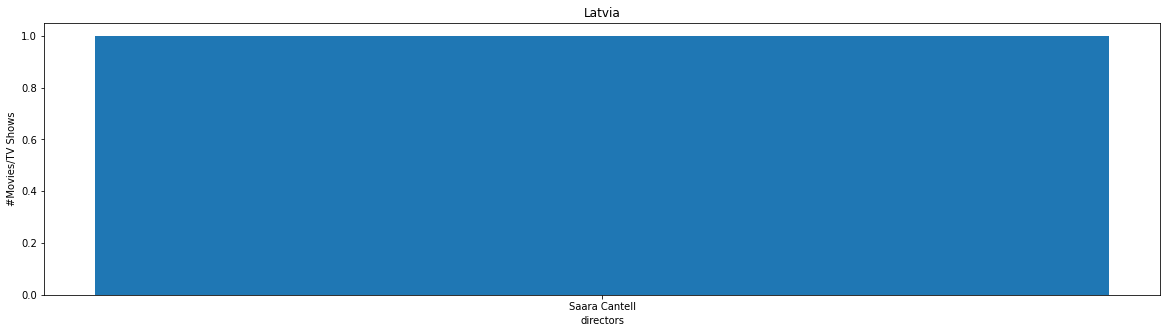

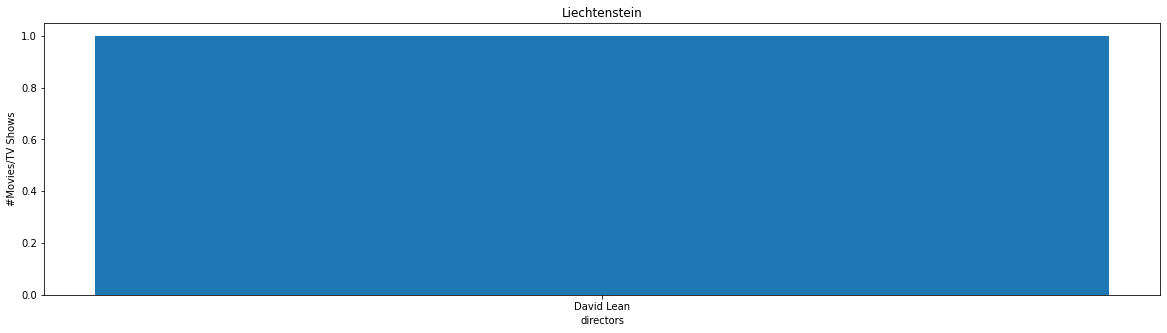

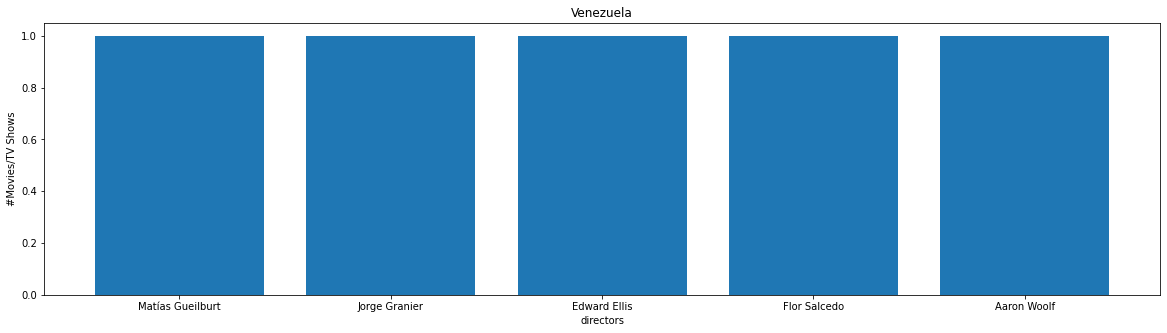

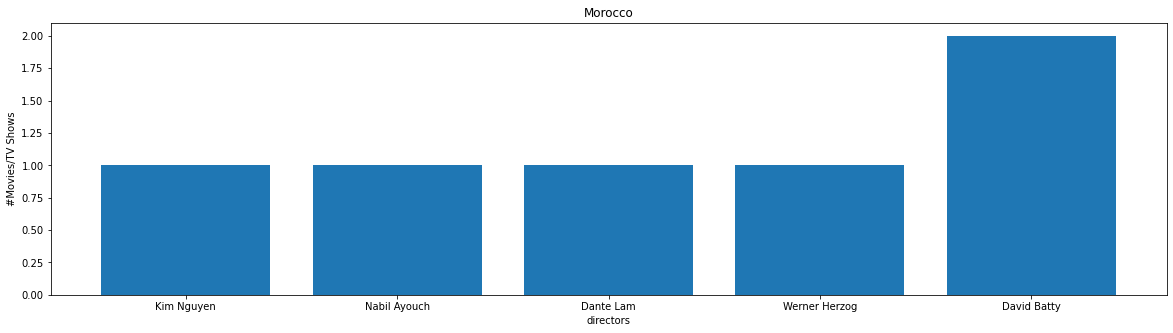

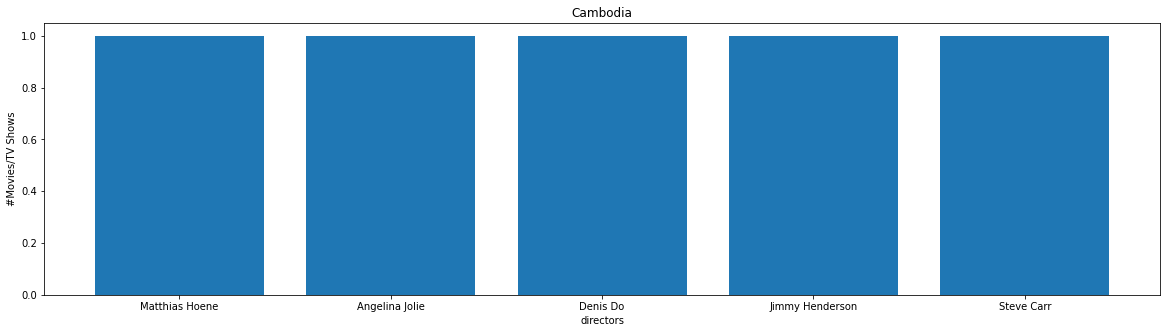

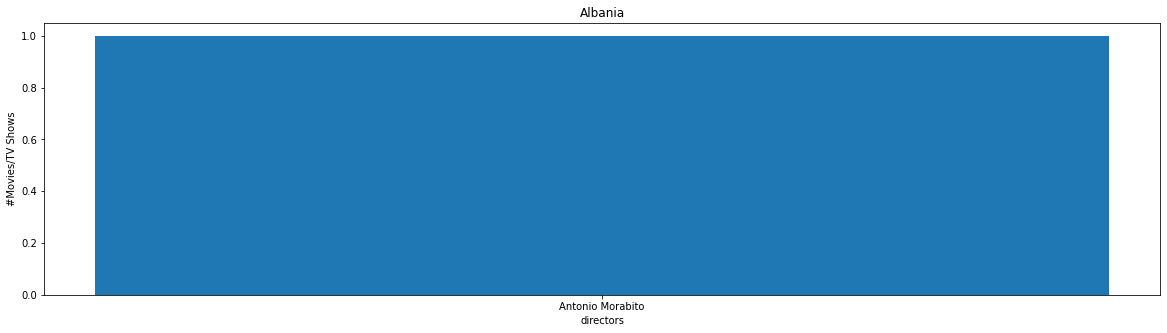

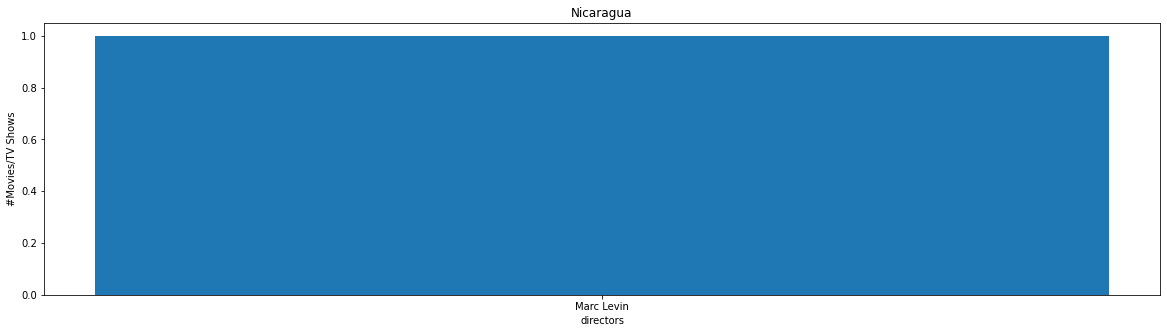

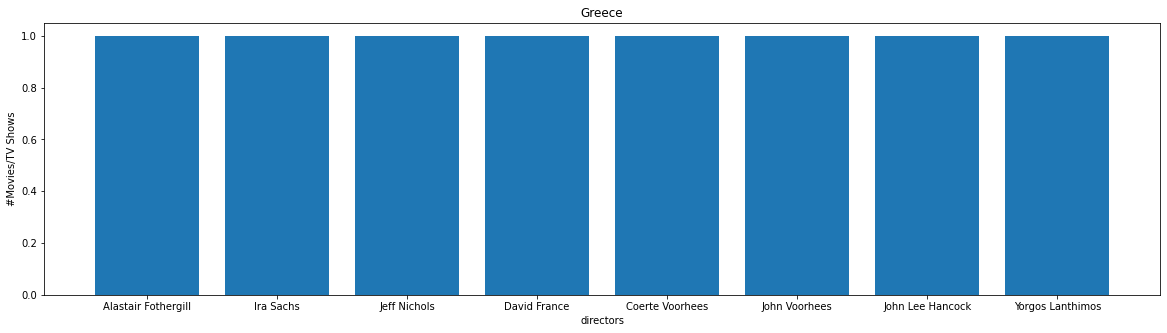

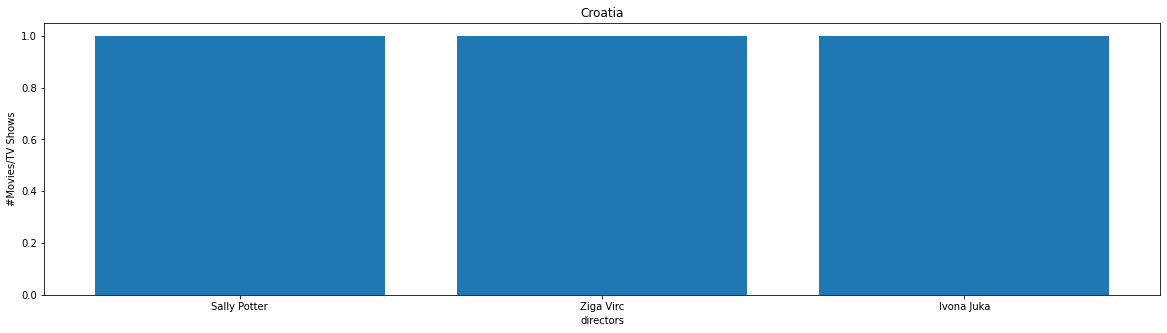

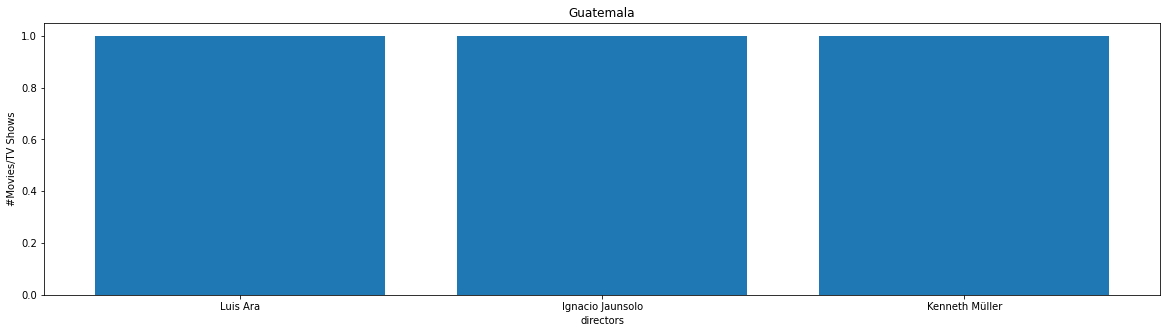

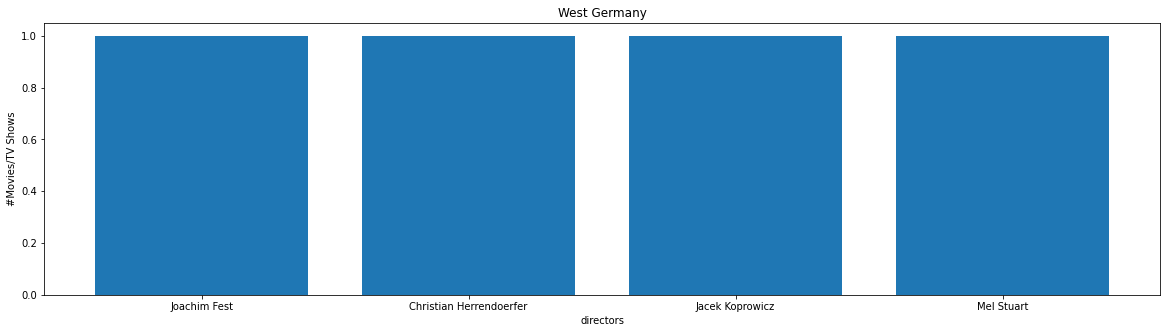

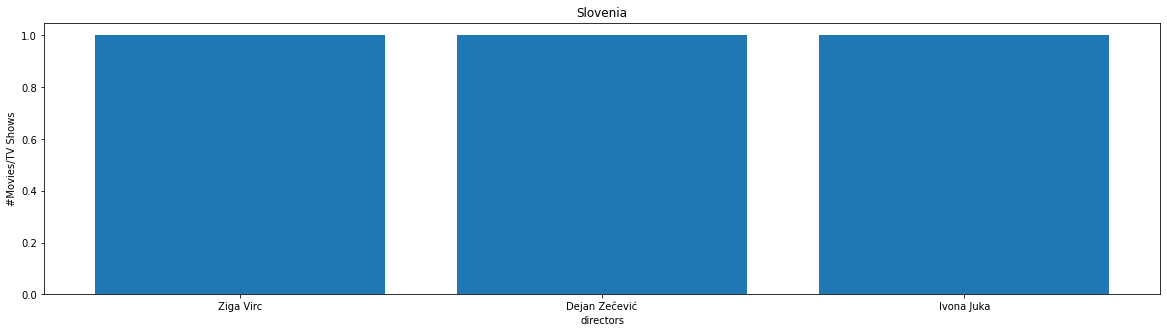

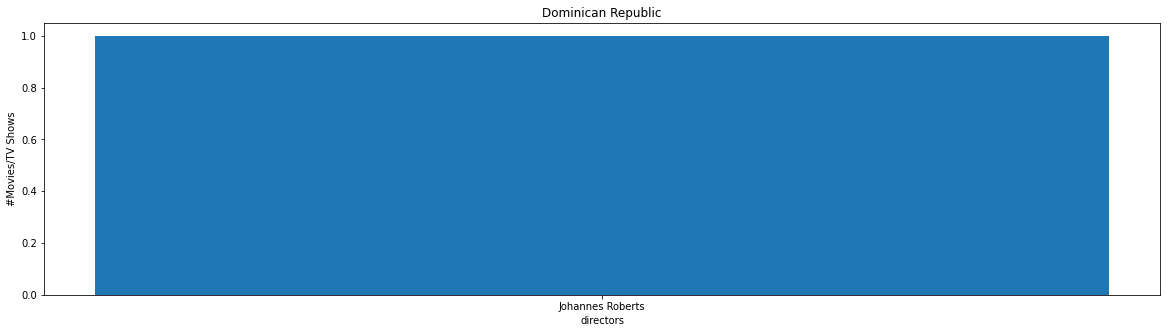

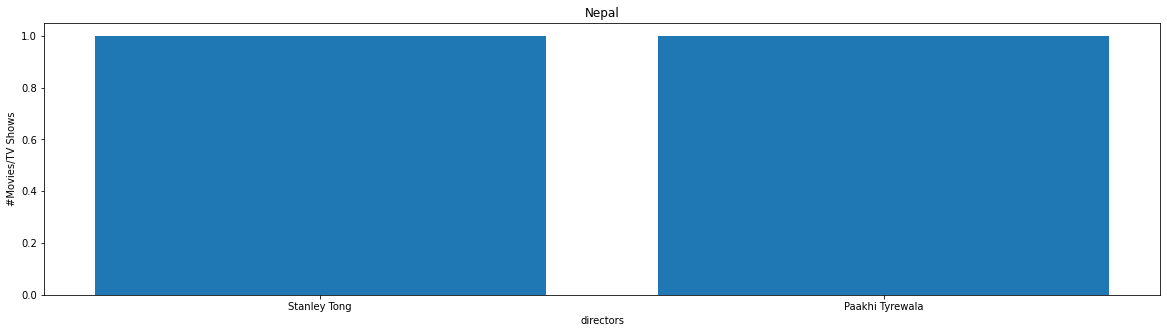

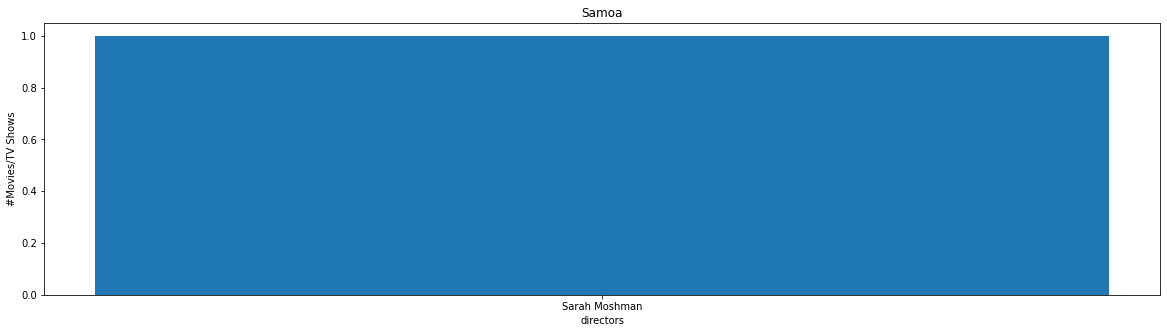

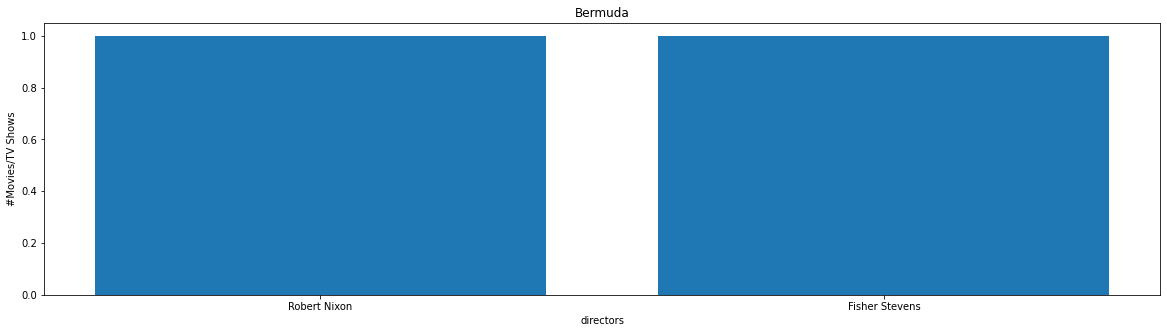

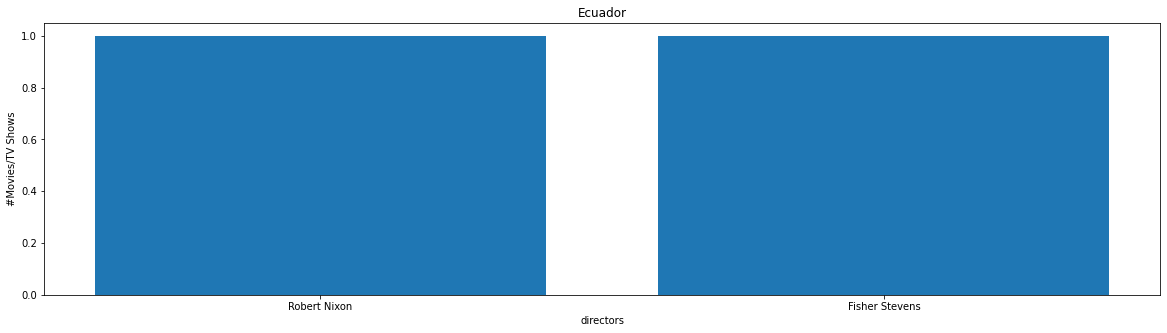

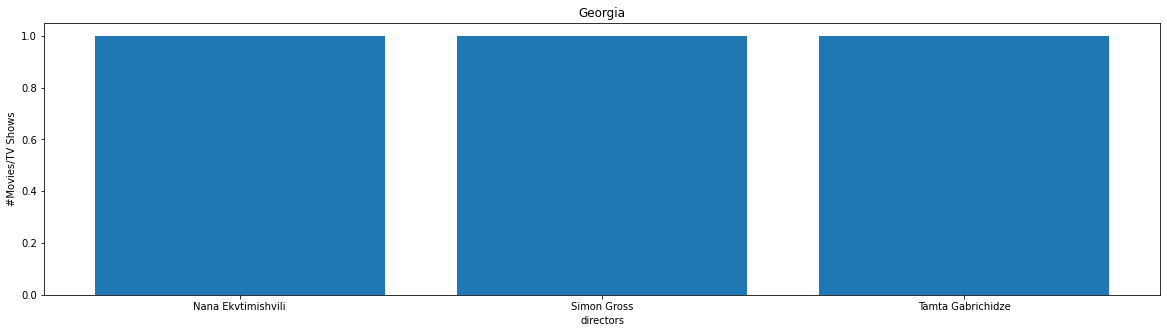

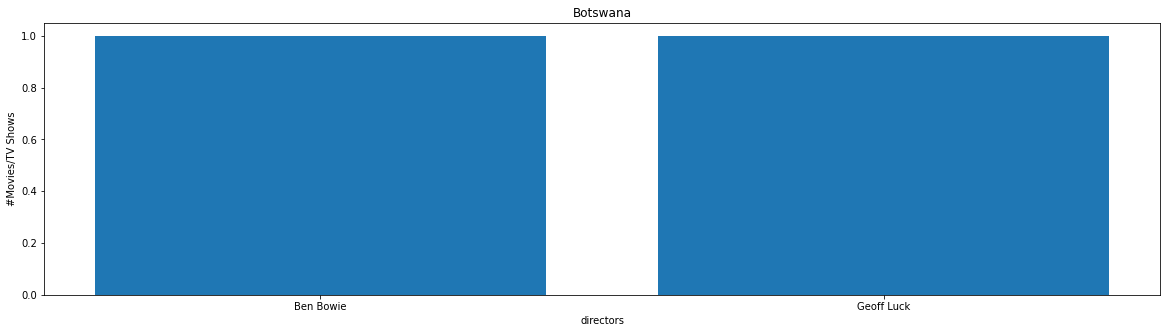

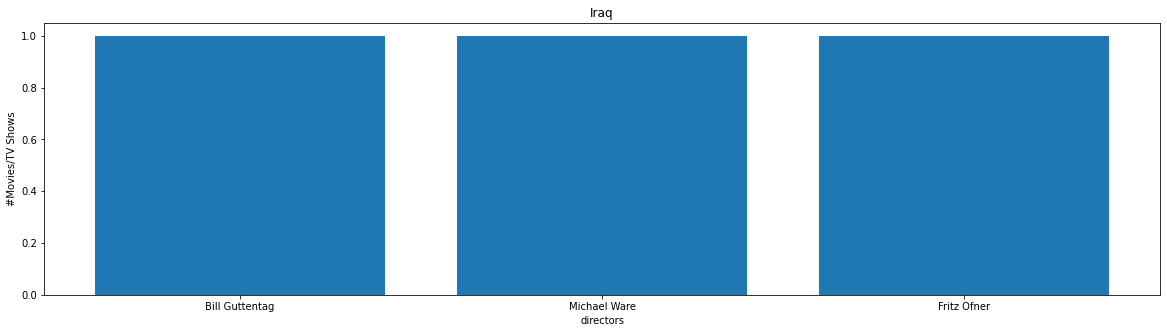

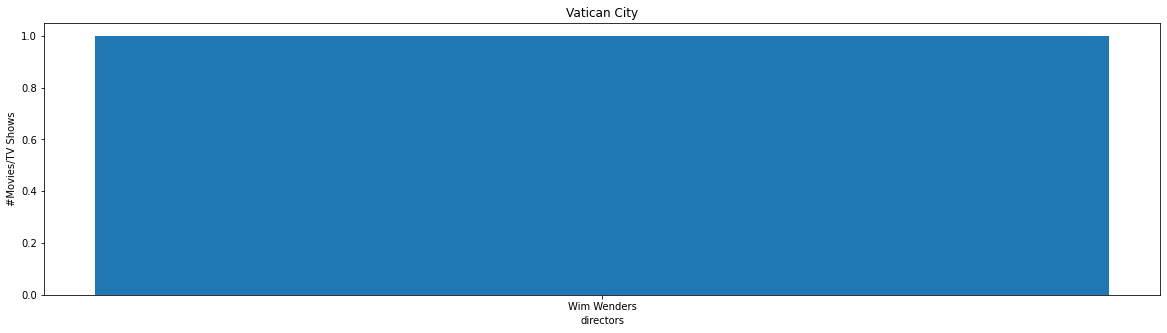

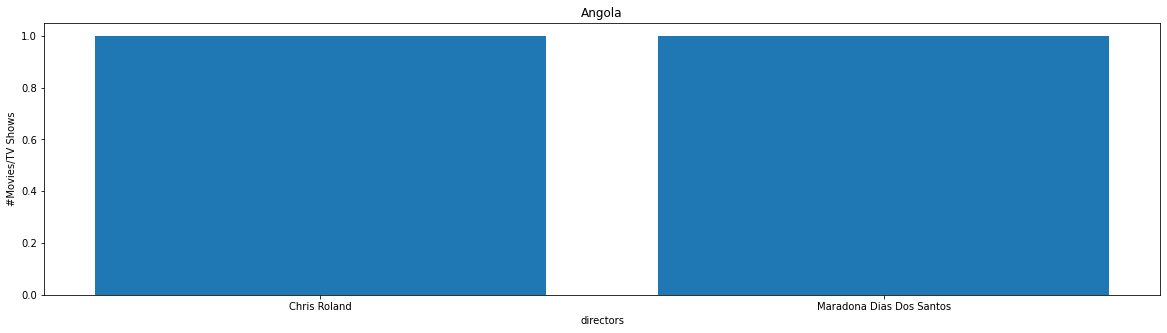

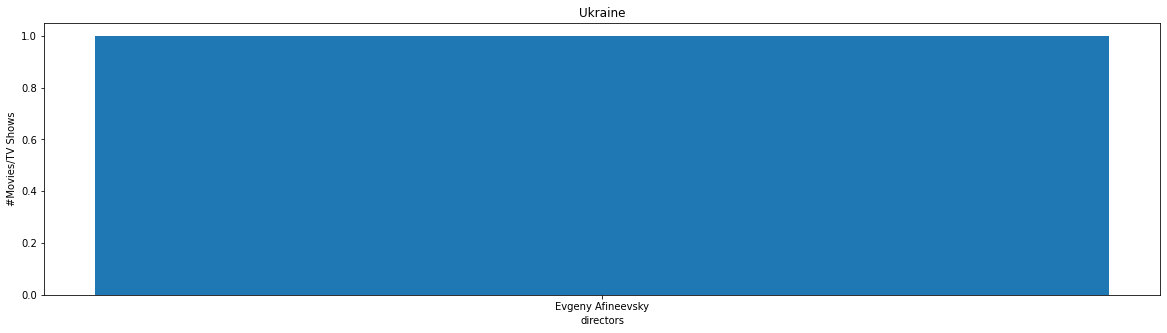

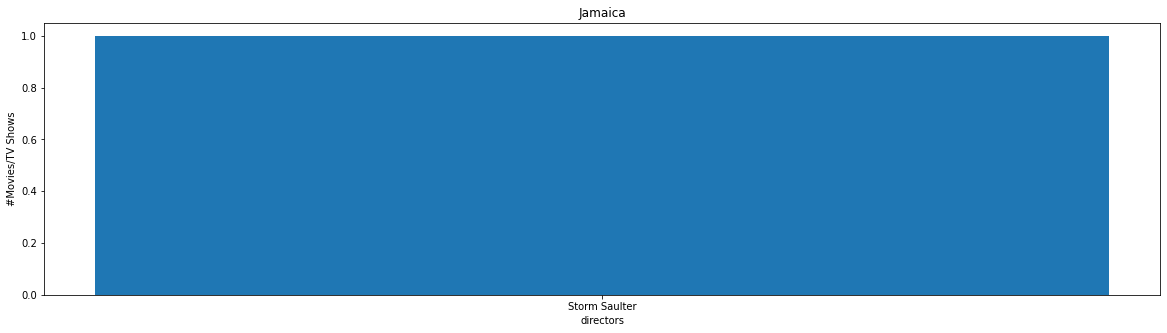

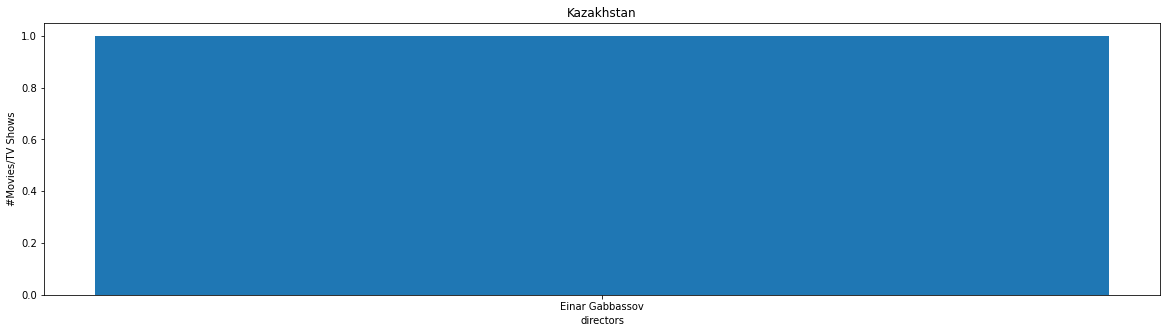

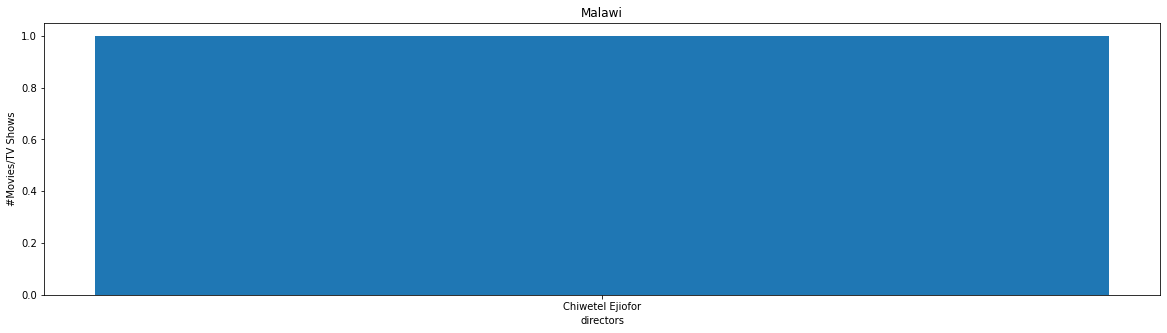

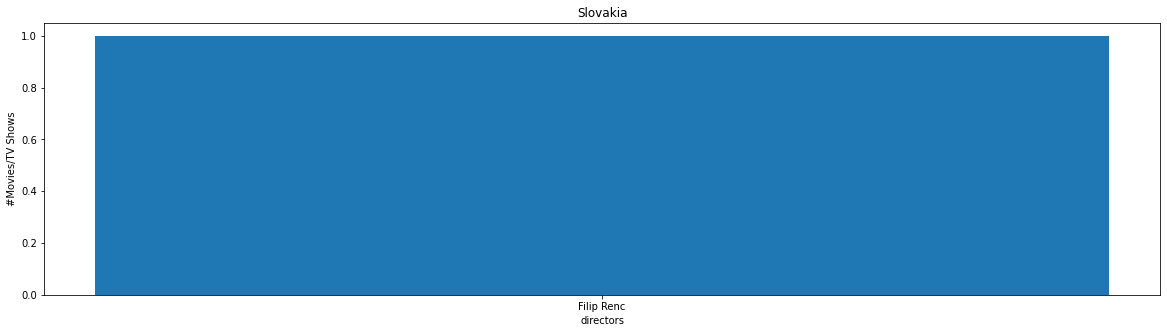

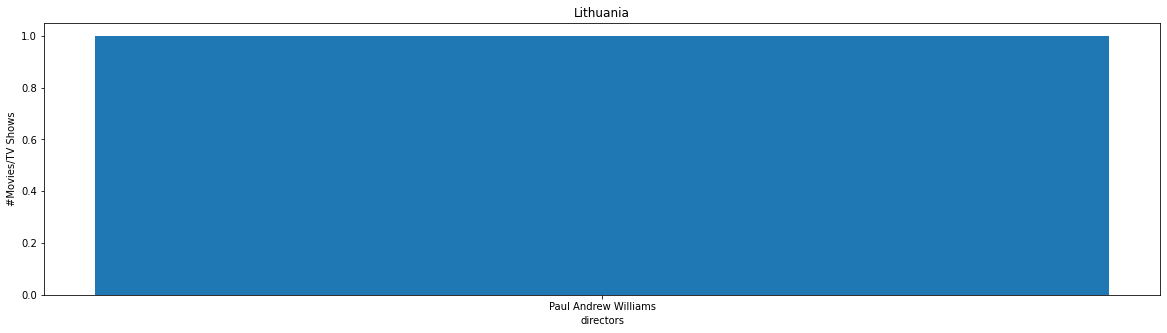

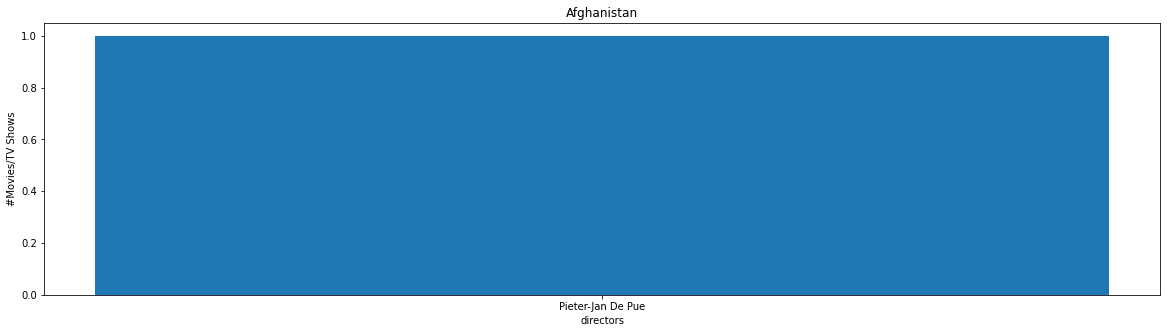

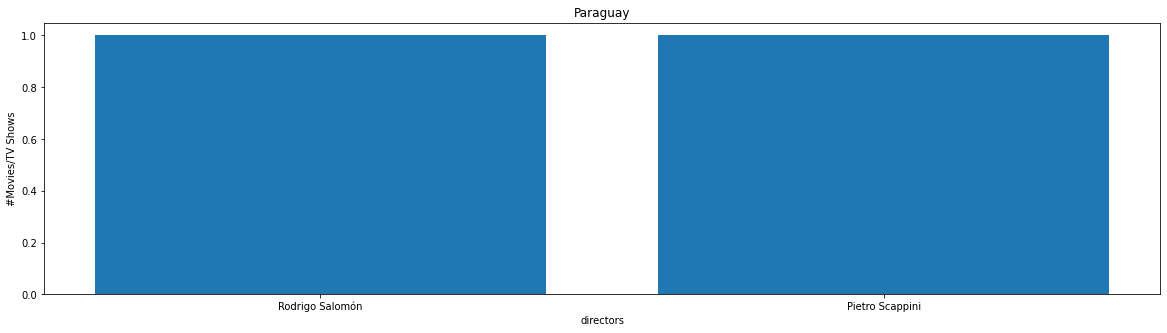

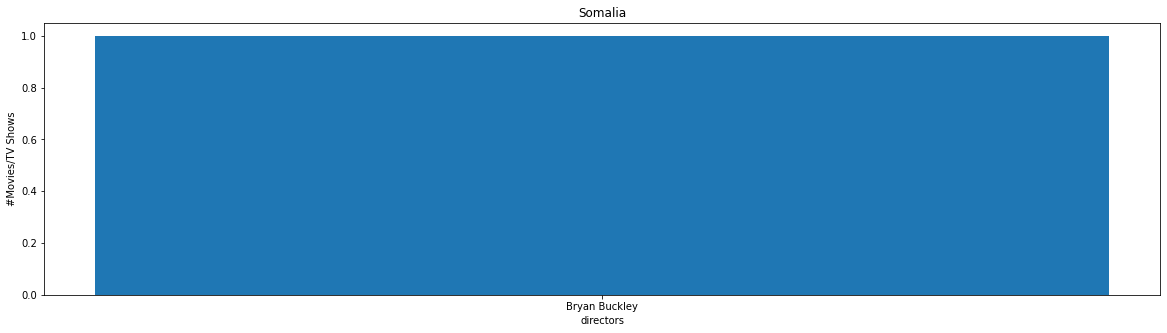

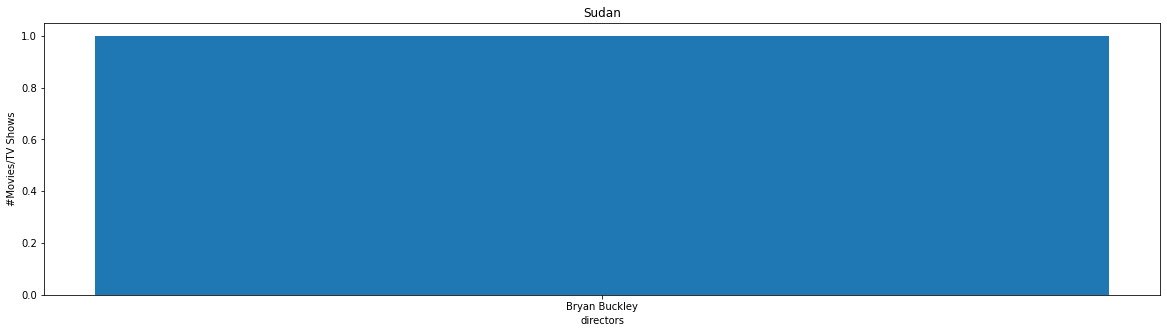

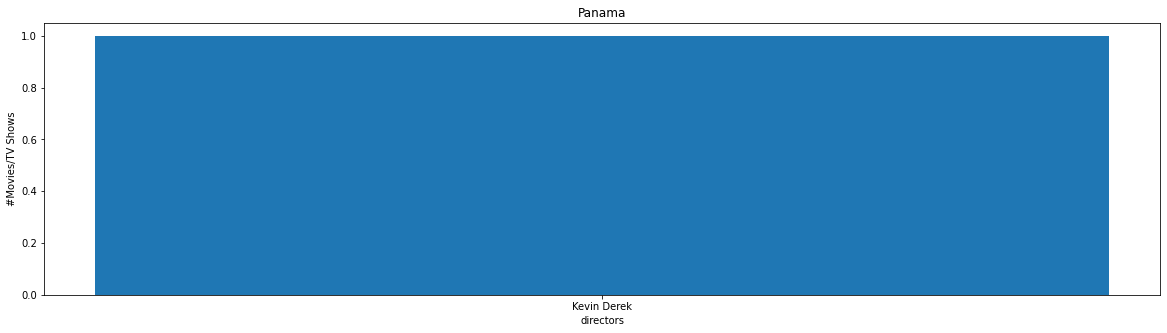

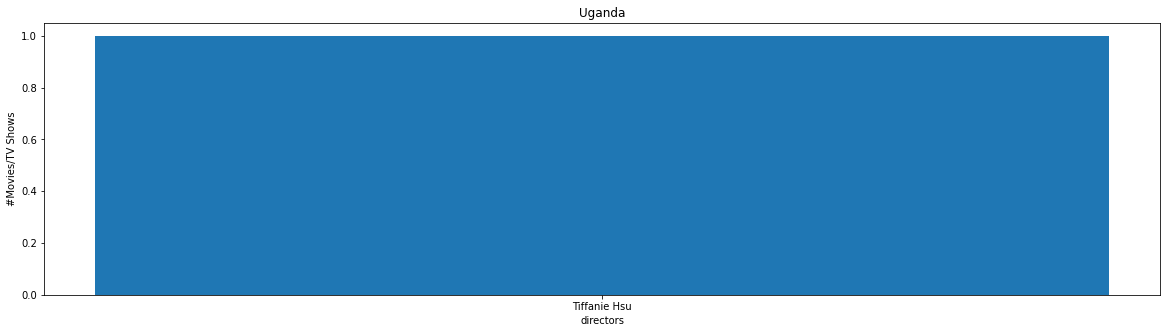

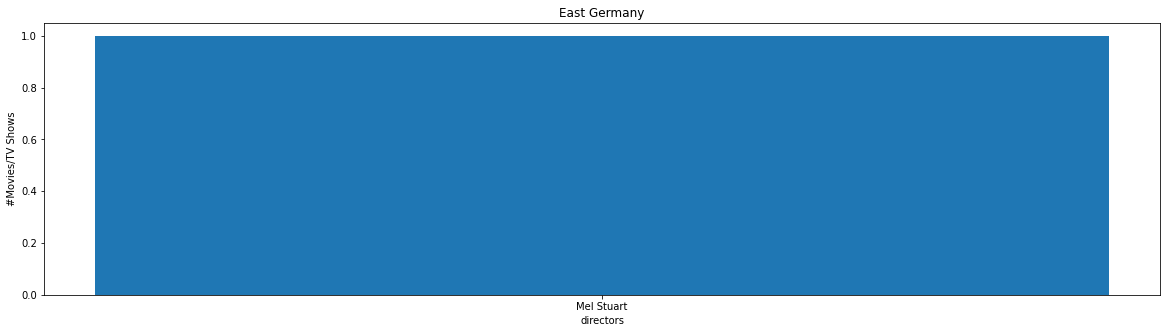

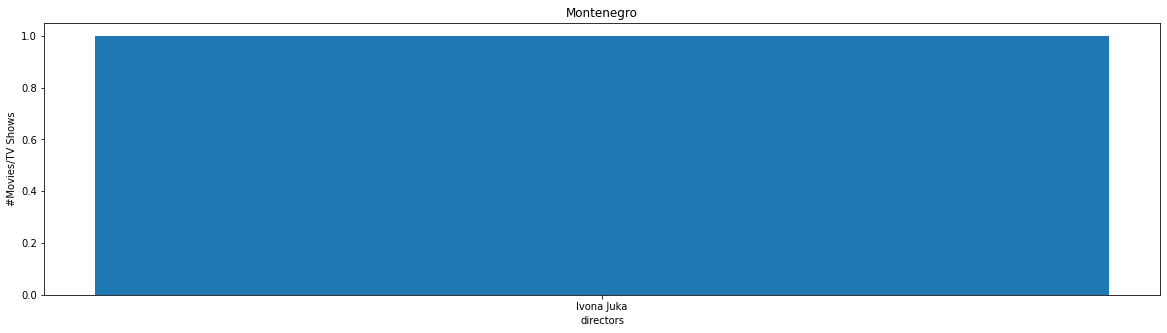

In [ ]:
Dictionary = {"":{}}
inputfile = csv.reader(open('netflix_titles.csv', encoding="utf8"))
for row in inputfile:
    countries = row[5].split(", ")
    directors = row[3].split(", ")
    
    for country in countries:
        if(',' in country):
            country = country.replace(',', '')
        if not country:
            continue
        if country not in Dictionary.keys():
            Dictionary[country] = {}
            for director in directors:
                if not director:
                    continue
                Dictionary[country].update({director: 1})
        else:
            for director in directors:
                if not director:
                    continue
                if director not in Dictionary[country].keys():
                    Dictionary[country].update({director: 1})
                else:
                    Dictionary[country][director] += 1

#print(Dictionary)
for country in Dictionary.keys():
    sorted_tuples = sorted(Dictionary[country].items(), key=lambda x: x[1])
    #print(sorted_tuples)  # [(1, 1), (3, 4), (2, 9)]
    sorted_Dictionary = {k: v for k, v in sorted_tuples}
    Dictionary[country] =  sorted_Dictionary

for country in Dictionary.keys():
    a = []
    a = list(Dictionary[country].values())[-10:]
    #print(list(Dictionary[country].values())[-10:])
    variable = [x for x in a]
    #print(variable)

    counter = 0
    for var in variable:
        if var != 0:
            counter += 1

    if counter == 0:
        continue
    ## plotting a bar chart
    f, ax = plt.subplots(figsize=(20,5)) # set the size that you'd like (width, height)

    plt.bar(list(Dictionary[country].keys())[-counter:], variable[-counter:])

    # x-axis label
    plt.xlabel('directors')
    # frequency label
    plt.ylabel('#Movies/TV Shows')
    plt.title(country)
    plt.show()

**1.10 Find the number of seasons for every tv show and present them in a graph**

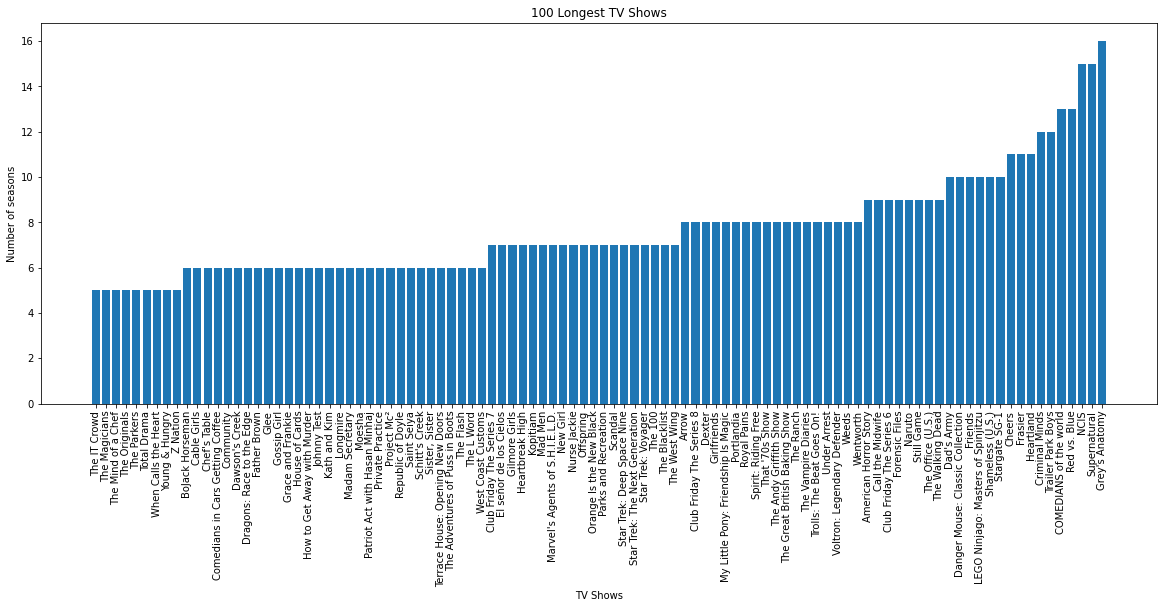

In [ ]:
inputfile = csv.reader(open('netflix_titles.csv', encoding="utf8"))
Seasons = {}
for row in inputfile:
    if row[1] != "TV Show":
        continue
    duration = row[9].split(" ")
    if not duration or duration == "duration":
        continue
    if row[2] not in Seasons.keys():
        Seasons[row[2]] = (int)(duration[0])

sorted_dict = {}#sort it from least to max
sorted_dict = dict(sorted(Seasons.items(), key=lambda x: x[1]))
    
## plotting a bar chart
f, ax = plt.subplots(figsize=(20,7)) # set the size that you'd like (width, height)
#fit top 100 tv shows in the graph
plt.bar(list(sorted_dict.keys())[-100:], list(sorted_dict.values())[-100:])
plt.xticks(rotation=90)#print vertically the names to fit

# x-axis label
plt.xlabel('TV Shows')
# frequency label
plt.ylabel('Number of seasons')
plt.title('100 Longest TV Shows')
plt.show()

**1.11 Find the movies with the best rating**

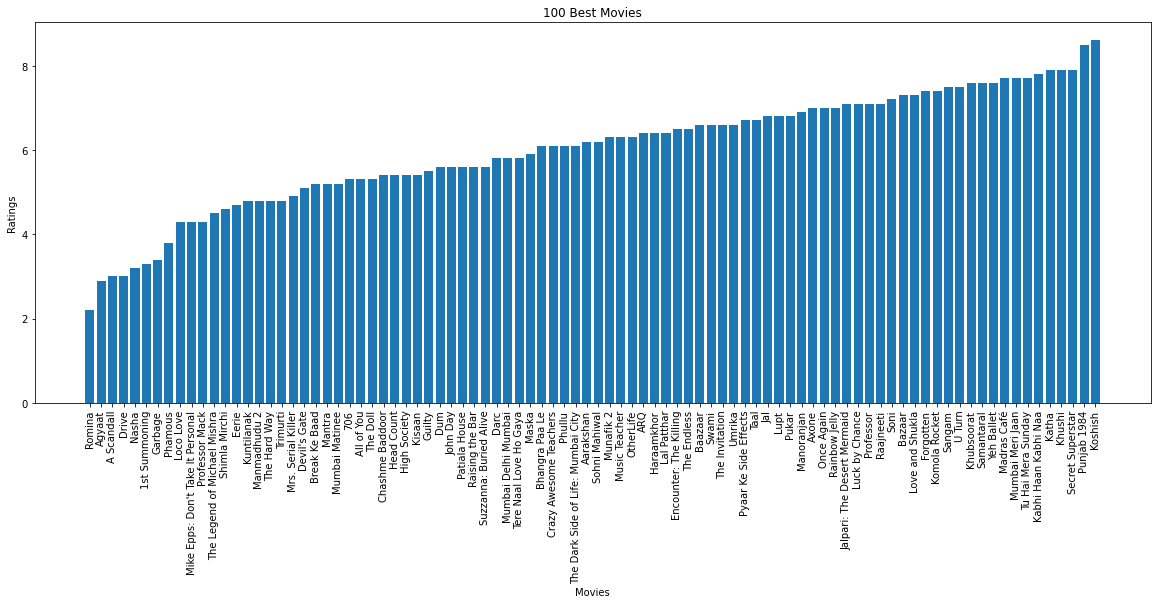

In [ ]:
netflix_titles = csv.reader(open('/content/netflix_titles.csv', encoding="utf8"))
IMDb_movies = csv.reader(open('/content/IMDb movies.csv', encoding="utf8"))
#we used the average rating form imdb movies file to determine the best movies
netflix_movies = {}
movies = {}
#for key we have tuple (movie_title,description)
#we use this key to guarantee that we add movies
#that are different but have same values
#So we distinguish movies from each other
for row in IMDb_movies:
    if row[1] and (row[1], row[13]) not in movies.keys() and row[1] != 'title':
        movies[(row[1], row[13])] = (float)(row[14])#save rating
#There we associate the movies from imdb file to the netflix file
#They must exist at both
for row in netflix_titles:
    if row[1] == 'Movie' and (row[2], row[11]) in movies.keys() and (row[2], row[11]) not in netflix_movies.keys():
        netflix_movies[(row[2], row[11])] = movies[(row[2], row[11])]

sorted_dict = {}#sort based or rating
sorted_dict = dict(sorted(netflix_movies.items(), key=lambda x: x[1]))
    
## plotting a bar chart
f, ax = plt.subplots(figsize=(20,7)) # set the size that you'd like (width, height)

res_list = [x[0] for x in sorted_dict.keys()]

plt.bar(res_list[-100:], list(sorted_dict.values())[-100:])
plt.xticks(rotation=90)

# x-axis label
plt.xlabel('Movies')
# frequency label
plt.ylabel('Ratings')
plt.title('100 Best Movies')
plt.show()


**2.1 Boolean Bag of words from netflix's descriptions**

In [ ]:
import nltk 
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
!pip install pattern
import pattern
from pattern.en import lemma, lexeme
nltk.download('punkt')
nltk.download('wordnet')
stopwords = nltk.corpus.stopwords.words('english')

netflix_descriptions = csv.reader(open("/content/netflix_titles.csv", encoding="utf8"))
descriptions = []
titles = []
#get the description from the file
for row in netflix_descriptions:
  if row[11] != 'description' and row[1] == 'Movie' and row[11]:
      descriptions.append(row[11])
      if row[2] != 'title':
        titles.append(row[2])
#create vocabulary

def remove_stopwords(data):
    output_array=[]
    for sentence in data:#for every sentence
        temp_list=[]
        for word in sentence.split():#split it to words
            if word.lower() not in stopwords:
                temp_list.append(word)#add it to the new list
        output_array.append(' '.join(temp_list))#add it to output
    return output_array

descriptions = remove_stopwords(descriptions)

import re
counter = 0
for strs in descriptions:
  descriptions[counter] = re.sub('[%,.’—!–$0-9]', '', strs)#remove unnecessary chars from descriptions
  counter+=1

flat_list = [sublist for sublist in descriptions]#create a simple list of updated descriptions


new_list = []
for sentence in flat_list:#lemmatize instruction, give meaning to the word
 new_list.append(' '.join([lemma(wd) for wd in sentence.split()]))

vectorizer = CountVectorizer(ngram_range=(1, 2), binary = True)#create vector for unigrams and bigrams
X_train = vectorizer.fit_transform(new_list)
X_test = vectorizer.transform(new_list)

# print("VOCABULARY")
# print(vectorizer.get_feature_names())
# print(len(X_test.toarray()))
# print(len(titles))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


**Tf-Idf implementation**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), use_idf = True)
tfidfX_train = tfidf_vectorizer.fit_transform(new_list)
tfidfX_test = tfidf_vectorizer.transform(new_list)
test_characteristics_array = tfidfX_test.toarray()

**2.2 Jaccard Tanimoto**

In [ ]:
import numpy as np
import pandas
from sklearn.metrics import jaccard_score
from sklearn.metrics.pairwise import pairwise_distances

from scipy.sparse import csr_matrix
import numpy as np

#The implementation below is heavily based on that link :
#https://datascience.stackexchange.com/questions/33023/similarity-of-search-results-using-jaccard

def jaccard_sim_matrix(X):
    """X is an integer array of features"""

    sparseX = csr_matrix(X)

    # make a binary version of the matrix
    binX = sparseX
    binX.data[:] = 1

    intersection = ((sparseX * binX.T) + (binX * sparseX.T))

    rowwise_sum = np.sum(sparseX, axis=1)
    union = np.repeat(rowwise_sum, intersection.shape[0], axis=1) + np.repeat(rowwise_sum.T, intersection.shape[0],
                                                                              axis=0)

    return intersection / union

jac_sim2 = jaccard_sim_matrix(X_test.toarray())

A = np.squeeze(np.asarray(jac_sim2))
print(A)
#print(jac_sim2)

[[1.         0.         0.         ... 0.         0.07142857 0.        ]
 [0.         1.         0.         ... 0.         0.         0.        ]
 [0.         0.         1.         ... 0.03703704 0.         0.        ]
 ...
 [0.         0.         0.03703704 ... 1.         0.         0.        ]
 [0.07142857 0.         0.         ... 0.         1.         0.07407407]
 [0.         0.         0.         ... 0.         0.07407407 1.        ]]


In [ ]:
import numpy as np

Discriptions = A

Dict_of_movies = {}
#for every movie , we save its similarity vector
for i in range(1, 5378):
  counter = 0
  Dict_of_movies.setdefault(i, [])
  for j in Discriptions[i-1]:
    counter += 1 #counter is for counting the place of values at the vector ,
    # j is the similarity value
    Dict_of_movies[i].append((counter, j))

for i in Dict_of_movies.keys():
  sorted_tuples = sorted(Dict_of_movies[i], key=lambda x:x[1])
  #print(sorted_tuples)  # [(1, 1), (3, 4), (2, 9)]
  sorted_dict = {k: v for k, v in sorted_tuples}
  Dict_of_movies[i] =  sorted_dict

**Cosine similarity**

In [ ]:
from scipy import spatial
from sklearn.metrics.pairwise import cosine_similarity
from scipy import sparse
#create sparse matrix because we want to avoid zeroes 
A_sparse = sparse.csr_matrix(test_characteristics_array)
#put the array at the cosine function
similarities = cosine_similarity(A_sparse)

print(similarities[:10])
  

[[1.         0.         0.         ... 0.         0.03109803 0.        ]
 [0.         1.         0.         ... 0.         0.         0.        ]
 [0.         0.         1.         ... 0.02416283 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.01050206 0.03269587]]


In [ ]:
cosine_of_movies = {}

for i in range(1, 5378):
  counter = 0
  cosine_of_movies.setdefault(i, [])
  for j in similarities[i-1]:
    counter += 1
    cosine_of_movies[i].append((counter, j))

for i in cosine_of_movies.keys():
  sorted_tuples = sorted(cosine_of_movies[i], key=lambda x:x[1])
  #print(sorted_tuples)  # [(1, 1), (3, 4), (2, 9)]
  sorted_dict = {k: v for k, v in sorted_tuples}
  cosine_of_movies[i] =  sorted_dict

**2.3 Find the 10 most similar movies for a netflix title**

In [ ]:
def get_similar_movies1(title, N, method):
  Dict = {}
  if method == 'boolean':
    Dict = Dict_of_movies
  elif method == 'tf-idf':
    Dict = cosine_of_movies
  else:
    print("Didnt give the right method")
    return

  index = 0
  for i in range(0, 5377):
    if titles[i] == title:
      index = i#find the title from array
    elif i == 5376 and index == 0:
      print("There is no such title")
      return

  list_of_similar = [item[0] for item in Dict[index].items()]

  list_of_similar.reverse()#reverse to print in the correct order
  return [titles[i] for i in list_of_similar[:N]]

df = pd.DataFrame({'The Devil All The Time' : get_similar_movies1('The Devil All The Time', N=20, method='tf-idf')})
print(df)

                              The Devil All The Time
0                             The Devil All The Time
1                                10 Days in Sun City
2                The Witness Who Didn't See Anything
3                                              Babel
4                                       Lust Stories
5                                 Functional Fitness
6                                Sky Tour: The Movie
7                                Across the Universe
8                                          Skiptrace
9                                          The Score
10                                      Seven Pounds
11                                               706
12                                            Legend
13                                               187
14                                              Pink
15  Shaurya: It Takes Courage to Make Right... Right
16                                            Stereo
17                                      Mean S

**2.4 Find 10 most common netflix titles based on a given description**

In [ ]:
from scipy import spatial
from sklearn.metrics.pairwise import cosine_similarity
from scipy import sparse

def get_similar_movies2(description, N, method):
  new_list2 = new_list.copy()
  description = remove_stopwords([description])
  
  description = re.sub('[\[\]%\"\',.’—!–$0-9]', '', str(description))
  
  new_list2.append(' '.join(lemma(wd) for wd in description.split()))

  if (method == 'boolean'):
      #print(new_list)
      vectorizer_temp = CountVectorizer(ngram_range=(1, 2), binary = True)
      X_train_temp = vectorizer.fit_transform(new_list2)
      X_test_temp = vectorizer.transform(new_list2)#same as above

      jac_sim3 = jaccard_sim_matrix(X_test_temp.toarray())
      B = np.squeeze(np.asarray(jac_sim3))#create array
      Discriptions = B
  elif (method == 'tf-idf'):
    tfidf_vectorizer = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), use_idf = True)
    X_train_temp = tfidf_vectorizer.fit_transform(new_list2)
    X_test_temp = tfidf_vectorizer.transform(new_list2)
    test_characteristics_array = X_test_temp.toarray()

    A_sparse = sparse.csr_matrix(test_characteristics_array)
    Discriptions = cosine_similarity(A_sparse)
  else:
     print("Didnt give the right method")
     return


  tempDict_of_movies = {}
  counter = 0
  tempDict_of_movies.setdefault(5378, [])#add the new description at the end of the list
  for j in Discriptions[5378-1]:
    counter += 1
    tempDict_of_movies[5378].append((counter, j))

  #sort to find top ten similar movies
  sorted_tuples = sorted(tempDict_of_movies[5378], key=lambda x:x[1])
  sorted_dict = {k: v for k, v in sorted_tuples}
  tempDict_of_movies[5378] =  sorted_dict

  list_of_similar2 = [item[0] for item in tempDict_of_movies[5378].items()]

  list_of_similar2.reverse()
  
  return [titles[i] for i in list_of_similar2[:N+1] if i<len(titles)]

df = pd.DataFrame(get_similar_movies2('Armed with only one word, Tenet, and fighting for the survival of the entire world, a Protagonist journeys through a twilight world of international espionage on a mission that will unfold in something beyond real time.', N=10, method='tf-idf'))
print(df)


                              0
0          I Am not an Easy Man
1              All Hallows' Eve
2              Into the Inferno
3       Seth Meyers: Lobby Baby
4                        Swiped
5                     Al acecho
6            The Gospel of Mark
7                   Mercy Black
8        Jake's Buccaneer Blast
9  Bigflo & Oli: Hip Hop Frenzy
